# Credit EDA Assignment - Part 2

### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. **Two types of risks** are associated with the bank’s decision:

 - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
 - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

1. **The client with payment difficulties**: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample
2. **All other cases**: All other cases when the payment is paid on time.

When a client applies for a loan, there are **four types of decisions** that could be taken by the client/company:

1. **Approved**: The Company has approved loan Application

2. **Cancelled**: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

3. **Refused**: The company had rejected the loan (because the client does not meet their requirements etc.).

4. **Unused offer**:  Loan has been cancelled by the client but at different stages of the process.

**Objective**

As an analyst working for a consumer finance company which specialises in lending various types of loans to urban customers:
 - We have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.
 - We have to  use EDA to understand how consumer attributes and loan attributes influence their tendency to default.
 - **Identification of patterns** which indicate if a **client has difficulty paying their instalments** may be used for **taking actions** such as:
     - denying the loan
     - reducing the amount of loan
     - lending (to risky applicants) at a higher interest rate, etc.

This will ensure that the consumers capable of repaying the loan are not rejected. 

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import missingno as msno

# Importing warnings to prevent warnings from showing up in the notebook
import warnings
warnings.filterwarnings('ignore')

In [5]:
import sys
sys.setrecursionlimit(10**6)

In [6]:
#Reading 'application data' dataframe
df2=pd.read_csv(r'C:\Users\Niharika\Downloads\application_dataEDAMainMod7_19Sep.csv')

In [7]:
# Setting options to ensure full visibility of rows and columns when called by different functions.
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth', None)

In [8]:
# Shape of dataframe : (Rows, Columns)
df2.shape

(307511, 122)

In [9]:
# First few rows of the dataframe
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [10]:
# Column definitions of 'application data'

**Column Name**
 - SK_ID_CURR	ID of loan in our sample
 - TARGET	Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
 - NAME_CONTRACT_TYPE	Identification if loan is cash or revolving
 - CODE_GENDER	Gender of the client
 - FLAG_OWN_CAR	Flag if the client owns a car
 - FLAG_OWN_REALTY	Flag if client owns a house or flat
 - CNT_CHILDREN	Number of children the client has
 - AMT_INCOME_TOTAL	Income of the client
 - AMT_CREDIT	Credit amount of the loan
 - AMT_ANNUITY	Loan annuity
 - AMT_GOODS_PRICE	For consumer loans it is the price of the goods for which the loan is given
 - NAME_TYPE_SUITE	Who was accompanying client when he was applying for the loan
 - NAME_INCOME_TYPE	Clients income type (businessman, working, maternity leave,…)
 - NAME_EDUCATION_TYPE	Level of highest education the client achieved
 - NAME_FAMILY_STATUS	Family status of the client
 - NAME_HOUSING_TYPE	What is the housing situation of the client (renting, living with parents, ...)
 - REGION_POPULATION_RELATIVE	Normalized population of region where client lives (higher number means the client lives in more populated region)
 - DAYS_BIRTH	Client's age in days at the time of application
 - DAYS_EMPLOYED	How many days before the application the person started current employment
 - DAYS_REGISTRATION	How many days before the application did client change his registration
 - DAYS_ID_PUBLISH	How many days before the application did client change the identity document with which he applied for the loan
 - OWN_CAR_AGE	Age of client's car
 - FLAG_MOBIL	Did client provide mobile phone (1=YES, 0=NO)
 - FLAG_EMP_PHONE	Did client provide work phone (1=YES, 0=NO)
 - FLAG_WORK_PHONE	Did client provide home phone (1=YES, 0=NO)
 - FLAG_CONT_MOBILE	Was mobile phone reachable (1=YES, 0=NO)
 - FLAG_PHONE	Did client provide home phone (1=YES, 0=NO)
 - FLAG_EMAIL	Did client provide email (1=YES, 0=NO)
 - OCCUPATION_TYPE	What kind of occupation does the client have
 - CNT_FAM_MEMBERS	How many family members does client have
 - REGION_RATING_CLIENT	Our rating of the region where client lives (1,2,3)
 - REGION_RATING_CLIENT_W_CITY	Our rating of the region where client lives with taking city into account (1,2,3)
 - WEEKDAY_APPR_PROCESS_START	On which day of the week did the client apply for the loan
 - HOUR_APPR_PROCESS_START	Approximately at what hour did the client apply for the loan
 - REG_REGION_NOT_LIVE_REGION	Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
 - REG_REGION_NOT_WORK_REGION	Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
 - LIVE_REGION_NOT_WORK_REGION	Flag if client's contact address does not match work address (1=different, 0=same, at region level)
 - REG_CITY_NOT_LIVE_CITY	Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
 - REG_CITY_NOT_WORK_CITY	Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
 - LIVE_CITY_NOT_WORK_CITY	Flag if client's contact address does not match work address (1=different, 0=same, at city level)
 - ORGANIZATION_TYPE	Type of organization where client works
 - EXT_SOURCE_1	Normalized score from external data source
 - EXT_SOURCE_2	Normalized score from external data source
 - EXT_SOURCE_3	Normalized score from external data source
 - APARTMENTS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - BASEMENTAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - YEARS_BEGINEXPLUATATION_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - YEARS_BUILD_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - COMMONAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - ELEVATORS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - ENTRANCES_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - FLOORSMAX_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - FLOORSMIN_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - LANDAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - LIVINGAPARTMENTS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - LIVINGAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - NONLIVINGAPARTMENTS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - NONLIVINGAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - APARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - BASEMENTAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - YEARS_BEGINEXPLUATATION_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - YEARS_BUILD_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - COMMONAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - ELEVATORS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - ENTRANCES_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - FLOORSMAX_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - FLOORSMIN_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - LANDAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - LIVINGAPARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - LIVINGAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - NONLIVINGAPARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - NONLIVINGAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - APARTMENTS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - BASEMENTAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - YEARS_BEGINEXPLUATATION_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - YEARS_BUILD_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - COMMONAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - ELEVATORS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - ENTRANCES_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - FLOORSMAX_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - FLOORSMIN_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - LANDAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - LIVINGAPARTMENTS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - LIVINGAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - NONLIVINGAPARTMENTS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - NONLIVINGAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - FONDKAPREMONT_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - HOUSETYPE_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - TOTALAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - WALLSMATERIAL_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - EMERGENCYSTATE_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
 - OBS_30_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings with observable 30 DPD (days past due) default
 - DEF_30_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
 - OBS_60_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings with observable 60 DPD (days past due) default
 - DEF_60_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings defaulted on 60 (days past due) DPD
 - DAYS_LAST_PHONE_CHANGE	How many days before application did client change phone
 - FLAG_DOCUMENT_2	Did client provide document 2
 - FLAG_DOCUMENT_3	Did client provide document 3
 - FLAG_DOCUMENT_4	Did client provide document 4
 - FLAG_DOCUMENT_5	Did client provide document 5
 - FLAG_DOCUMENT_6	Did client provide document 6
 - FLAG_DOCUMENT_7	Did client provide document 7
 - FLAG_DOCUMENT_8	Did client provide document 8
 - FLAG_DOCUMENT_9	Did client provide document 9
 - FLAG_DOCUMENT_10	Did client provide document 10
 - FLAG_DOCUMENT_11	Did client provide document 11
 - FLAG_DOCUMENT_12	Did client provide document 12
 - FLAG_DOCUMENT_13	Did client provide document 13
 - FLAG_DOCUMENT_14	Did client provide document 14
 - FLAG_DOCUMENT_15	Did client provide document 15
 - FLAG_DOCUMENT_16	Did client provide document 16
 - FLAG_DOCUMENT_17	Did client provide document 17
 - FLAG_DOCUMENT_18	Did client provide document 18
 - FLAG_DOCUMENT_19	Did client provide document 19
 - FLAG_DOCUMENT_20	Did client provide document 20
 - FLAG_DOCUMENT_21	Did client provide document 21
 - AMT_REQ_CREDIT_BUREAU_HOUR	Number of enquiries to Credit Bureau about the client one hour before application
 - AMT_REQ_CREDIT_BUREAU_DAY	Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
 - AMT_REQ_CREDIT_BUREAU_WEEK	Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
 - AMT_REQ_CREDIT_BUREAU_MON	Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
 - AMT_REQ_CREDIT_BUREAU_QRT	Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
 - AMT_REQ_CREDIT_BUREAU_YEAR	Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)


In [12]:
# List all the columns of the dataset
print(df2.columns.to_list())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [13]:
# Categorical column list: Object dtype

categorical_features=[feature for feature in df2.columns if df2[feature].dtype=="O"]
print(len(categorical_features))
print(categorical_features)

16
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [14]:
# Iterating over all the categorical columns to print the unique values in each column
for col in categorical_features:
    print(f"Unique values in {col} are: {df2[col].unique()}\n")

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']

Unique values in CODE_GENDER are: ['M' 'F' 'XNA']

Unique values in FLAG_OWN_CAR are: ['N' 'Y']

Unique values in FLAG_OWN_REALTY are: ['Y' 'N']

Unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

Unique values in NAME_INCOME_TYPE are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Unique values in NAME_FAMILY_STATUS are: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

Unique values in NAME_HOUSING_TYPE are: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

Unique values in OCCUPATION_TYPE are: ['Laborer

<div class="alert alert-block alert-info">
<b>Insight</b>

 1. The client demographic variables provide information on whether client:

     - is Male or Female ->(CODE_GENDER)
     - Owns a car (Y) or not (N) ->(FLAG_OWN_CAR)
     - Owns a house (Y) OR NOT(N) ->(FLAG_OWN_REALTY)
     - has completed all levels of education or not, like Lower secondary, Secondary /secondary special, Incomplete higher, Higher education, Academic degree ->NAME_EDUCATION_TYPE
     - is earning in any capacity like Working, State servant, Pensioner, Businessman, or is Unemployed/ 'Studen/ on 'Maternity leav ->(NAME_INCOME_TYPE)
     - is married or has other marital status like Single / not married, Married, Civil marriage, Widow, Separated, Unknown ->NAME_FAMILY_STATUS<BR>
         
     - is staying in what type of house like House/Apartment, Rented apartment, With parents, Municipal apt, Office apt, Co-op apt -->NAME_HOUSING_TYPE<BR>
     - is working in what type of occupation, like as Labourer, Accountant, Driver, Sales/ Cleaning/ Medicine/ Security/ IT staff etc. ->OCCUPATION_TYPE
     - type of organization he /she is working in, like Self employed, Business Entity, Government, Electricity, Medicine etc. ->ORGANIZATION_TYPE
     - type of materials the walls of the house is made of, like tone, bricks etc. ->WALLSMATERIAL_MODE
     - Normalized information about the building where the client lives ->EMERGENCYSTATE_MODE

 2. The client application variables provide information about:
    
       - on which day of the week did the client apply for the loan, like Saturday, Monday, Tuesday etc. ->WEEKDAY_APPR_PROCESS_START
         
       - was accompanied by anyone when applying for the loan, like Family, Spouse / partner, Children or was unaccompanied ->NAME_TYPE_SUITE

 3. The loan variables provide information on whether loan is:
     - Cash or Revolving - >NAME_CONTRACT_TYPE
</div>TRACT_TYPE)

In [16]:
# Numerical column list: int64 and float64 dtype

numerical_features=[feature for feature in df2.columns if df2[feature].dtype!="O"]
print(len(numerical_features))
print(numerical_features)

106
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', '

In [17]:
# Info of dataframe
df2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

<div class="alert alert-block alert-info">
<b>Insight</b>
    
The dataframe has 3 type of data : 65 are float64, 41 are int64 and 16 are object / string type.
</div>

In [19]:
# Checking Null values in df2

df2.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

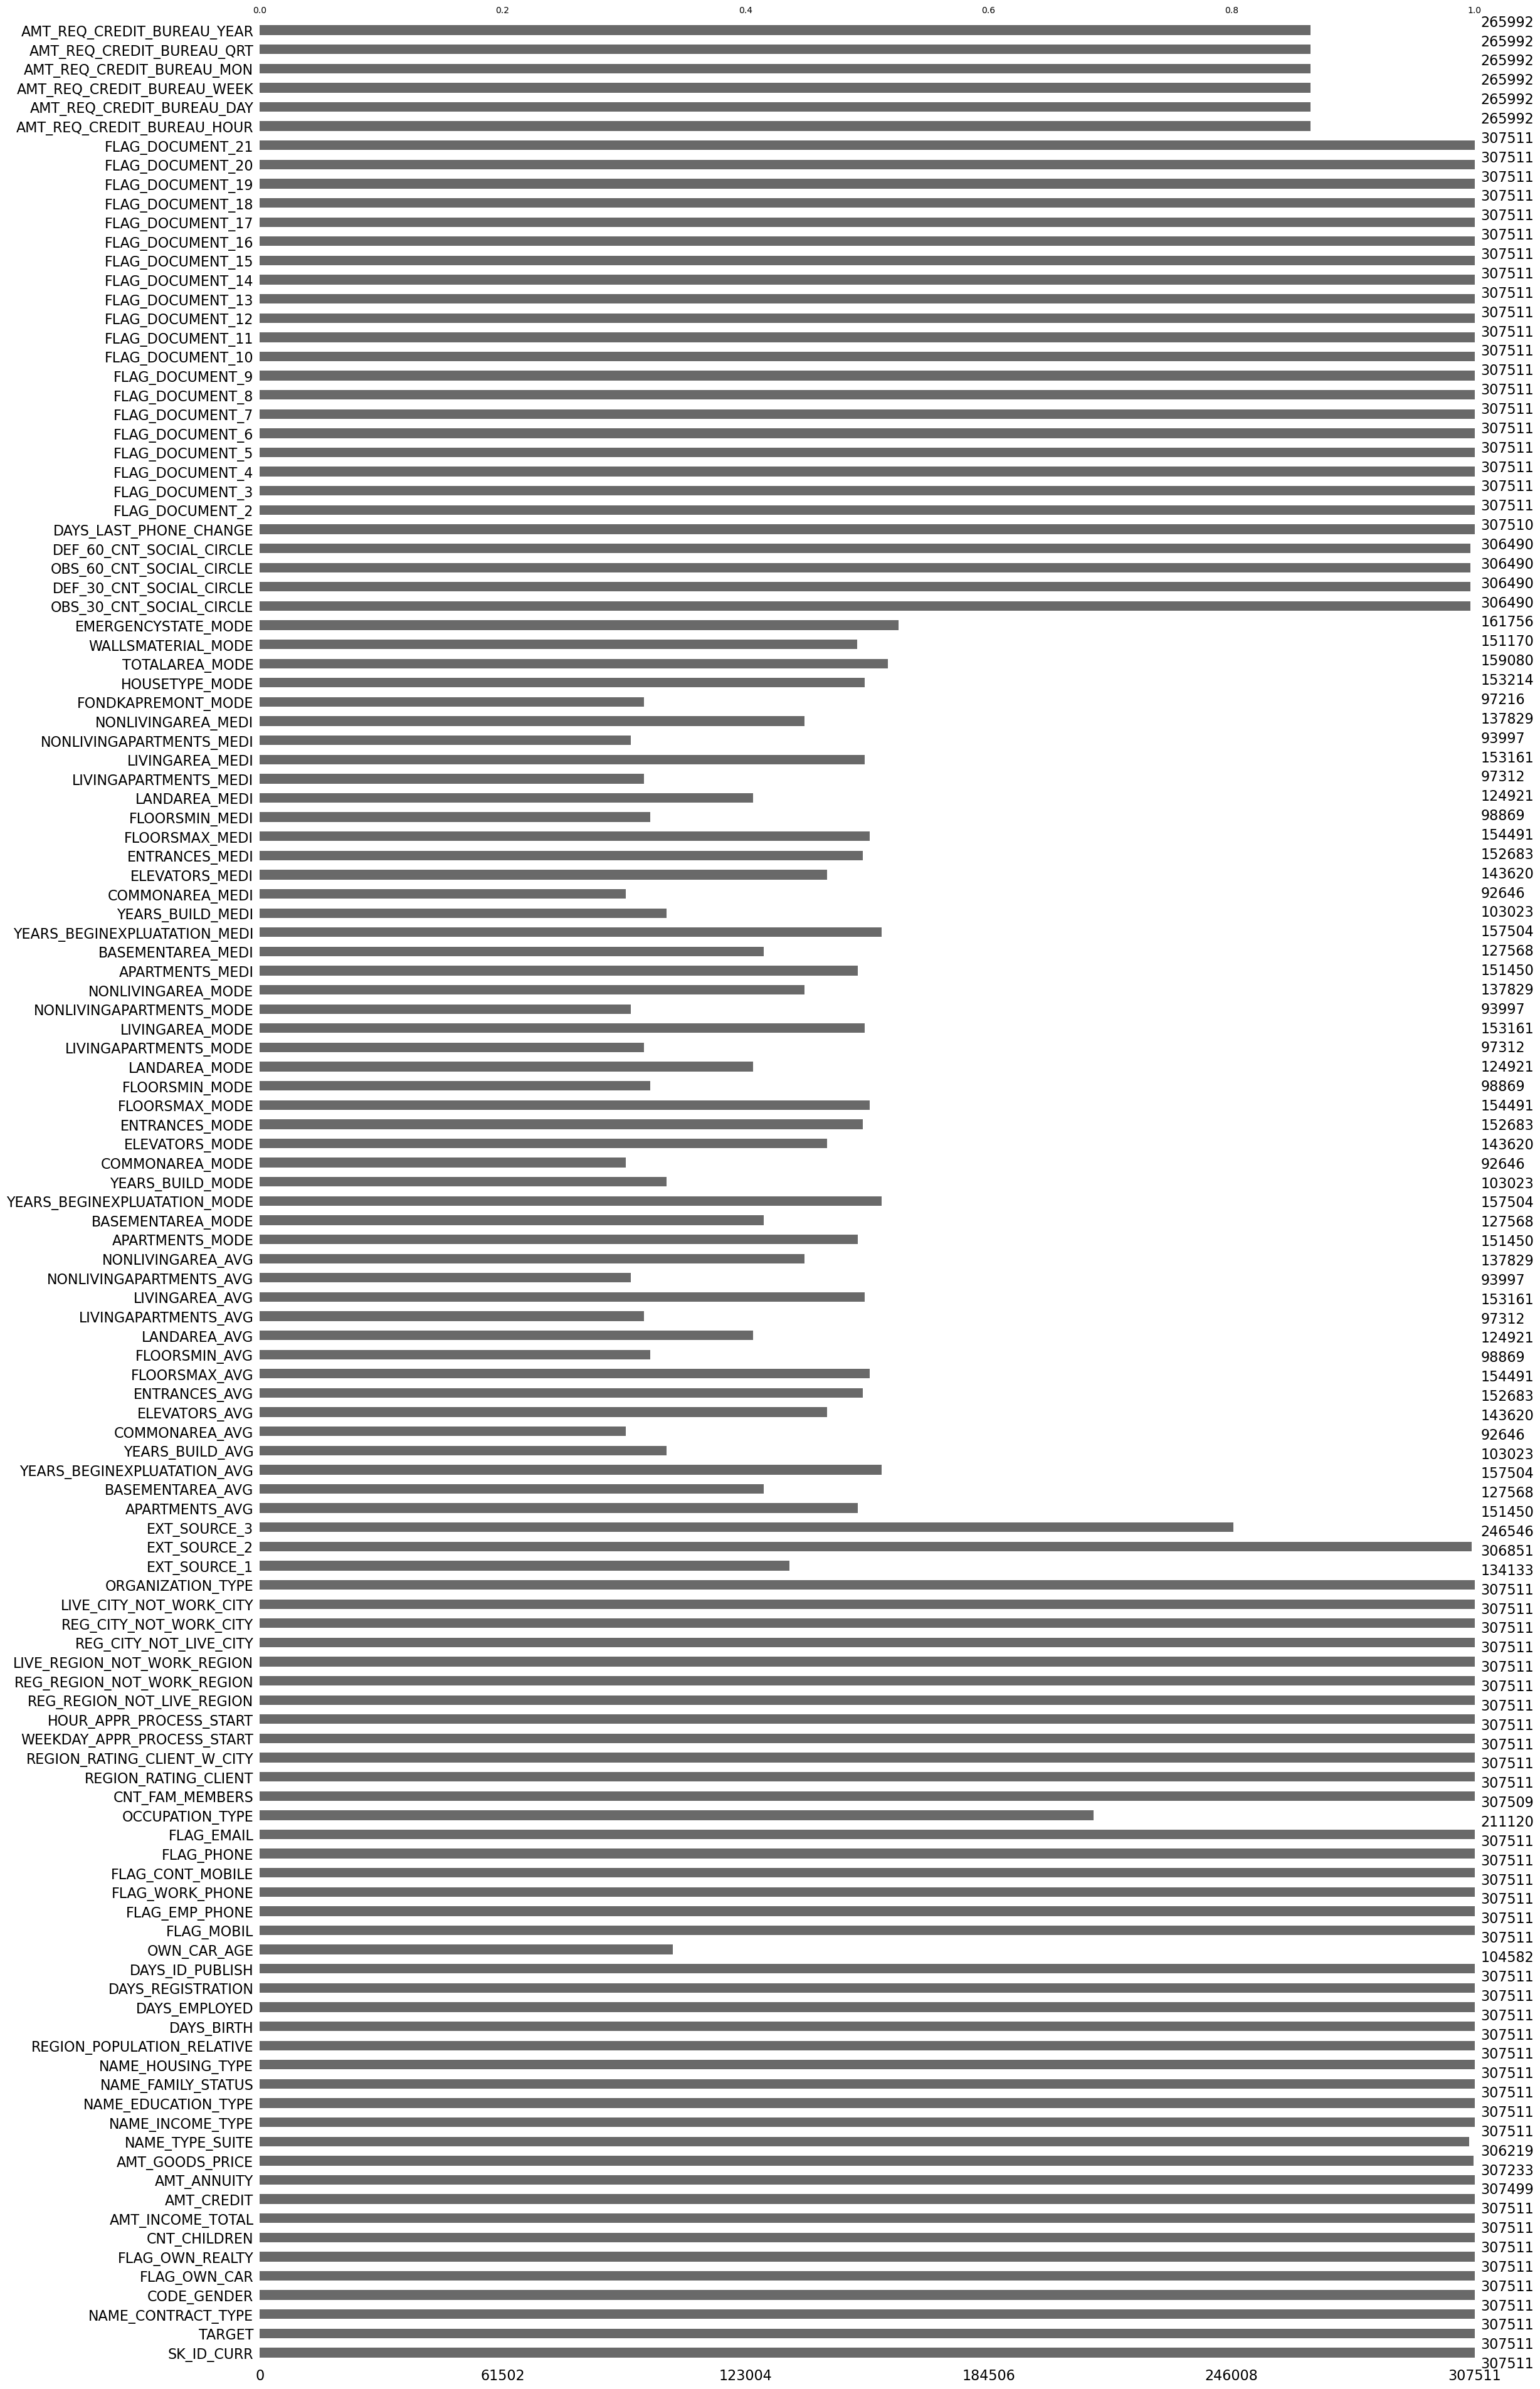

In [20]:
# Plotting the missing values as a bar graph
msno.bar(df2)
plt.show()

In [21]:
# Percentage of Null values in df2, sorted in descending order

(((df2.isnull().sum())/len(df2))*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

### Handling Null Values

**Dropping columns with null values more than 69%**

In [24]:
df2.drop(['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI'], axis=1, inplace=True)
df2.shape

(307511, 116)

**Dropping columns with null values from 66% to 69%** 

In [26]:
df2.drop(['FONDKAPREMONT_MODE','YEARS_BUILD_AVG','YEARS_BUILD_MODE','YEARS_BUILD_MEDI','FLOORSMIN_MEDI','FLOORSMIN_MODE','FLOORSMIN_AVG','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MODE'], axis=1, inplace=True)
df2.shape

(307511, 106)

**Dropping columns with null values from 52% to 66%** 

In [28]:
df2.drop(['OWN_CAR_AGE','LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE'], axis=1, inplace=True)            
df2.shape

(307511, 92)

**Dropping columns with null values from 45% to 52%** 

In [30]:
df2.drop(['TOTALAREA_MODE','WALLSMATERIAL_MODE','APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI','ENTRANCES_AVG','ENTRANCES_MODE','LIVINGAREA_AVG','LIVINGAREA_MODE','LIVINGAREA_MEDI','HOUSETYPE_MODE','FLOORSMAX_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_AVG', 'EMERGENCYSTATE_MODE'], axis=1, inplace=True)
df2.shape

(307511, 73)

## Univariate Analysis along with Null Values Removal & Outlier Handling

#### 1. OCCUPATION_TYPE

In [33]:
# Count of non-null values and count of unique values
df2.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - OCCUPATION_TYPE column is a categorical variable with 'object' dtype. 
 - It has 211120 non-null values.
 - It has 18 unique values excluding NaN values
 - Laborers is the most frequently occuring category in this column with 55186 values.

</div>

In [35]:
# Names of unique values in the column
df2.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [36]:
# Count of null values
df2.OCCUPATION_TYPE.isnull().sum()

96391

In [37]:
# % of Null values
(df2.OCCUPATION_TYPE.isnull().sum()/len(df2)*100).round(2)

31.35

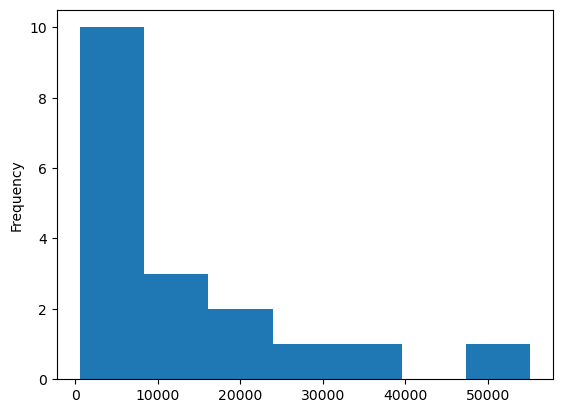

In [38]:
# Variable distribution through histogram
df2.OCCUPATION_TYPE.value_counts().plot.hist(bins=7)
plt.show()

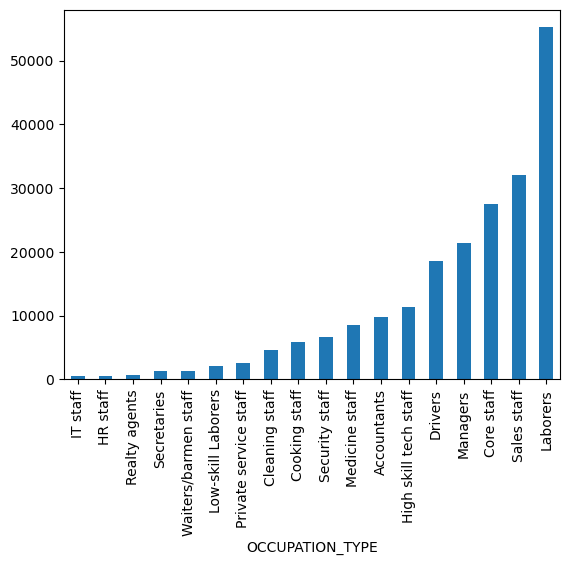

In [39]:
# Variable distribution through bar plot
df2.OCCUPATION_TYPE.value_counts().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>

 - In this graph, we can see that Labourers form the largest chunk of clients of the loan company, at more than 25%, followed by Sales staff at 15%, Core staff at 13% and Managers at about 10%.
 - Low skill labourers (0.99%), Waiters/ barmen staff (0.63%), Secretaries (0.61%), Realty agents (0.35%), HR staff (0.26%) and IT (0.24%) staff form the other end of the spectrum as the lowest percentage of clients.
</div>

In [41]:
# % of non-null categories in the variable
df2.OCCUPATION_TYPE.value_counts(normalize=True).sort_values(ascending=False)

OCCUPATION_TYPE
Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: proportion, dtype: float64

In [42]:
df2.OCCUPATION_TYPE.value_counts().describe()

count       18.000000
mean     11728.888889
std      14510.998992
min        526.000000
25%       1534.250000
50%       6333.500000
75%      16797.250000
max      55186.000000
Name: count, dtype: float64

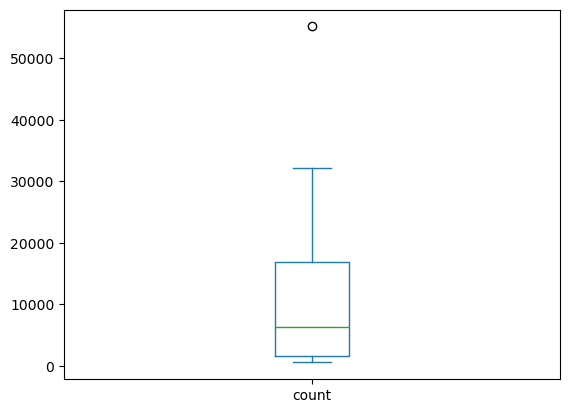

In [43]:
df2.OCCUPATION_TYPE.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>

 - The no. of Laborers (55186) included in the data is very high as compared to clients in other types of occupations. The mean (11728.88) and the median (6333.50) are very far apart as the outlier (no. of Laborers) is making the data skewed. 
 - In this case,if we can impute the null values in the column with the column mode as OCCUPATION_TYPE is a categorical variable, it will further increase the imbalance of the data making the representation of the Laborers even higher than it is now. So we can replace the null values in the column with a new category 'Unknown'. 
</div>

In [45]:
# Replacing null values with 'Unknown'
df2['OCCUPATION_TYPE']=df2['OCCUPATION_TYPE'].fillna('Unknown')

In [46]:
# Checking for null values in 'OCCUPATION_TYPE' again
df2.OCCUPATION_TYPE.isnull().sum()

0

In [47]:
# Checking the normalized value_counts for OCCUPATION_TYPE after imputation
df2.OCCUPATION_TYPE.value_counts(normalize=True)

OCCUPATION_TYPE
Unknown                  0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64

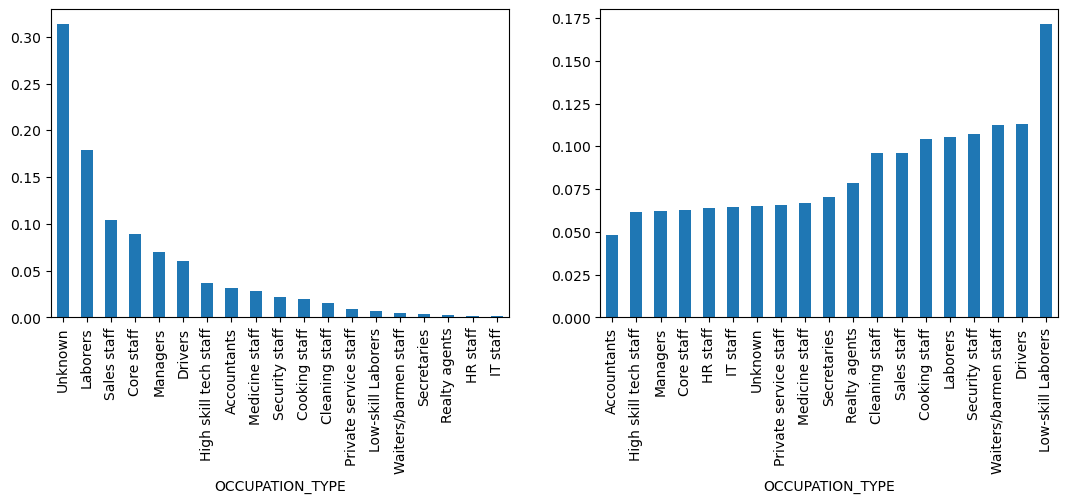

In [48]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
df2.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
df2.groupby(['OCCUPATION_TYPE'])['TARGET'].mean().sort_values().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>

 - Low-skill labourers were the highest defaulters among the other occupation groups while Accountants and High skill tech staff were among the lowest defaulters. 
 - Though the Low-skill labourers, Waiters/barmen staff and Cooking staff form a small share of the clients, they are most likely to default on their payment as compared to IT staff, HR staff, Accountants and High skill tech staff, who while also form a smaller to medium segment of the clients, are much less likely to default on their payment.
 - In general, the higher the skill level of the occupation, the less probability there was of defaulting. This may be due to the fact that higher skill jobs are also higher paying while low skilled jobs have significantly lower salaries. 
 - This indicates that the loan company should target more high - skilled clients to increase its share of customers who pay their installments on time.  

</div>

#### 2. AMT_REQ_CREDIT_BUREAU_HOUR/ DAY/ WEEK/ MON/ QRT/ YEAR

In [51]:
# Count of non-null values 
df2['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [52]:
df2['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [53]:
df2['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [54]:
df2['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [55]:
df2['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [56]:
df2['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AMT_REQ_CREDIT_BUREAU_HOUR/ DAY/ WEEK/ MON/ QRT/ YEAR columns are numerical variables with 'float64' dtype. 
 - Each of them has 265992 non-null values.
 - Their mean and median values are quite close to each other indicating normal distribution.
 - For most of them, the median value is 0.0 except AMT_REQ_CREDIT_BUREAU_YEAR whose median value is 1.
 - These variable indicate the Number of enquiries to Credit Bureau about the client one hour/ on week/ one month/ three months/ one year before application (while excluding the period already covered in the previous variable).
 
</div>

In [58]:
# Count of null values
df2.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

41519

In [59]:
df2.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

41519

In [60]:
df2.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

41519

In [61]:
df2.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

41519

In [62]:
df2.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

41519

In [63]:
df2.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

41519

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Each of AMT_REQ_CREDIT_BUREAU_HOUR/ DAY/ WEEK/ MON/ QRT/ YEAR columns has 41519 null values.
</div>

In [65]:
# % of Null values
(df2.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()/len(df2)*100).round(2)

13.5

In [66]:
(df2.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()/len(df2)*100).round(2)

13.5

In [67]:
(df2.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()/len(df2)*100).round(2)

13.5

In [68]:
(df2.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()/len(df2)*100).round(2)

13.5

In [69]:
(df2.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()/len(df2)*100).round(2)

13.5

In [70]:
(df2.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()/len(df2)*100).round(2)

13.5

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - As AMT_REQ_CREDIT_BUREAU_HOUR/ DAY/ WEEK/ MON/ QRT/ YEAR values represent no. of queries made to the credit bureau, we cannot impute their null values with float values. 
 - So we can handle null values in these columns by replacing them with column median values.
</div>

In [72]:
# Replacing null values with the column median value
df2.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df2.AMT_REQ_CREDIT_BUREAU_HOUR.median(),inplace=True)
df2['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df2['AMT_REQ_CREDIT_BUREAU_DAY'].median(),inplace=True)
df2['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df2['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),inplace=True)
df2['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df2['AMT_REQ_CREDIT_BUREAU_MON'].median(),inplace=True)
df2['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df2['AMT_REQ_CREDIT_BUREAU_QRT'].median(),inplace=True)
df2['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df2['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace=True)

In [73]:
# Rechecking for null values in the variable
df2.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

In [74]:
df2.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

In [75]:
df2.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

In [76]:
df2.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

In [77]:
df2.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

In [78]:
df2.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

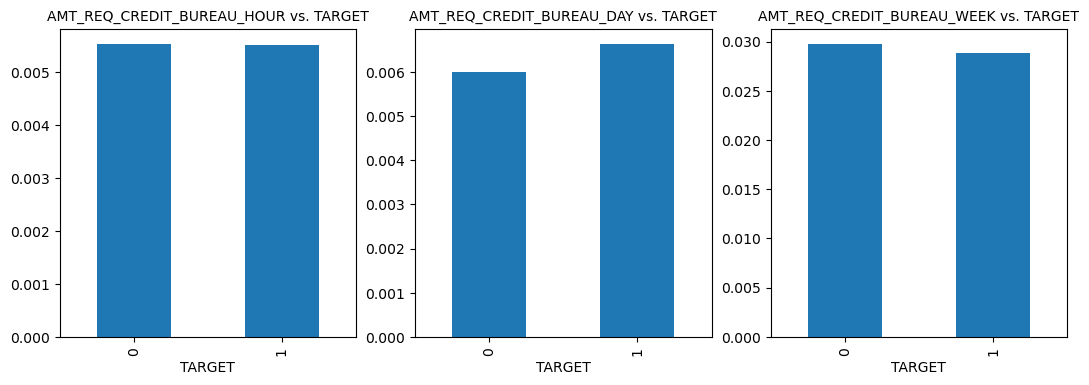

In [79]:
# Plotting AMT_REQ_CREDIT_BUREAU_HOUR / DAY / WEEK against the TARGET variable in bar graphs
plt.figure(figsize=(13,4))
plt.subplot(1,3,1)
df2.groupby('TARGET')['AMT_REQ_CREDIT_BUREAU_HOUR'].mean().plot.bar()
plt.title("AMT_REQ_CREDIT_BUREAU_HOUR vs. TARGET", fontsize=10)
plt.subplot(1,3,2)
df2.groupby('TARGET')['AMT_REQ_CREDIT_BUREAU_DAY'].mean().plot.bar()
plt.title("AMT_REQ_CREDIT_BUREAU_DAY vs. TARGET", fontsize=10)
plt.subplot(1,3,3)
df2.groupby('TARGET')['AMT_REQ_CREDIT_BUREAU_WEEK'].mean().plot.bar()
plt.title("AMT_REQ_CREDIT_BUREAU_WEEK vs. TARGET", fontsize=10)
plt.show()

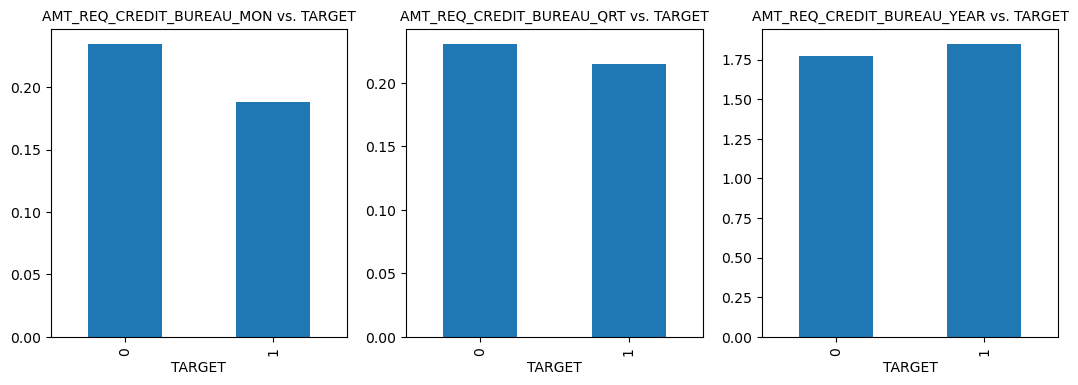

In [80]:
# Plotting AMT_REQ_CREDIT_BUREAU_MON / QRT / YEAR against the TARGET variable in bar graphs
plt.figure(figsize=(13,4))
plt.subplot(1,3,1)
df2.groupby('TARGET')['AMT_REQ_CREDIT_BUREAU_MON'].mean().plot.bar()
plt.title("AMT_REQ_CREDIT_BUREAU_MON vs. TARGET", fontsize=10)
plt.subplot(1,3,2)
df2.groupby('TARGET')['AMT_REQ_CREDIT_BUREAU_QRT'].mean().plot.bar()
plt.title("AMT_REQ_CREDIT_BUREAU_QRT vs. TARGET", fontsize=10)
plt.subplot(1,3,3)
df2.groupby('TARGET')['AMT_REQ_CREDIT_BUREAU_YEAR'].mean().plot.bar()
plt.title("AMT_REQ_CREDIT_BUREAU_YEAR vs. TARGET", fontsize=10)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Individually, each of the column AMT_REQ_CREDIT_BUREAU_HOUR/ DAY/ WEEK/ MON/ QRT/ YEAR graphs do not show significant difference in values for defaulters and non-defaulters.
 - Let's feature engineer a combined column for Credit Bureau queries from all the AMT_REQ_CREDIT_BUREAU columns, as they add up to a complete year, to check its impact on the default probability.
</div>

In [82]:
# feature engineering a combined column for Credit Bureau enquiries
df2['TOTAL_CREDIT_BUREAU'] = df2[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].sum(axis=1)

In [83]:
# Checking the dataframe to ensure addition of the 'TOTAL_CREDIT_BUREAU' column
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

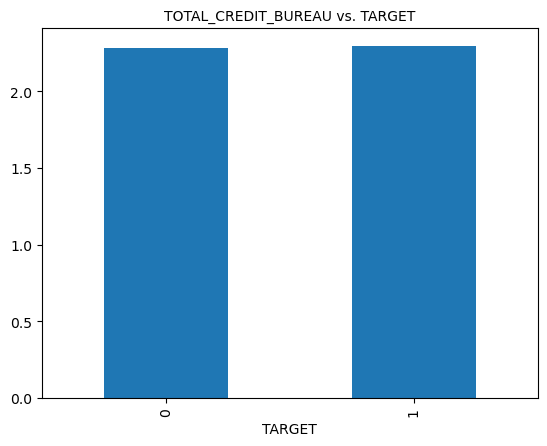

In [84]:
# Plotting TOTAL_CREDIT_BUREAU against the TARGET variable in bar graph
df2.groupby('TARGET')['TOTAL_CREDIT_BUREAU'].mean().plot.bar()
plt.title("TOTAL_CREDIT_BUREAU vs. TARGET", fontsize=10)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - As AMT_REQ_CREDIT_BUREAU_HOUR/ DAY/ WEEK/ MON/ QRT/ YEAR as well as TOTAL_CREDIT_BUREAU bar graphs do not show significant difference in values for defaulters and non-defaulters, we can conclude that the no. of queries made to the credit bureau do not significantly affect prediction of client default.
 - As we have combined the data of these columns in TOTAL_CREDIT_BUREAU column, we can drop the AMT_REQ_CREDIT_BUREAU_HOUR/ DAY/ WEEK/ MON/ QRT/ YEAR columns from the dataframe. Also, except AMT_REQ_CREDIT_BUREAU_YEAR, individually they are short periods that do not contain enough data to show defaulter activity. 
</div>

In [86]:
# Dropping columns AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, 
df2.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1, inplace=True)
df2.shape

(307511, 68)

#### 3. EXT_SOURCE_2 and EXT_SOURCE_3

In [88]:
# Count of non-null values
df2.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [89]:
df2.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - EXT_SOURCE_2 and EXT_SOURCE_3 columns are numerical variables with 'float64' dtype. 
 - They have 306851 and 246546 non-null values respectively.
 - Their mean and median values are quite close to each other though the min value and 25th % are far apart indicating presence of outliers.
 
</div>

In [91]:
# Count of null values
print("Count of null values for 'EXT_SOURCE_2' is ", df2.EXT_SOURCE_2.isnull().sum())
print("Count of null values for 'EXT_SOURCE_3' is ", df2.EXT_SOURCE_3.isnull().sum())

Count of null values for 'EXT_SOURCE_2' is  660
Count of null values for 'EXT_SOURCE_3' is  60965


In [92]:
# % of Null values
print("% of null values for 'EXT_SOURCE_2' is ", (df2.EXT_SOURCE_2.isnull().sum()/len(df2)*100).round(2))
print("% of null values for 'EXT_SOURCE_3' is ", (df2.EXT_SOURCE_3.isnull().sum()/len(df2)*100).round(2))

% of null values for 'EXT_SOURCE_2' is  0.21
% of null values for 'EXT_SOURCE_3' is  19.83


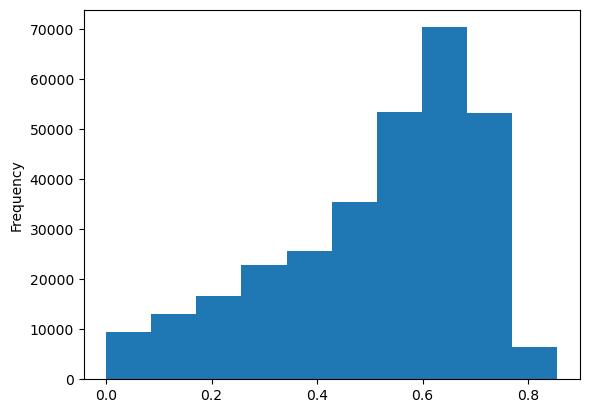

In [93]:
# Variable distribution through histogram for EXT_SOURCE_2
df2.EXT_SOURCE_2.plot.hist(bins=10)
plt.show()

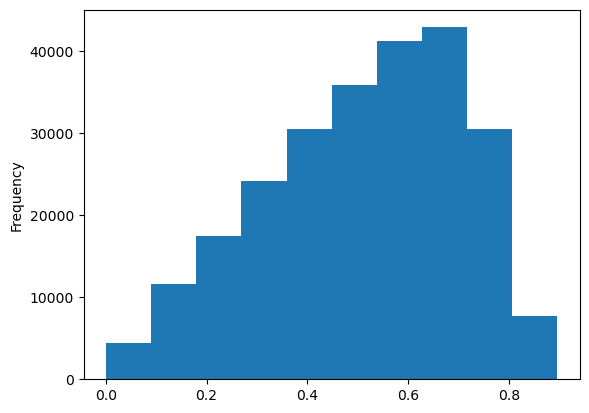

In [94]:
# Variable distribution through histogram for EXT_SOURCE_3
df2.EXT_SOURCE_3.plot.hist(bins=10)
plt.show()

In [95]:
# Imputing null values with column mean for EXT_SOURCE_2
df2.EXT_SOURCE_2.fillna(df2.EXT_SOURCE_2.median(), inplace=True)
df2.EXT_SOURCE_2.isnull().sum()

0

In [96]:
# Imputing null values with column mean for EXT_SOURCE_3
df2.EXT_SOURCE_3.fillna(df2.EXT_SOURCE_3.mean(), inplace=True)
df2.EXT_SOURCE_3.isnull().sum()

0

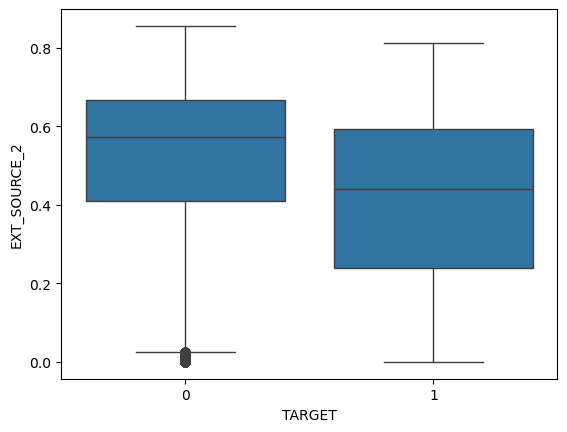

In [97]:
# Plotting EXT_SOURCE_2 for defaulters(1) and non defaulters(0) in boxplot
sns.boxplot(data=df2, y='EXT_SOURCE_2', x='TARGET')
plt.show()

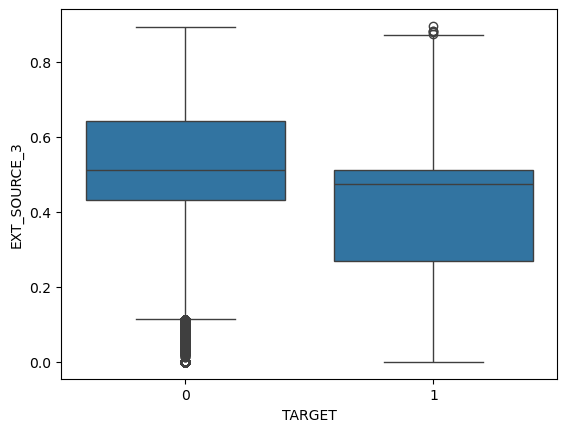

In [98]:
# Plotting EXT_SOURCE_3 for defaulters(1) and non defaulters(0) in boxplot
sns.boxplot(data=df2, y='EXT_SOURCE_3', x='TARGET')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Both EXT_SOURCE_2 and EXT_SOURCE_3 columns seem to have higher median values for non-defaulters (between 0.4 and 0.7) as compared to defaulters (between 0.2 and 0.58). 
 - So we can conclude that the loan company can ensure potential clients have higher normalized scores from external sources 2 and 3 to reduce probability of default.
 
</div>

#### 4. NAME_TYPE_SUITE                  

In [101]:
# Count of non-null values and count of unique values
df2.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - NAME_TYPE_SUITE column is a categorical column, with dtype='object', where the loan company is checking who the client was accompanied by during the time of application of loan.
 - It has 306219 non-null values and 7 unique values.
 - 'Unaccompanied' is the most frequently occuring category in this column with 248526 values.
 
</div>

In [103]:
# Count of null values
df2.NAME_TYPE_SUITE.isnull().sum()

1292

In [104]:
# % of Null values
(df2.NAME_TYPE_SUITE.isnull().sum()/len(df2)*100).round(2)

0.42

In [105]:
# Checking value counts
df2.NAME_TYPE_SUITE.value_counts(normalize=True)

NAME_TYPE_SUITE
Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: proportion, dtype: float64

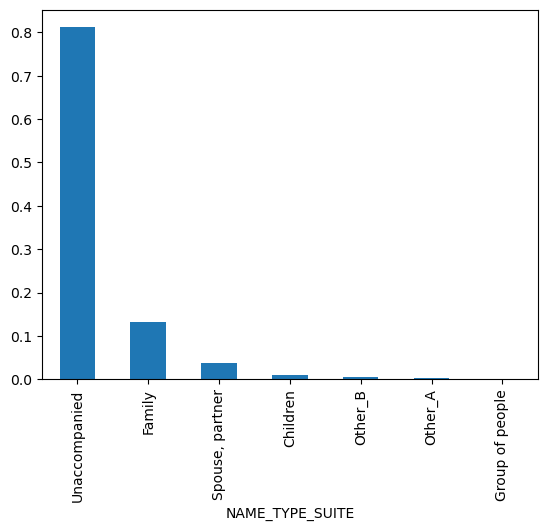

In [106]:
# Variable distribution through bar chart for NAME_TYPE_SUITE
df2.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - From this graph we can see that in about 81% of the clients, the clients were unaccompanied when they came to apply for a loan.
 - 13% of clients were accompanied by their families, while 3.7% were accompanied by their spouse/partner.
 - Very few clients chose to come along with their children or other people or even a group of people while applying for the loan.
 
</div>

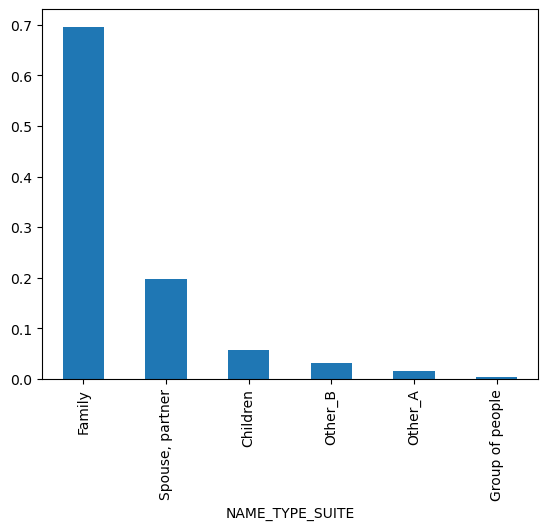

In [108]:
# Plotting NAME_TYPE_SUITE without the 'Unaccompanied' category to examine the other categories in detail
df2.loc[df2.NAME_TYPE_SUITE!='Unaccompanied','NAME_TYPE_SUITE'].value_counts(normalize=True).plot.bar()
plt.show()

In [109]:
# Calculating the column mode
df2.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [110]:
# Imputing null values with column mode for NAME_TYPE_SUITE as it is a categorical column with few missing values
df2.NAME_TYPE_SUITE.fillna(df2.NAME_TYPE_SUITE.mode()[0], inplace=True)
df2.NAME_TYPE_SUITE.isnull().sum()

0

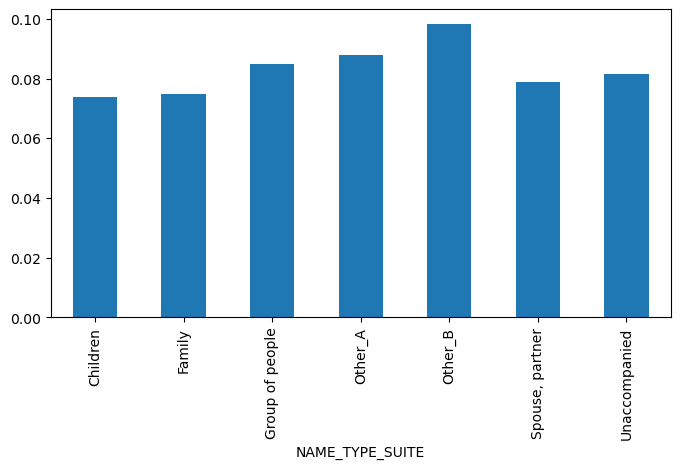

In [111]:
# Plotting the bar graph of NAME_TYPE_SUITE categories with TARGET mean value.
plt.figure(figsize=(8,4))
df2.groupby('NAME_TYPE_SUITE')['TARGET'].mean().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - In this graph we can see that through there does not seem to be a significant difference, the clients who were highest defaulters seem to have been accompanied by non-family members (Other_A / Other_B / Group of people) when they came to apply for a loan.
 - Following them, the next highest set of defaulters were unaccompanied when they came to apply for a loan
 - The lowest defaulters were those who chose to come along with their spouse / partner, children or family.
 - This result may also be due to the fact that the family members accompanying the client may be their co-applicants. 
 
</div>

#### 5. OBS_30_CNT_SOCIAL_CIRCLE / OBS_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE / DEF_60_CNT_SOCIAL_CIRCLE  

In [114]:
# Count of non-null values
df2[['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE
count             306490.000000             306490.000000
mean                   1.422245                  1.405292
std                    2.400989                  2.379803
min                    0.000000                  0.000000
25%                    0.000000                  0.000000
50%                    0.000000                  0.000000
75%                    2.000000                  2.000000
max                  348.000000                344.000000

In [115]:
df2[['DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].describe()

DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE
count             306490.000000             306490.000000
mean                   0.143421                  0.100049
std                    0.446698                  0.362291
min                    0.000000                  0.000000
25%                    0.000000                  0.000000
50%                    0.000000                  0.000000
75%                    0.000000                  0.000000
max                   34.000000                 24.000000

<div class="alert alert-block alert-info"> 
<b>Insight</b>
    
 - OBS_30_CNT_SOCIAL_CIRCLE / OBS_60_CNT_SOCIAL_CIRCLE column are numerical columns, with dtype='float64', where the loan company is checking the number of observations of client's social surroundings with observable 30 /60 DPD (days past due) default.
 - DEF_30_CNT_SOCIAL_CIRCLE / DEF_60_CNT_SOCIAL_CIRCLE column are numerical columns, with dtype='float64', where the loan company is checking the number of observations of client's social surroundings where earlier customers defaulted on 30 /60 DPD (days past due).
 - They have 306490 non-null values each.
 - For OBS_30_CNT_SOCIAL_CIRCLE / OBS_60_CNT_SOCIAL_CIRCLE, the mean and median are not far apart, through median is 0.0 in both variables.
 - For DEF_30_CNT_SOCIAL_CIRCLE / DEF_60_CNT_SOCIAL_CIRCLE also, the mean and median are not far apart, through median is 0.0 in both variables.
 
</div>

In [117]:
# Count of null values

df2[['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
dtype: int64

In [118]:
df2[['DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].isnull().sum()

DEF_30_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
dtype: int64

In [119]:
# % of Null values

(df2[['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].isnull().sum()/len(df2)*100).round(2)

OBS_30_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
dtype: float64

In [120]:
(df2[['DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].isnull().sum()/len(df2)*100).round(2)

DEF_30_CNT_SOCIAL_CIRCLE    0.33
DEF_60_CNT_SOCIAL_CIRCLE    0.33
dtype: float64

In [121]:
# Checking value counts

df2['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)

OBS_30_CNT_SOCIAL_CIRCLE
0.0      0.534797
1.0      0.159167
2.0      0.097256
3.0      0.066306
4.0      0.046145
5.0      0.031169
6.0      0.021055
7.0      0.014323
8.0      0.009681
9.0      0.006535
10.0     0.004490
11.0     0.002780
12.0     0.002127
13.0     0.001341
14.0     0.000842
15.0     0.000542
16.0     0.000434
17.0     0.000287
18.0     0.000150
19.0     0.000144
20.0     0.000098
21.0     0.000095
22.0     0.000072
23.0     0.000049
25.0     0.000036
24.0     0.000036
27.0     0.000016
26.0     0.000010
30.0     0.000007
28.0     0.000003
29.0     0.000003
47.0     0.000003
348.0    0.000003
Name: proportion, dtype: float64

In [122]:
df2['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)

OBS_60_CNT_SOCIAL_CIRCLE
0.0      0.537264
1.0      0.159451
2.0      0.097119
3.0      0.065956
4.0      0.045502
5.0      0.030875
6.0      0.020715
7.0      0.014173
8.0      0.009416
9.0      0.006392
10.0     0.004356
11.0     0.002731
12.0     0.002023
13.0     0.001308
14.0     0.000777
15.0     0.000542
16.0     0.000447
17.0     0.000238
18.0     0.000160
19.0     0.000144
20.0     0.000098
21.0     0.000091
22.0     0.000065
23.0     0.000042
24.0     0.000039
25.0     0.000036
27.0     0.000016
29.0     0.000007
28.0     0.000003
47.0     0.000003
344.0    0.000003
30.0     0.000003
26.0     0.000003
Name: proportion, dtype: float64

In [123]:
df2['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)

DEF_30_CNT_SOCIAL_CIRCLE
0.0     0.885262
1.0     0.092427
2.0     0.017368
3.0     0.003889
4.0     0.000825
5.0     0.000183
6.0     0.000036
7.0     0.000003
34.0    0.000003
8.0     0.000003
Name: proportion, dtype: float64

In [124]:
df2['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)

DEF_60_CNT_SOCIAL_CIRCLE
0.0     0.915922
1.0     0.071262
2.0     0.010343
3.0     0.001951
4.0     0.000440
5.0     0.000065
6.0     0.000010
7.0     0.000003
24.0    0.000003
Name: proportion, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - By calculating value counts of all the 4 columns, we can see that there is one row that is showing very high values for all 4 columns: Row no. 148403 --> OBS_60_CNT_SOCIAL_CIRCLE = 344, OBS_30_CNT_SOCIAL_CIRCLE = 348, DEF_30_CNT_SOCIAL_CIRCLE = 34, DEF_60_CNT_SOCIAL_CIRCLE = 24. These values are distorting the mean values for all 4 columns.
 - Lets examine this row and, if required, drop it from the analysis. 
 
</div>

In [126]:
df2[df2.OBS_60_CNT_SOCIAL_CIRCLE==344]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
148403      272071       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
148403               Y             0          202500.0    180000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
148403       9000.0         180000.0          Family    State servant   

       NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
148403    Higher education  Single / not married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
148403                    0.020246      -10111          -1917   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
148403            -2306.0            -2306           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
148403                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
148403      Core staff              1.0                     3   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
148403                            3                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
148403                        9                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
148403                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
148403                       0                       1   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
148403                        1            Police      0.304506      0.357293   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
148403                     348.0                      34.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
148403                     344.0                      24.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
148403                  -667.0                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
148403                0                0                0                0   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
148403                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_21  TOTAL_CREDIT_BUREAU  
148403                 0                  5.0

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The client data in this row shows that the client in working in a Police organization and is not a defaulter. Though this row seems to have genuine data and not spurious data, its high figures are affecting the anlaysis. So we can drop this row. 
 
</div>

In [128]:
#Dropping the OBS_30_CNT_SOCIAL_CIRCLE / DEF_30_CNT_SOCIAL / OBS_60_CNT_SOCIAL_CIRCLE / DEF_60_CNT_SOCIAL_CIRCLE outlier 
df2 = df2[~(df2.OBS_60_CNT_SOCIAL_CIRCLE==344)]
df2.shape

(307510, 68)

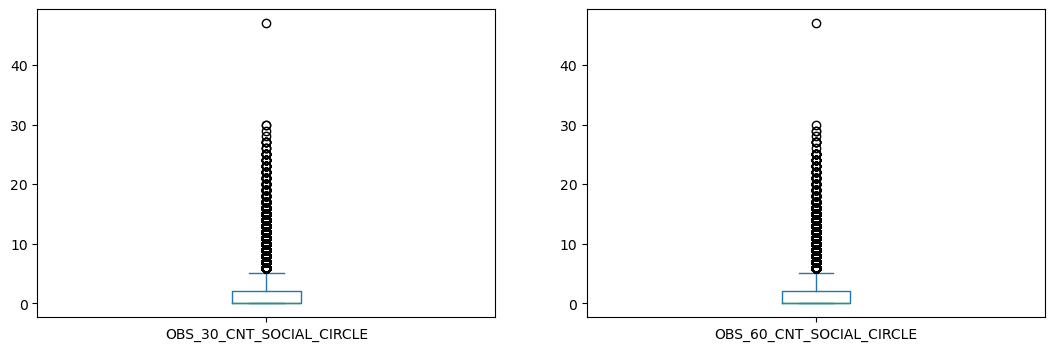

In [129]:
# Variable distribution through box plot for OBS_30_CNT_SOCIAL_CIRCLE & OBS_60_CNT_SOCIAL_CIRCLE
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
df2['OBS_30_CNT_SOCIAL_CIRCLE'].plot.box()
plt.subplot(1,2,2)
df2['OBS_60_CNT_SOCIAL_CIRCLE'].plot.box()
plt.show()

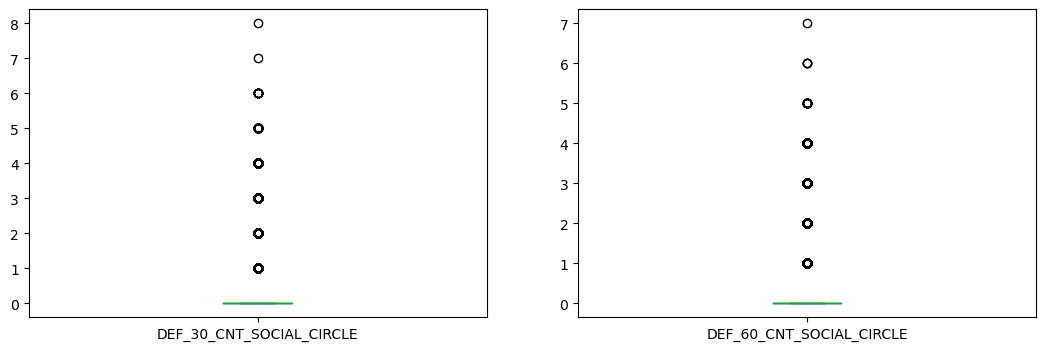

In [130]:
# Variable distribution through box plot for DEF_30_CNT_SOCIAL_CIRCLE & DEF_60_CNT_SOCIAL_CIRCLE
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
df2['DEF_30_CNT_SOCIAL_CIRCLE'].plot.box()
plt.subplot(1,2,2)
df2['DEF_60_CNT_SOCIAL_CIRCLE'].plot.box()
plt.show()

In [131]:
# As there seeem to be outliers in the data, imputing the missing values in all 4 columns with column median
df2.OBS_30_CNT_SOCIAL_CIRCLE.fillna(df2.OBS_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
print("Null values in OBS_30_CNT_SOCIAL_CIRCLE: ", df2.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum())

df2.OBS_60_CNT_SOCIAL_CIRCLE.fillna(df2.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
print("Null values in OBS_60_CNT_SOCIAL_CIRCLE: ", df2.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum())

df2.DEF_30_CNT_SOCIAL_CIRCLE.fillna(df2.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
print("Null values in DEF_30_CNT_SOCIAL_CIRCLE: ", df2.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum())

df2.DEF_60_CNT_SOCIAL_CIRCLE.fillna(df2.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
print("Null values in DEF_60_CNT_SOCIAL_CIRCLE: ", df2.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum())

Null values in OBS_30_CNT_SOCIAL_CIRCLE:  0
Null values in OBS_60_CNT_SOCIAL_CIRCLE:  0
Null values in DEF_30_CNT_SOCIAL_CIRCLE:  0
Null values in DEF_60_CNT_SOCIAL_CIRCLE:  0


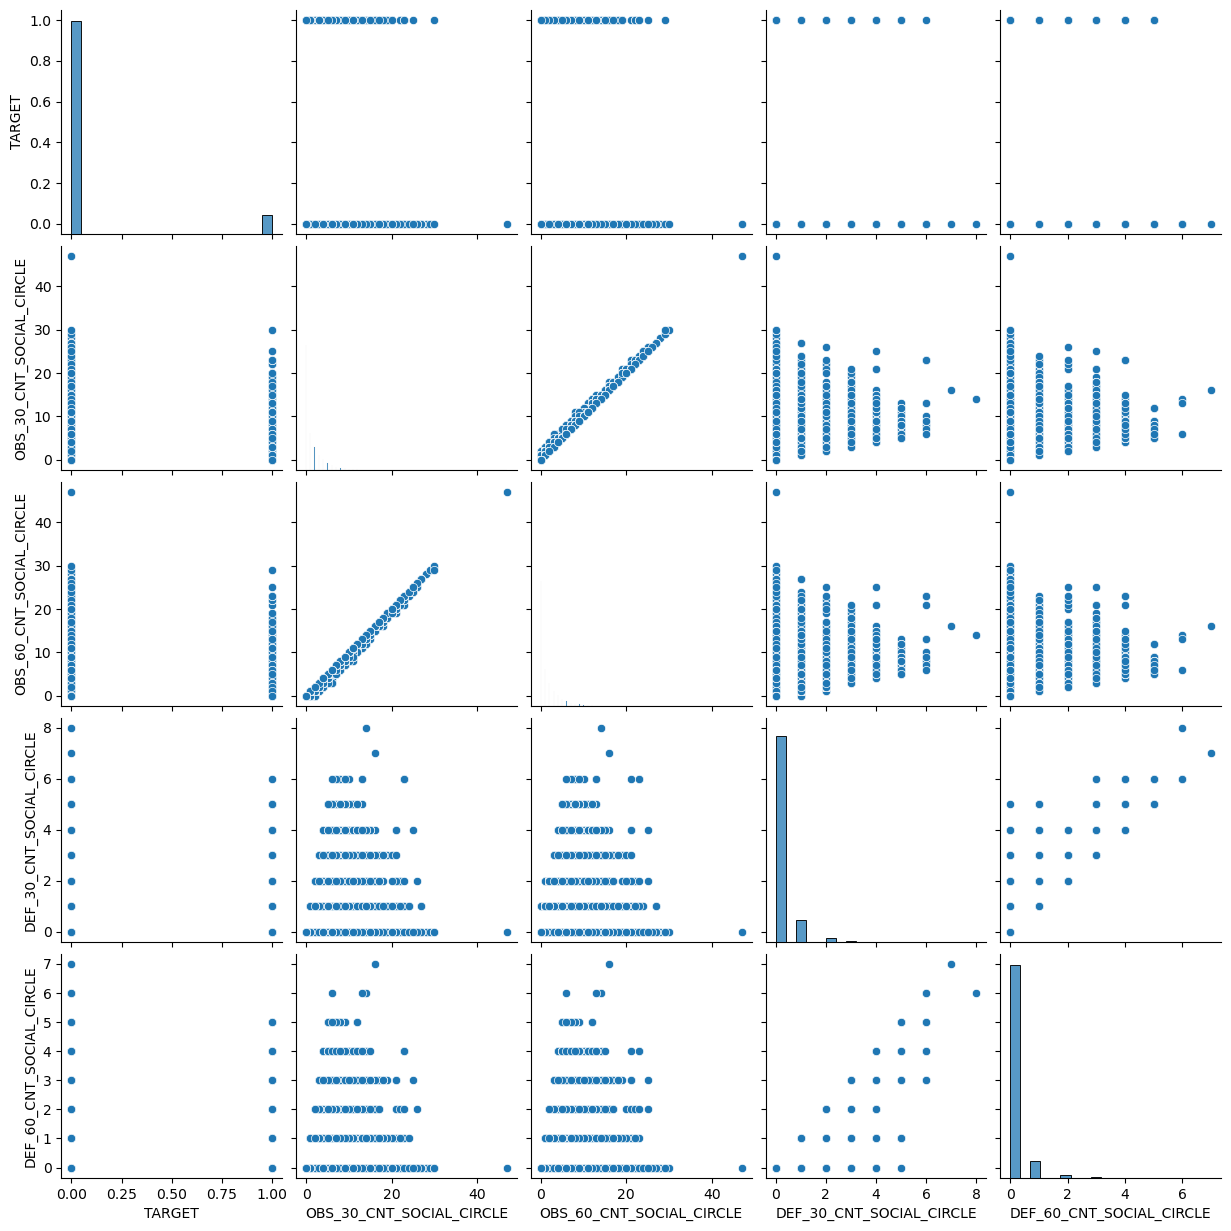

In [132]:
sns.pairplot(data=df2, vars=['TARGET','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - As we can observe from the box plots and pair plots of the 4 columns: OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE seem to be having the same number of datapoints with same variability and are positively correlated with each other.
 - Similarly, DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE also seem to be having the same number of datapoints with same variability and are also positively correlated with each other.
 - From these observations, it makes sense to drop columns OBS_30_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE as the other two columns are showing defaulter activity for a longer period --> 60 days as compared to 30 days. 
 
</div>

In [134]:
# Dropping columns OBS_30_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE
df2.drop(['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE'], axis=1, inplace=True)
df2.shape

(307510, 66)

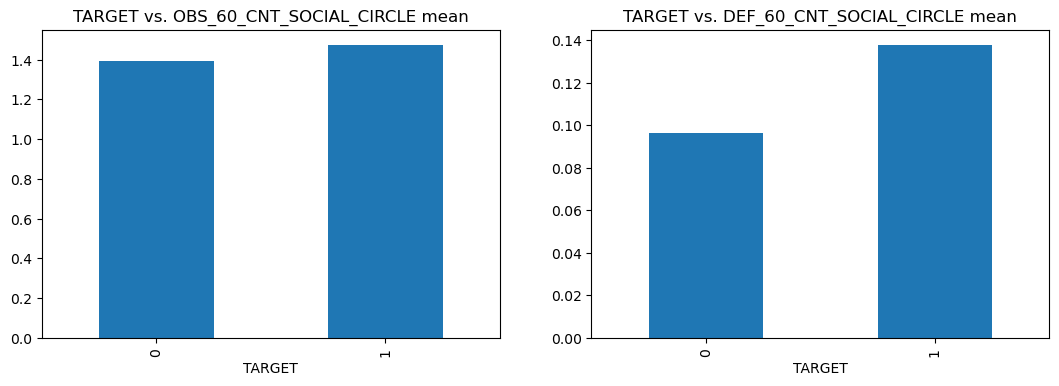

In [135]:
# Plotting the bar plot of TARGET vs. OBS_60_CNT_SOCIAL_CIRCLE / DEF_60_CNT_SOCIAL_CIRCLE mean values 
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
df2.groupby('TARGET')['OBS_60_CNT_SOCIAL_CIRCLE'].mean().plot.bar()
plt.title("TARGET vs. OBS_60_CNT_SOCIAL_CIRCLE mean")
plt.subplot(1,2,2)
df2.groupby('TARGET')['DEF_60_CNT_SOCIAL_CIRCLE'].mean().plot.bar()
plt.title("TARGET vs. DEF_60_CNT_SOCIAL_CIRCLE mean")
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - As we can observe from the above box plots, OBS_60_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE both seem to have higher mean values for defaulters rather than non-defaulters, though the difference is not very significant in OBS_60_CNT_SOCIAL_CIRCLE.
 - Thus, we can conclude that, along with other significant variables, if the client seems to have markedly high score on these variables, then the loan company can either reduce the amount of loan or give it at higher interest rate.   
 
</div>

#### 6. AMT_GOODS_PRICE

In [138]:
# Count of non-null values and count of unique values
df2.AMT_GOODS_PRICE.describe().round(2)

count     307232.00
mean      538397.37
std       369446.50
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AMT_GOODS_PRICE column is a numerical variable with 'float64' dtype.
 - For consumer loans, it is the price of the goods for which the loan is given.
 - It has 307232 non-null values.
 - Its mean and median values not very far from each other. Though it seems to be having a gradual increase in values till the 75th percentile, there is a sudden jump of 5X from 75th percentile to the max value.
 - This indicates presence of outliers.  
 
</div>

In [140]:
# Count of null values
df2.AMT_GOODS_PRICE.isnull().sum()

278

In [141]:
# % of Null values
(df2.AMT_GOODS_PRICE.isnull().sum()/len(df2)*100).round(2)

0.09

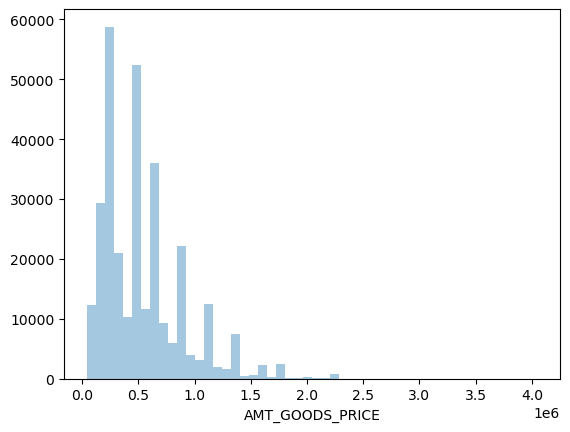

In [142]:
# Variable distribution through histogram for AMT_GOODS_PRICE
sns.distplot(df2.AMT_GOODS_PRICE, kde=False)
plt.show()

In [143]:
# Imputing null values with column median for AMT_GOODS_PRICE as the distribution is skewed towards left
df2.AMT_GOODS_PRICE.fillna(df2.AMT_GOODS_PRICE.median(), inplace=True)
df2.AMT_GOODS_PRICE.isnull().sum()

0

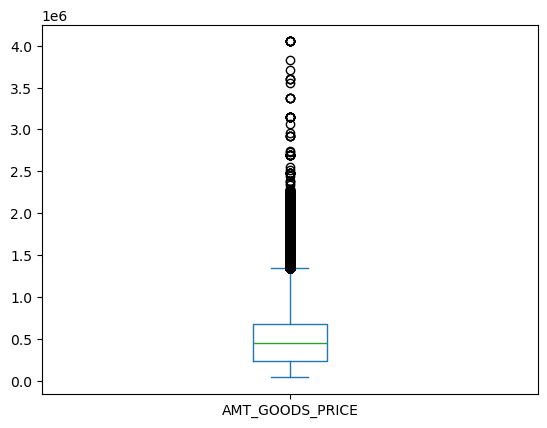

In [144]:
df2.AMT_GOODS_PRICE.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though AMT_GOODS_PRICE column has outliers, most of the outliers are present in a continous manner till the value of 2500000.
 - Beyond this value, they are spread more far apart.
 - To handle these outliers, we can consider capping the outliers at the value of 2500000 to ensure extreme values are removed from the column while the valuable information is not lost.  
 
</div>

In [146]:
# Capping the outliers at 2500000
upper_bound_goods = 2500000
df2['AMT_GOODS_PRICE'] = np.where(df2['AMT_GOODS_PRICE']>upper_bound_goods,upper_bound_goods,df2['AMT_GOODS_PRICE'])

In [147]:
# Rechecking for outliers beyond the upper_bound_goods after capping for outliers
df2[df2['AMT_GOODS_PRICE']>2500000]['AMT_GOODS_PRICE']

Series([], Name: AMT_GOODS_PRICE, dtype: float64)

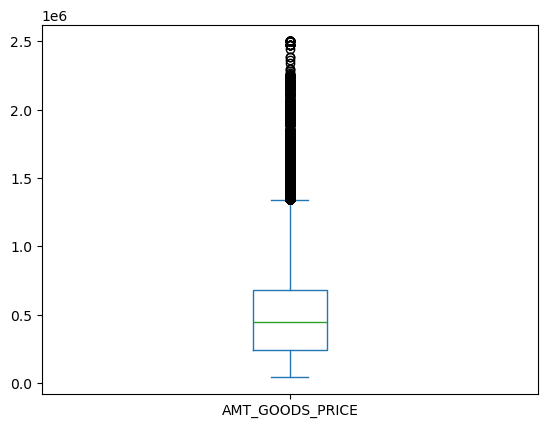

In [148]:
# Rechecking for outliers in AMT_GOODS_PRICE through box plot
df2.AMT_GOODS_PRICE.plot.box()
plt.show()

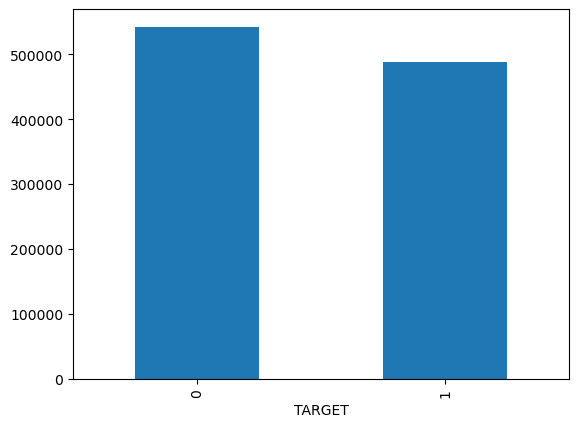

In [149]:
# Plotting the bar plot of TARGET vs. AMT_GOODS_PRICE mean values 
df2.groupby('TARGET')['AMT_GOODS_PRICE'].mean().plot.bar()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - It seems from this graph that non-defaulters prefer to go for slightly higher value consumer loans than defaulters though the difference is minimal.
 
</div>

#### 7. AMT_ANNUITY

In [152]:
# Count of non-null values 
df2.AMT_ANNUITY.describe().round(2)

count    307498.00
mean      27108.63
std       14493.72
min        1615.50
25%       16524.00
50%       24903.00
75%       34596.00
max      258025.50
Name: AMT_ANNUITY, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AMT_ANNUITY column is a numerical variable with 'float64' dtype.
 - The column refers to the loan payment amount to be paid through monthly installments.
 - It has 307498 non-null values.
 - Its mean and median values are relatively close to each other. Though it seems to be having a gradual increase in values till the 75th percentile, there is a sudden jump of 6.5X from 75th percentile to the max value.
 - This indicates presence of outliers.  
 
</div>

In [154]:
# Count of null values
df2.AMT_ANNUITY.isnull().sum()

12

In [155]:
# % of Null values
(df2.AMT_ANNUITY.isnull().sum()/len(df2)*100).round(4)

0.0039

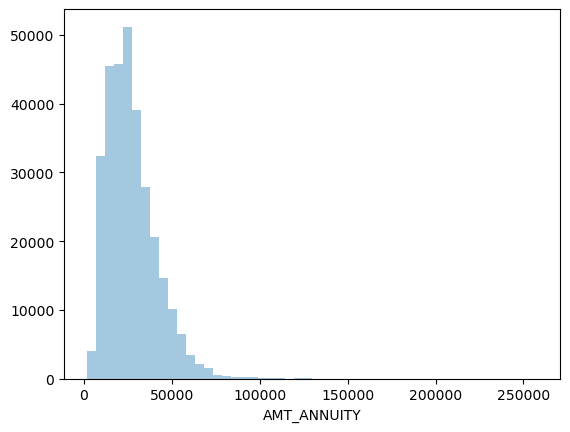

In [156]:
# Variable distribution through histogram for AMT_ANNUITY
sns.distplot(df2.AMT_ANNUITY, kde=False)
plt.show()

In [157]:
# Imputing null values with column median for AMT_ANNUITY as the distribution is skewed towards left
df2.AMT_ANNUITY.fillna(df2.AMT_ANNUITY.median(), inplace=True)
df2.AMT_ANNUITY.isnull().sum()

0

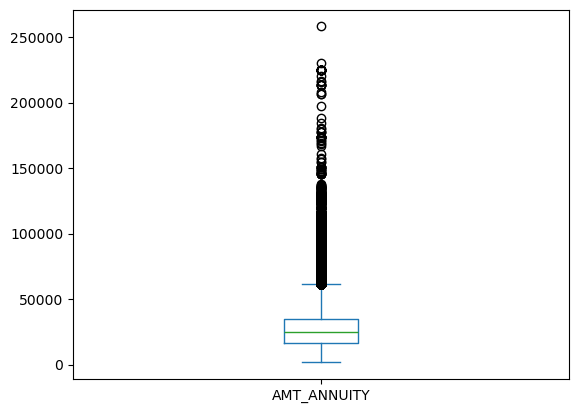

In [158]:
df2.AMT_ANNUITY.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though AMT_ANNUITY column has outliers, most of the outliers are present in a continous manner till the value of 140000.
 - Beyond this value, they are spread more far apart.
 - To handle these outliers, we can consider capping the outliers at the value of 140000 to ensure extreme values are removed from the column while the valuable information is not lost.  
 
</div>

In [160]:
# Capping the outliers at 140000
upper_bound_annuity = 140000
df2['AMT_ANNUITY'] = np.where(df2['AMT_ANNUITY']>upper_bound_annuity,upper_bound_annuity,df2['AMT_ANNUITY'])

In [161]:
# Rechecking for outliers beyond the upper_bound_annuity after capping for outliers
df2[df2['AMT_ANNUITY']>140000]['AMT_ANNUITY']

Series([], Name: AMT_ANNUITY, dtype: float64)

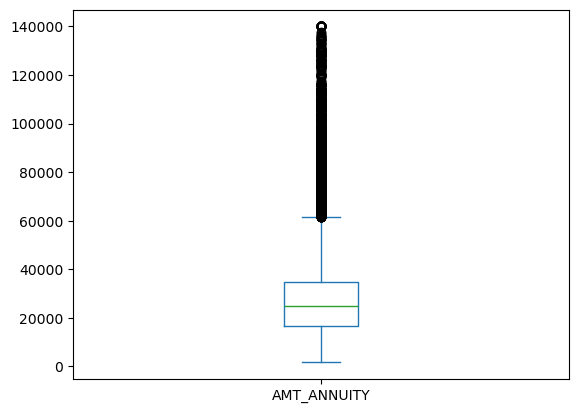

In [162]:
# Rechecking for outliers in AMT_ANNUITY through box plot
df2.AMT_ANNUITY.plot.box()
plt.show()

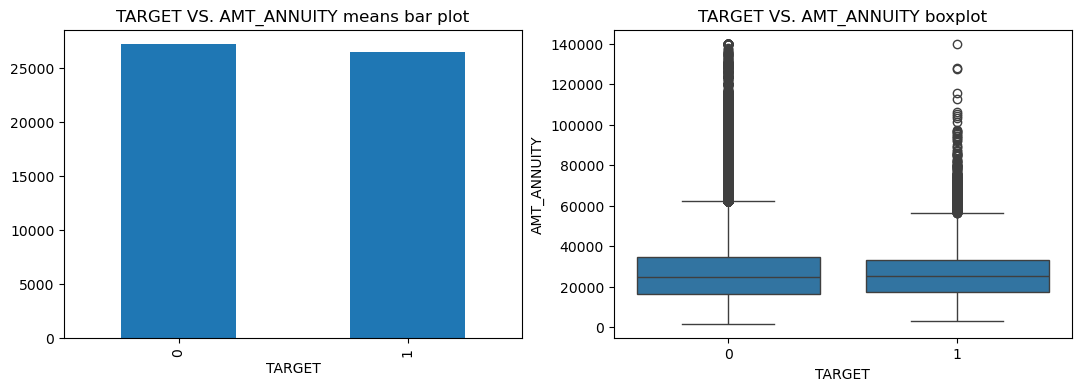

In [163]:
# Plotting the bar plot and boxplot of TARGET vs. AMT_ANNUITY values 
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
df2.groupby('TARGET')['AMT_ANNUITY'].mean().plot.bar()
plt.title("TARGET VS. AMT_ANNUITY means bar plot")
plt.subplot(1,2,2)
sns.boxplot(x=df2.TARGET, y=df2.AMT_ANNUITY)
plt.title("TARGET VS. AMT_ANNUITY boxplot")
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - From this graph we can see that there is negligible difference between defaulters and non-defaulters in terms of loan annuity, though defaulters seem to be having a slighly narrower and lower spread for loan annuity.
 
</div>

#### 8. CNT_FAM_MEMBERS

In [166]:
# Count of non-null values 
df2.CNT_FAM_MEMBERS.describe().round(2)

count    307508.00
mean          2.15
std           0.91
min           1.00
25%           2.00
50%           2.00
75%           3.00
max          20.00
Name: CNT_FAM_MEMBERS, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - CNT_FAM_MEMBERS column is a numerical variable with 'float64' dtype and consists of discrete numerical values.
 - The column refers to the number of family members the client has.
 - It has 307509 non-null values.
 - Its mean (2.15) and median (2) values are relatively close to each other. Though it seems to be increasing gradually in value till the 75th percentile, there is a sudden jump of 6X from 75th percentile (3) to the max value (20).
 - This indicates presence of outliers.  
 
</div>

In [168]:
# Count of null values
df2.CNT_FAM_MEMBERS.isnull().sum()

2

In [169]:
# % of Null values
(df2.CNT_FAM_MEMBERS.isnull().sum()/len(df2)*100).round(5)

0.00065

In [170]:
# Calculating value counts of the variable
df2.CNT_FAM_MEMBERS.value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67846
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

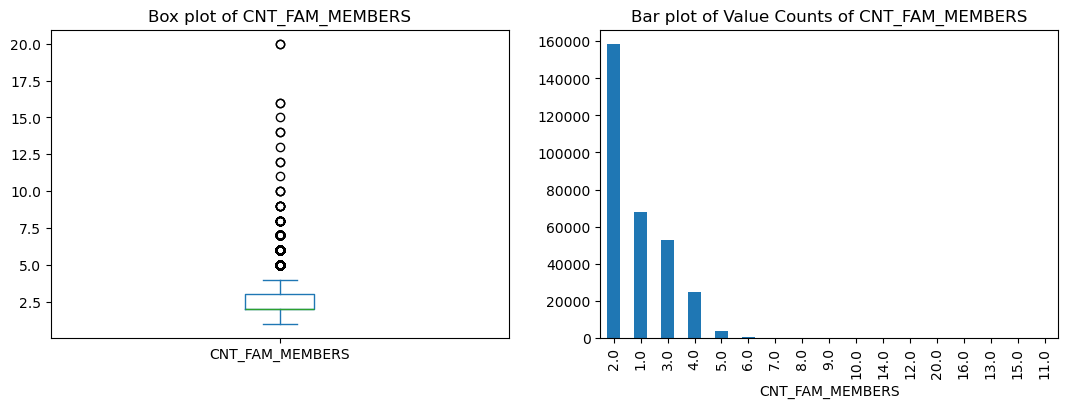

In [171]:
# Exploring variable distribution through boxplot and barplot for CNT_FAM_MEMBERS
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)    
df2.CNT_FAM_MEMBERS.plot.box()
plt.title('Box plot of CNT_FAM_MEMBERS')
plt.subplot(1,2,2)
df2.CNT_FAM_MEMBERS.value_counts().plot.bar()
plt.title('Bar plot of Value Counts of CNT_FAM_MEMBERS')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The above visualizations show that most clients seem to have 1 to 4 family members in all while the outliers seem to have family members ranging from 5 to 20 members.
 - As this column refers to the count of family members in the client's family (discrete value), we can remove the missing values in the column by imputing them with the column mode.
 - Also there are some rows that are showing very high value (20) for CNT_FAM_MEMBERS. This value is an outlier.
 - Lets examine thes rows and, if required, drop them from the analysis.
 
</div>

In [173]:
# Calculating column mode
df2.CNT_FAM_MEMBERS.mode()[0]

2.0

In [174]:
# Imputing null values with column mode for CNT_FAM_MEMBERS 
df2.CNT_FAM_MEMBERS.fillna(df2.CNT_FAM_MEMBERS.mode()[0], inplace=True)
df2.CNT_FAM_MEMBERS.isnull().sum()

0

In [175]:
# Examining the rows with outliers
df2[df2.CNT_FAM_MEMBERS==20]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
155369      280108       0         Cash loans           F            N   
265784      407877       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
155369               Y            19          112500.0    269550.0   
265784               Y            19          112500.0    135000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
155369      13891.5         225000.0          Family          Working   
265784       8788.5         135000.0   Unaccompanied          Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
155369  Secondary / secondary special  Single / not married   
265784               Higher education  Single / not married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
155369  House / apartment                    0.007020      -11057   
265784  House / apartment                    0.015221      -10297   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
155369          -1853            -3096.0             -745           1   
265784           -896            -4733.0            -2599           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
155369               1                1                 1           1   
265784               1                0                 1           1   

        FLAG_EMAIL       OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
155369           0  Waiters/barmen staff             20.0   
265784           0            Core staff             20.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
155369                     2                            2   
265784                     2                            2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
155369                     SUNDAY                       11   
265784                   THURSDAY                       15   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
155369                           0                           0   
265784                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
155369                            0                       0   
265784                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
155369                       0                        0        Restaurant   
265784                       0                        0      Kindergarten   

        EXT_SOURCE_2  EXT_SOURCE_3  OBS_60_CNT_SOCIAL_CIRCLE  \
155369      0.553968      0.510853                       1.0   
265784      0.167332      0.574447                       1.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
155369                       1.0                  -744.0                0   
265784                       0.0                 -2495.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
155369                1                0                0                0   
265784                1                0                0                0   

        FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
155369                0                0                0                 0   
265784                0                0                0                 0   

        FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
155369                 0                 0                 0   
265784                 0                 0                 0   

        FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  \
155369                 0                 0                 0   
265784                 0                 0                 0   

        FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMEN

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - In both these rows, the CNT_FAM_MEMBERS is 20, but the client seems to be unmarried with CNT_CHILDREN (count of children) as 19. This paints a very unlikely situation and raises doubts about the validity of the data.
 - So we can drop these rows from the dataframe.
 
</div>

In [177]:
#Dropping the CNT_FAM_MEMBERS outlier rows
df2 = df2[~(df2.CNT_FAM_MEMBERS==20)]
df2.shape

(307508, 66)

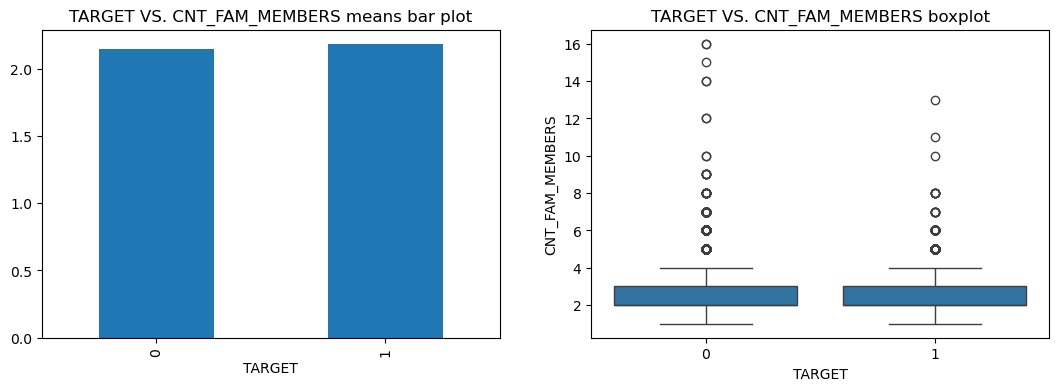

In [178]:
# Plotting the bar plot and boxplot of TARGET vs. CNT_FAM_MEMBERS values 
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
df2.groupby('TARGET')['CNT_FAM_MEMBERS'].mean().plot.bar()
plt.title("TARGET VS. CNT_FAM_MEMBERS means bar plot")
plt.subplot(1,2,2)
sns.boxplot(x=df2.TARGET, y=df2.CNT_FAM_MEMBERS)
plt.title("TARGET VS. CNT_FAM_MEMBERS boxplot")
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - From this graph we can see that there is negligible difference between defaulters and non-defaulters in terms of no. of family members, though non-defaulters seem to be having slightly more number of families members among outliers.
 
</div>

## Correcting Column Format along with Null Values Removal & Outlier Handling

#### 1. DAYS_LAST_PHONE_CHANGE

In [182]:
# Count of non-null values 
df2.DAYS_LAST_PHONE_CHANGE.describe().round(2)

count    307507.00
mean       -962.86
std         826.81
min       -4292.00
25%       -1570.00
50%        -757.00
75%        -274.00
max           0.00
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - DAYS_LAST_PHONE_CHANGE column is a numerical variable with 'float64' dtype and consists of discrete numerical values.
 - The column refers to the number of days before the application the client changed the phone number.
 - It has 307509 non-null values.
 - Its mean and median values are not close to each other. This indicates presence of outliers.
 - As the values seem to be days and accompanied by a negative sign, we need to correct the column format as well to extract non-negative data in years. 
 
</div>

In [184]:
# Calculating null values in the column
df2.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [185]:
# % of Null values
(df2.DAYS_LAST_PHONE_CHANGE.isnull().sum()/len(df2)*100).round(5)

0.00033

In [186]:
# Calculating value counts of the variable
df2.DAYS_LAST_PHONE_CHANGE.value_counts().head()

DAYS_LAST_PHONE_CHANGE
 0.0    37672
-1.0     2812
-2.0     2318
-3.0     1763
-4.0     1285
Name: count, dtype: int64

In [187]:
# Correcting column format for DAYS_LAST_PHONE_CHANGE by removing negative sign and getting absolute value of the data
df2.DAYS_LAST_PHONE_CHANGE = df2.DAYS_LAST_PHONE_CHANGE.abs()

In [188]:
# Checking value counts after getting absolute values
(df2.DAYS_LAST_PHONE_CHANGE.value_counts(normalize=True)*100).head()

DAYS_LAST_PHONE_CHANGE
0.0    12.250778
1.0     0.914451
2.0     0.753804
3.0     0.573320
4.0     0.417877
Name: proportion, dtype: float64

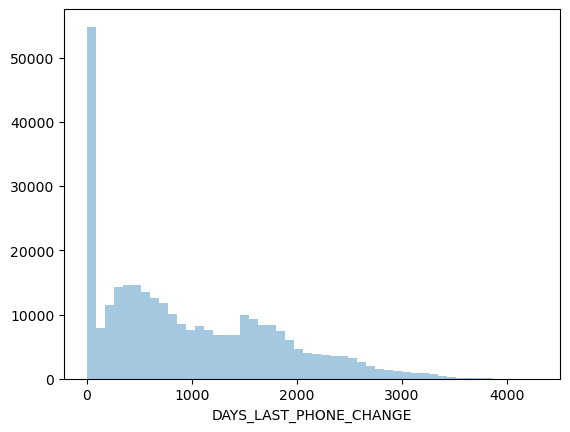

In [189]:
# Variable distribution through histogram for DAYS_LAST_PHONE_CHANGE
sns.distplot(df2.DAYS_LAST_PHONE_CHANGE, kde=False)
plt.show()

In [190]:
# Converting DAYS_LAST_PHONE_CHANGE to years from days
df2['YEARS_LAST_PHONE_CHANGE'] = np.round(df2.DAYS_LAST_PHONE_CHANGE/365,2)

In [191]:
# Calculating value counts of the column
df2.YEARS_LAST_PHONE_CHANGE.value_counts().head()

YEARS_LAST_PHONE_CHANGE
0.00    40484
0.01     6190
0.02     1455
0.96      772
1.30      738
Name: count, dtype: int64

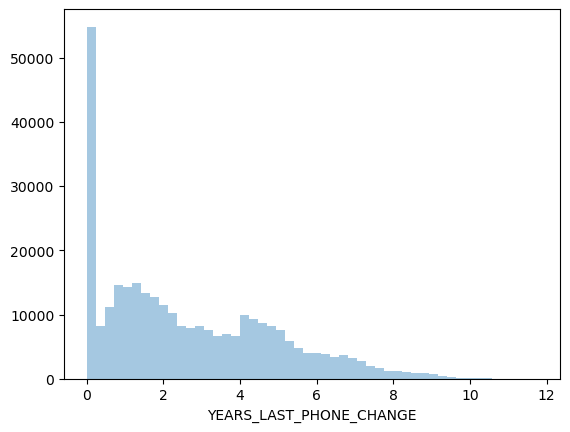

In [192]:
# Variable distribution through histogram for YEARS_LAST_PHONE_CHANGE
sns.distplot(df2.YEARS_LAST_PHONE_CHANGE, kde=False)
plt.show()

<div class="alert alert-block alert-info">
<B>Insight</B>
    
 - Here data is markedly skewed to left with maximum clients having 0.0 value for YEARS_LAST_PHONE_CHANGE. 
</div>

In [194]:
# Checking dataframe for addition of the YEARS_LAST_PHONE_CHANGE column
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [195]:
# Imputing null values with column median for YEARS_LAST_PHONE_CHANGE 
df2.YEARS_LAST_PHONE_CHANGE.fillna(df2.YEARS_LAST_PHONE_CHANGE.median(), inplace=True)
df2.YEARS_LAST_PHONE_CHANGE.isnull().sum()

0

In [196]:
# Dropping DAYS_LAST_PHONE_CHANGE from df2
df2.drop('DAYS_LAST_PHONE_CHANGE', axis=1, inplace=True)
df2.shape

(307508, 66)

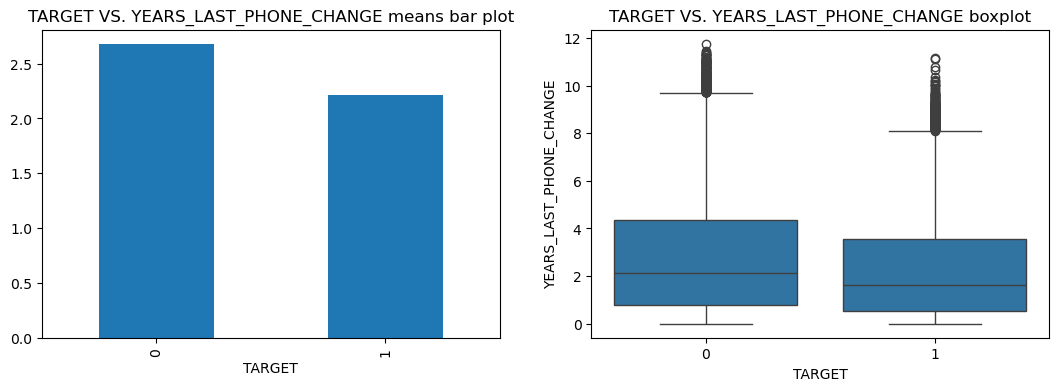

In [197]:
# Plotting the bar plot and boxplot of TARGET vs. YEARS_LAST_PHONE_CHANGE values 
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
df2.groupby('TARGET')['YEARS_LAST_PHONE_CHANGE'].mean().plot.bar()
plt.title("TARGET VS. YEARS_LAST_PHONE_CHANGE means bar plot")
plt.subplot(1,2,2)
sns.boxplot(x=df2.TARGET, y=df2.YEARS_LAST_PHONE_CHANGE)
plt.title("TARGET VS. YEARS_LAST_PHONE_CHANGE boxplot")
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - From above graphs we can see defaulters seem to have changed their phones more recently than non-defaulters before application. Thus, clients who have had the same phone for a period longer than 2.5 years would have lesser probability of default than those who have changed their phones earlier than that period.
 - More scrutiny should be done for customers who have had changed their phone only 6 months or lesser before the applying for the loan. 
 
</div>

In [199]:
# Checking for missing values - **ALL MISSING VALUES HAVE BEEN REMOVED**
df2.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

#### 2. DAYS_BIRTH

In [201]:
# Count of non-null values 
df2.DAYS_BIRTH.describe().round(2)

count    307508.00
mean     -16037.05
std        4363.98
min      -25229.00
25%      -19682.00
50%      -15750.00
75%      -12413.00
max       -7489.00
Name: DAYS_BIRTH, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - DAYS_BIRTH column is a numerical variable with 'float64' dtype.
 - The column refers to the client's age in days at the time of application.
 - It has 307508 non-null values.
 - Its mean and median values are not very far from each other. 
 - As the values seem to be in days and accompanied by a negative sign, we need to correct the column format as well to extract non-negative data in years. 
 
</div>

In [203]:
# Calculating null values in the column
df2.DAYS_BIRTH.isnull().sum()

0

In [204]:
# Calculating value counts of the column
df2.DAYS_BIRTH.value_counts().head()

DAYS_BIRTH
-13749    43
-13481    42
-10020    41
-18248    41
-15771    40
Name: count, dtype: int64

In [205]:
# Correcting column format for DAYS_BIRTH by removing negative sign and getting absolute value of the data
df2.DAYS_BIRTH = df2.DAYS_BIRTH.abs()

In [206]:
# Checking value counts after getting absolute values
(df2.DAYS_BIRTH.value_counts(normalize=True)*100).head()

DAYS_BIRTH
13749    0.013983
13481    0.013658
10020    0.013333
18248    0.013333
15771    0.013008
Name: proportion, dtype: float64

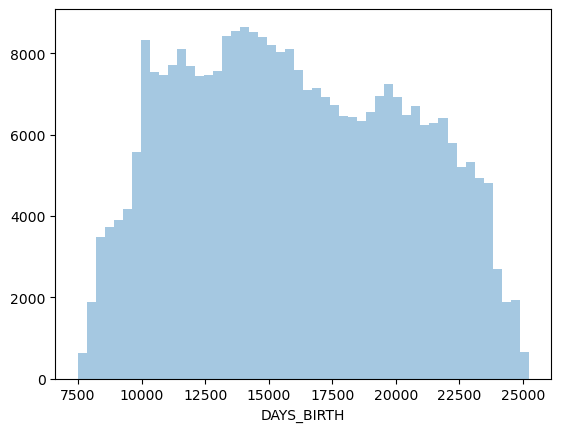

In [207]:
# Variable distribution through histogram for DAYS_BIRTH
sns.distplot(df2.DAYS_BIRTH, kde=False)
plt.show()

In [208]:
# Converting DAYS_BIRTH to years from days
df2['AGE_YEARS'] = np.round(df2.DAYS_BIRTH/365,2)

In [209]:
# Calculating value counts of the column
df2.AGE_YEARS.value_counts().head()

AGE_YEARS
36.79    129
37.35    125
38.68    125
27.45    125
36.93    125
Name: count, dtype: int64

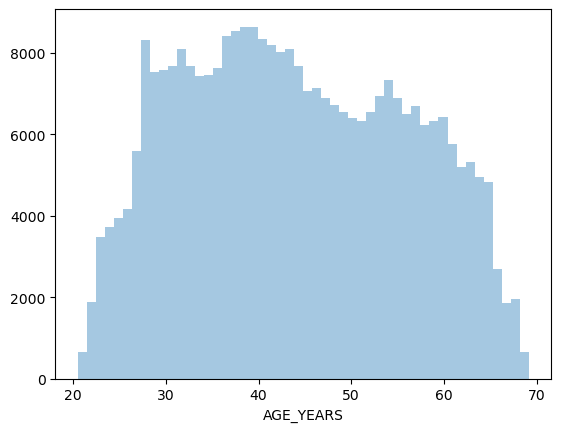

In [210]:
# Variable distribution through histogram for AGE_YEARS
sns.distplot(df2.AGE_YEARS, kde=False)
plt.show()

<div class="alert alert-block alert-info">
<B>Insight</B>
    
 - Here data is only slighty skewed to left with almost equal representation of all age groups ranging from 20 yrs to 70 yrs. 
</div>

In [212]:
# Checking dataframe for addition of the AGE_YEARS column
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461           -637            -3648.0   
1                    0.003541       16765          -1188            -1186.0   
2                    0.010032       19046           -225            -4260.0   
3                    0.008019       19005          -3039            -9833.0   
4                    0.028663       19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [213]:
# Dropping DAYS_BIRTH from df2
df2.drop('DAYS_BIRTH', axis=1, inplace=True)
df2.shape

(307508, 66)

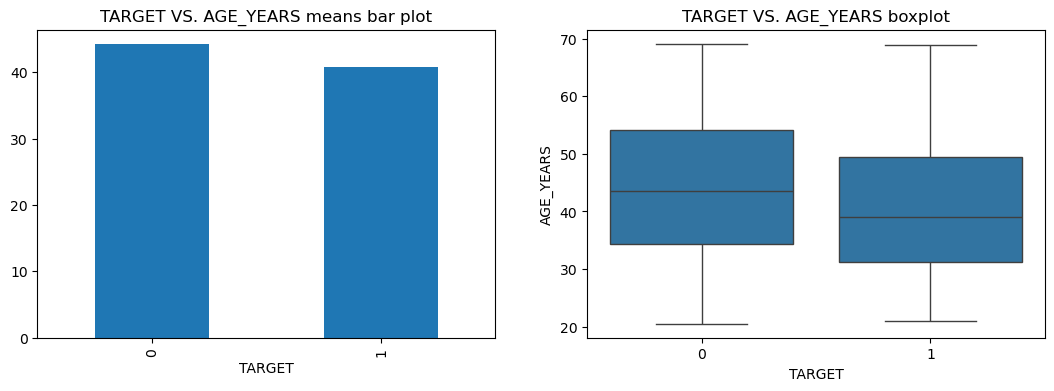

In [214]:
# Plotting the bar plot and boxplot of TARGET vs. AGE_YEARS values 
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
df2.groupby('TARGET')['AGE_YEARS'].mean().plot.bar()
plt.title("TARGET VS. AGE_YEARS means bar plot")
plt.subplot(1,2,2)
sns.boxplot(x=df2.TARGET, y=df2.AGE_YEARS)
plt.title("TARGET VS. AGE_YEARS boxplot")
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - From above graphs we can see that, on average, defaulters (40 yrs) seem to be younger in age than non-defaulters (44 yrs) at the time of application. 
 - More scrutiny should be done for customers who are 35 yrs of age or younger at the time of loan application. 
 
</div>

#### 3. DAYS_EMPLOYED

In [217]:
# Count of non-null values 
df2.DAYS_EMPLOYED.describe().round(2)

count    307508.00
mean      63815.68
std      141276.31
min      -17912.00
25%       -2760.00
50%       -1213.00
75%        -289.00
max      365243.00
Name: DAYS_EMPLOYED, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - DAYS_EMPLOYED column is a numerical variable with 'float64' dtype.
 - The column refers to the client's work experience in days, with the current company, at the time of application.
 - It has 307508 non-null values.
 - Its mean and median values are quite far apart from each other and indicate presence of outliers.
 - Max value is about 60 times that of 75th percentile, which also indicates presence of outliers.
 - As the values seem to be in days and accompanied by a negative sign, we need to correct the column format as well to extract non-negative data in years. 
 
</div>

In [219]:
# Calculating value counts of the column
df2.DAYS_EMPLOYED.value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

In [220]:
# Correcting column format for DAYS_EMPLOYED by removing negative sign and getting absolute value of the data
df2.DAYS_EMPLOYED = df2.DAYS_EMPLOYED.abs()

In [221]:
# Checking value counts after getting absolute values
(df2.DAYS_EMPLOYED.value_counts(normalize=True)*100).head()

DAYS_EMPLOYED
365243    18.007336
200        0.050730
224        0.049430
230        0.049104
199        0.049104
Name: proportion, dtype: float64

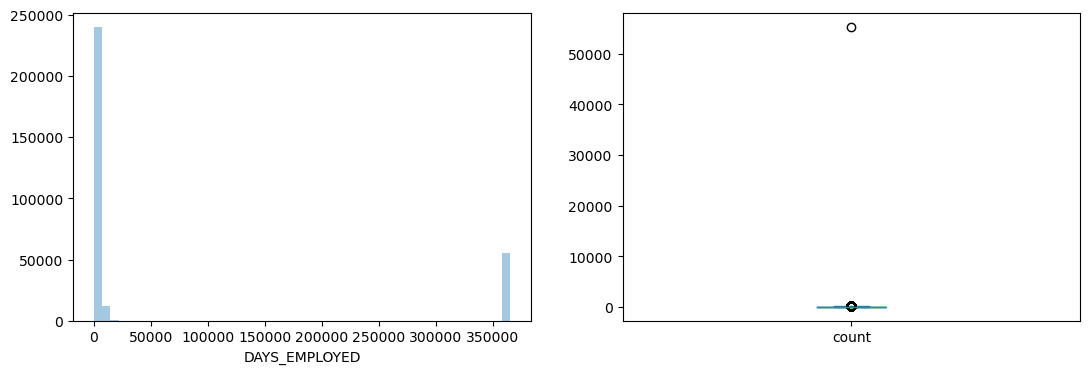

In [222]:
# Variable distribution through histogram and boxplot for DAYS_EMPLOYED
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.distplot(df2.DAYS_EMPLOYED, kde=False)
plt.subplot(1,2,2)
df2.DAYS_EMPLOYED.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<B>Insight</B>
    
 - As we can see from the value counts analysis and the histogram above, data is completely skewed due to '365243' values which represent about 18% of the DAYS_EMPLOYED data.
 - It does not look like a normal DAYS_EMPLOYED data, butt seems to be a code for missing data
 - 
As it is the most frequently occuring datafield, it does not make sense to replace it with other values without making provision for keeping this data in the df. It may be used for analysis late
 - .
We can create another column DAYS_EMPLOYED_365243 for accomodating this data and simultaneously replacing the space in the original column with np.NaN
</div>

In [224]:
# Feature engineering new column 'DAYS_EMPLOYED_365243' where rows with 365243 are denoted by 1 and others by 0
df2['DAYS_EMPLOYED_365243'] = np.where(df2.DAYS_EMPLOYED == 365243, 1, 0)

In [225]:
# Checking value_counts to check if data has transferred to the new column successfully
df2['DAYS_EMPLOYED_365243'].value_counts()

DAYS_EMPLOYED_365243
0    252134
1     55374
Name: count, dtype: int64

In [226]:
# Replacing cells with '365243' value with np.Nan in df2
df2.loc[df2.DAYS_EMPLOYED==365243,'DAYS_EMPLOYED'] = np.NaN

In [227]:
# Describing the column to check how the data is looking after NaN replacement
df2.DAYS_EMPLOYED.describe()

count    252134.000000
mean       2384.179186
std        2338.371771
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

<Axes: >

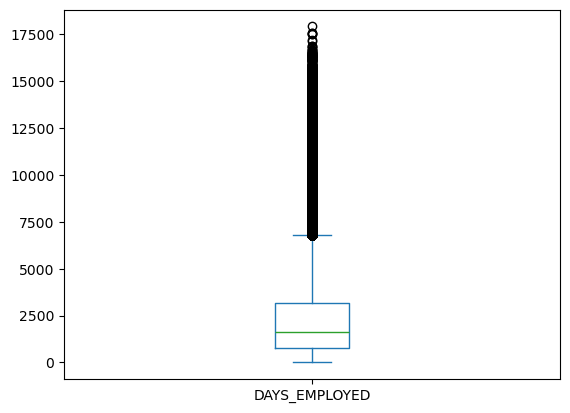

In [228]:
# Rechecking for outliers after removing '365243' values from DAYS_EMPLOYED
df2['DAYS_EMPLOYED'].plot.box()

<div class="alert alert-block alert-info">
<B>Insight</B>
    
 - The outliers are still there but they are present in a continuous manner till the max value
</div>

In [230]:
# Converting DAYS_EMPLOYED to years from days
df2['YEARS_EMPLOYED'] = np.round(df2.DAYS_EMPLOYED/365,2)

In [231]:
# Checking the dataframe to see if YEARS_EMPLOYED column has been added 
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          637.0            -3648.0   
1                    0.003541         1188.0            -1186.0   
2                    0.010032          225.0            -4260.0   
3                    0.008019         3039.0            -9833.0   
4                    0.028663         3038.0            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                        

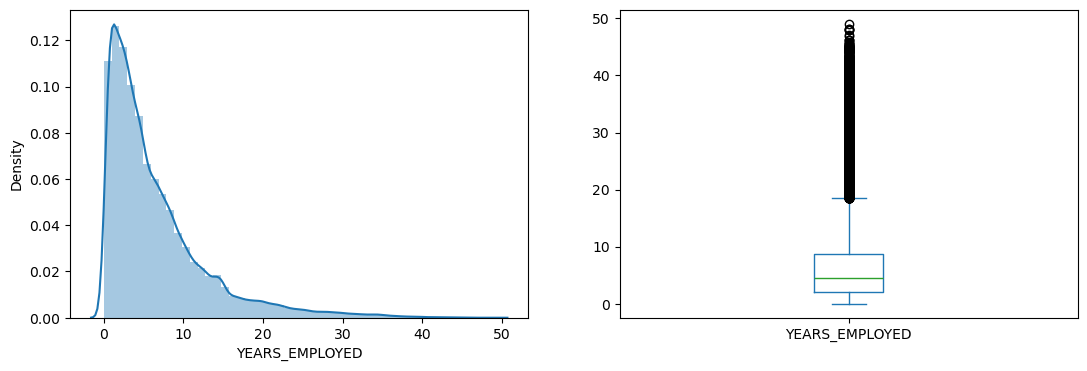

In [232]:
# Rechecking for outliers after converting to YEARS_EMPLOYED
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.distplot(df2.YEARS_EMPLOYED)
plt.subplot(1,2,2)
df2['YEARS_EMPLOYED'].plot.box()
plt.show()

<div class="alert alert-block alert-info">
<B>Insight</B>
    
 - The data distribution is heavily skewed to the left with along tail trailing towards right.
 - The tail comprises of all the outliers.
</div>

In [234]:
#Calculating median for the variable
EMP_MED = df2.YEARS_EMPLOYED.median()
EMP_MED

4.52

In [235]:
#Replacing null values in YEARS_EMPLOYED with median values as the variable spread has outliers
df2.YEARS_EMPLOYED.fillna(EMP_MED, inplace=True)

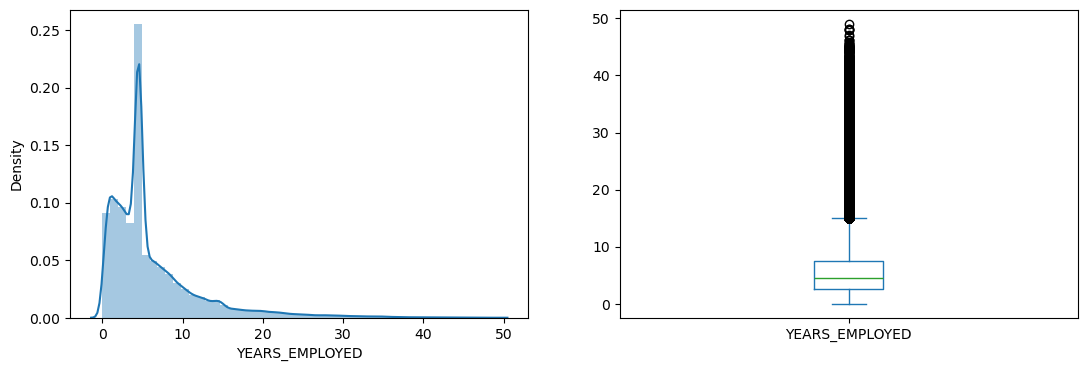

In [236]:
# Checking the distribution after null values replaced by median values
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.distplot(df2.YEARS_EMPLOYED)
plt.subplot(1,2,2)
df2['YEARS_EMPLOYED'].plot.box()
plt.show()

In [237]:
# Dropping DAYS_EMPLOYED from df2
df2.drop('DAYS_EMPLOYED', axis=1, inplace=True)
df2.shape

(307508, 67)

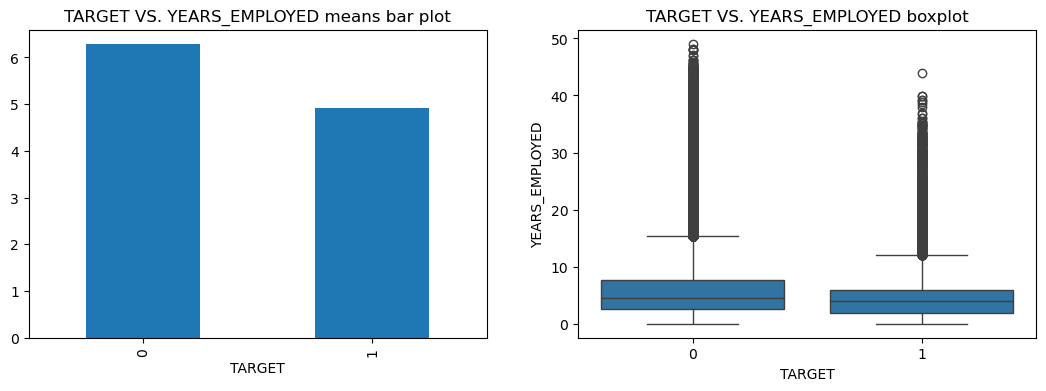

In [238]:
# Plotting the bar plot and boxplot of TARGET vs. YEARS_EMPLOYED values 
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
df2.groupby('TARGET')['YEARS_EMPLOYED'].mean().plot.bar()
plt.title("TARGET VS. YEARS_EMPLOYED means bar plot")
plt.subplot(1,2,2)
sns.boxplot(x=df2.TARGET, y=df2.YEARS_EMPLOYED)
plt.title("TARGET VS. YEARS_EMPLOYED boxplot")
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - From above graphs we can see that, on average, defaulters (4.9 yrs) seem to have been working for lesser period in their current job than non-defaulters (6+ yrs) at the time of application. 
 - More scrutiny should be done for customers who have been working for less than 3-5 yrs in their current job at the time of loan application. 
 
</div>

#### 4. DAYS_REGISTRATION

In [241]:
# Count of non-null values 
df2.DAYS_REGISTRATION.describe().round(2)

count    307508.00
mean      -4986.14
std        3522.90
min      -24672.00
25%       -7480.00
50%       -4504.00
75%       -2009.75
max           0.00
Name: DAYS_REGISTRATION, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - DAYS_REGISTRATION column is a numerical variable with 'float64' dtype.
 - The column refers to the no. of days before which the client changed his registration, at the time of application.
 - It has 307508 non-null values.
 - Its mean and median values are close to each other.
 - Min value and 25th percentile are quite far from each other and indicate presence of outliers.
 - As the values seem to be in days and accompanied by a negative sign, we need to correct the column format as well to extract non-negative data in years. 
 
</div>

In [243]:
# Calculating value counts of the column
df2.DAYS_REGISTRATION.value_counts().head()

DAYS_REGISTRATION
-1.0    113
-7.0     98
-6.0     96
-4.0     92
-2.0     92
Name: count, dtype: int64

In [244]:
# Correcting column format for DAYS_REGISTRATION by removing negative sign and getting absolute value of the data
df2.DAYS_REGISTRATION = df2.DAYS_REGISTRATION.abs()

In [245]:
# Checking value counts after getting absolute values
(df2.DAYS_REGISTRATION.value_counts(normalize=True)*100).head()

DAYS_REGISTRATION
1.0    0.036747
7.0    0.031869
6.0    0.031219
4.0    0.029918
2.0    0.029918
Name: proportion, dtype: float64

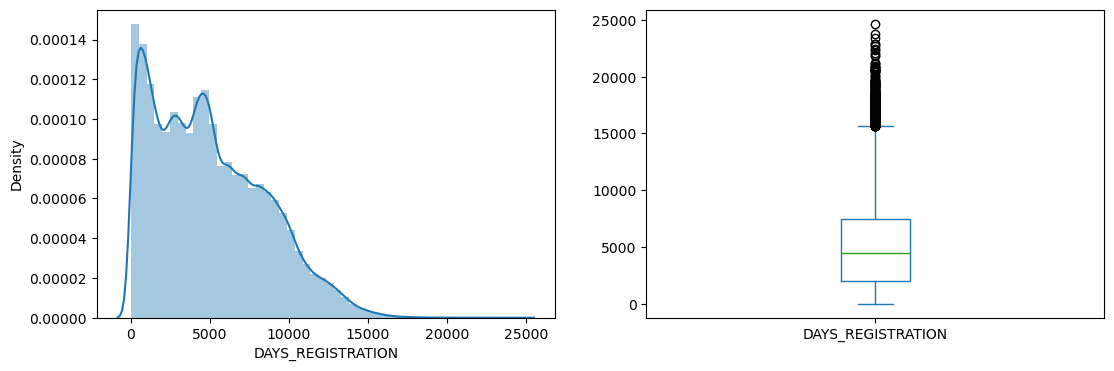

In [246]:
# Variable distribution through histogram and boxplot for DAYS_REGISTRATION
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.distplot(df2.DAYS_REGISTRATION)
plt.subplot(1,2,2)
df2.DAYS_REGISTRATION.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<B>Insight</B>
    
 - As we can see from the value counts analysis and the histogram above, data distribution is heavily skewed to the left side because of outliers.
</div>

In [248]:
# Converting DAYS_REGISTRATION to years from days
df2['YEARS_REGISTRATION'] = np.round(df2.DAYS_REGISTRATION/365,2)

In [249]:
# Checking the dataframe to see if YEARS_REGISTRATION column has been added 
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0                    0.018801             3648.0            -2120           1   
1                    0.003541             1186.0             -291           1   
2                    0.010032             4260.0            -2531           1   
3                    0.008019             9833.0            -2437           1   
4                    0.028663             4311.0            -3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0   

In [250]:
# Calculating value counts of the column
df2.YEARS_REGISTRATION.value_counts().head()

YEARS_REGISTRATION
0.01    354
0.02    343
0.04    252
0.05    238
1.07    213
Name: count, dtype: int64

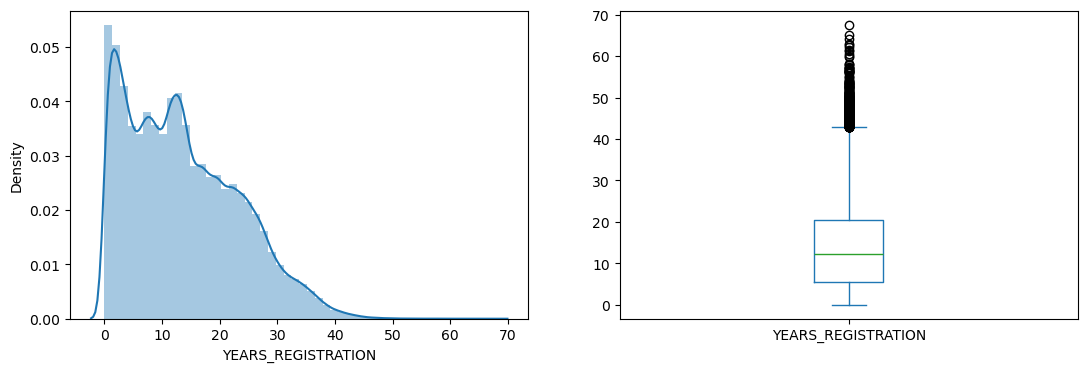

In [251]:
# Checking the distribution after conversion to YEARS_REGISTRATION
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.distplot(df2.YEARS_REGISTRATION)
plt.subplot(1,2,2)
df2['YEARS_REGISTRATION'].plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though YEARS_REGISTRATION column has outliers, most of the outliers are present in a continous manner.
 - To handle these outliers, we can consider capping the outliers to ensure extreme values are removed from the column while the valuable information is not lost.  
 
</div>

In [253]:
q1 = df2['YEARS_REGISTRATION'].describe()['25%']
q3 = df2['YEARS_REGISTRATION'].describe()['75%']
upper_bound_regis = q3 + 1.5*(q3-q1)
upper_bound_regis.round(2)

42.96

In [254]:
# Capping the outliers at upper_bound_regis
df2['YEARS_REGISTRATION'] = np.where(df2['YEARS_REGISTRATION']>upper_bound_regis,upper_bound_regis,df2['YEARS_REGISTRATION'])

In [255]:
# Rechecking for outliers beyond the upper_bound_regis after capping for outliers
df2[df2['YEARS_REGISTRATION']>upper_bound_regis]['YEARS_REGISTRATION']

Series([], Name: YEARS_REGISTRATION, dtype: float64)

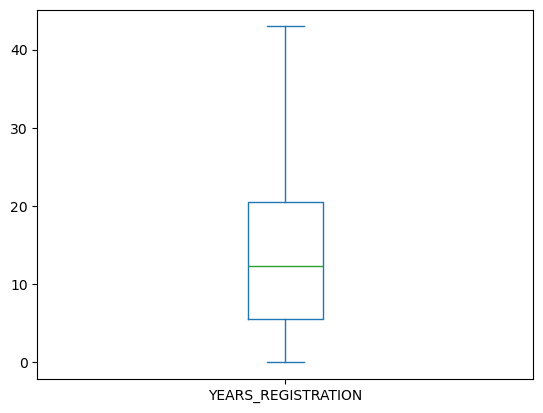

In [256]:
# Rechecking for outliers in YEARS_REGISTRATION through box plot
df2.YEARS_REGISTRATION.plot.box()
plt.show()

In [257]:
# Dropping DAYS_REGISTRATION from df2
df2.drop('DAYS_REGISTRATION', axis=1, inplace=True)
df2.shape

(307508, 67)

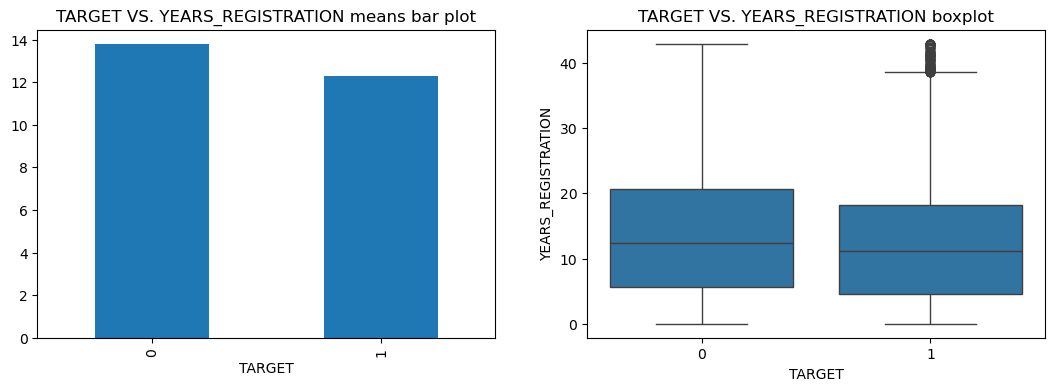

In [258]:
# Plotting the bar plot and boxplot of TARGET vs. YEARS_REGISTRATION values 
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
df2.groupby('TARGET')['YEARS_REGISTRATION'].mean().plot.bar()
plt.title("TARGET VS. YEARS_REGISTRATION means bar plot")
plt.subplot(1,2,2)
sns.boxplot(x=df2.TARGET, y=df2.YEARS_REGISTRATION)
plt.title("TARGET VS. YEARS_REGISTRATION boxplot")
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - From above graphs we can see that, on average, defaulters (12.2 yrs) seem to have changed their registration more recently as compared to the non-defaulters (13.7 yrs) at the time of application. 
 - More scrutiny should be done for customers who have changed their registration earlier than 7 yrs at the time of loan application. 
 
</div>

#### 5. DAYS_ID_PUBLISH

In [261]:
# Count of non-null values 
df2.DAYS_ID_PUBLISH.describe().round(2)

count    307508.00
mean      -2994.21
std        1509.45
min       -7197.00
25%       -4299.00
50%       -3254.00
75%       -1720.00
max           0.00
Name: DAYS_ID_PUBLISH, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - DAYS_ID_PUBLISH column is a numerical variable with 'float64' dtype.
 - The column refers to the no. of days before which the client changed his identity document used to apply for the loan, at the time of application.
 - It has 307508 non-null values.
 - Its mean and median values are close to each other.
 - As the values seem to be in days and accompanied by a negative sign, we need to correct the column format as well to extract non-negative data in years. 
 
</div>

In [263]:
# Calculating value counts of the column
df2.DAYS_ID_PUBLISH.value_counts().head()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: count, dtype: int64

In [264]:
# Correcting column format for DAYS_ID_PUBLISH by removing negative sign and getting absolute value of the data
df2.DAYS_ID_PUBLISH = df2.DAYS_ID_PUBLISH.abs()

In [265]:
# Checking value counts after getting absolute values
(df2.DAYS_ID_PUBLISH.value_counts(normalize=True)*100).head()

DAYS_ID_PUBLISH
4053    0.054958
4095    0.052682
4046    0.052356
4417    0.051706
4256    0.051381
Name: proportion, dtype: float64

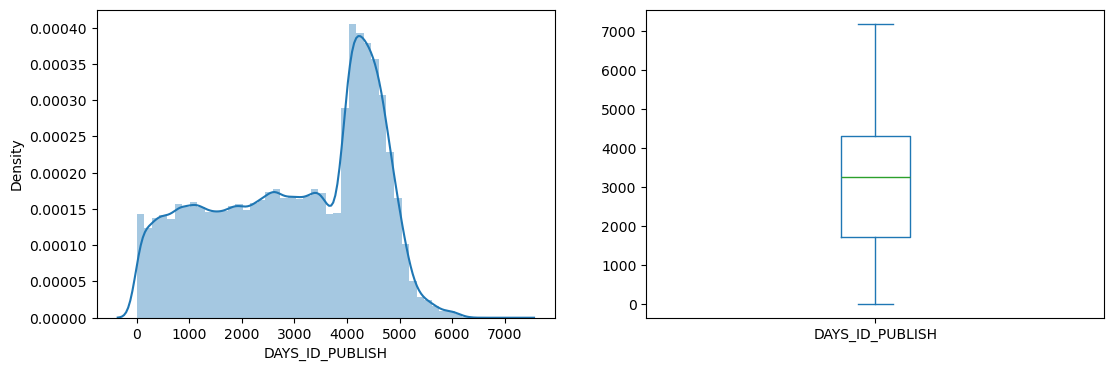

In [266]:
# Variable distribution through histogram and boxplot for DAYS_ID_PUBLISH
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.distplot(df2.DAYS_ID_PUBLISH)
plt.subplot(1,2,2)
df2.DAYS_ID_PUBLISH.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<B>Insight</B>
    
 - As we can see from the value counts analysis and the histogram above, data distribution is skewed to the right side because of outliers.
</div>

In [268]:
# Converting DAYS_ID_PUBLISH to years from days
df2['YEARS_ID_PUBLISH'] = np.round(df2.DAYS_ID_PUBLISH/365,2)

In [269]:
# Checking the dataframe to see if YEARS_ID_PUBLISH column has been added 
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0                    0.018801             2120           1               1   
1                    0.003541              291           1               1   
2                    0.010032             2531           1               1   
3                    0.008019             2437           1               1   
4                    0.028663             3458           1               1   

   FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                0                 1           1           0        Laborers   
1                0                 1           1           0      Core staff   
2                1                 1           1           0        Laborers   
3                0                 1           0           0        Laborers   
4                0                 1           0           0      Core staff   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                      

In [270]:
# Dropping DAYS_ID_PUBLISH from df2
df2.drop('DAYS_ID_PUBLISH', axis=1, inplace=True)
df2.shape

(307508, 67)

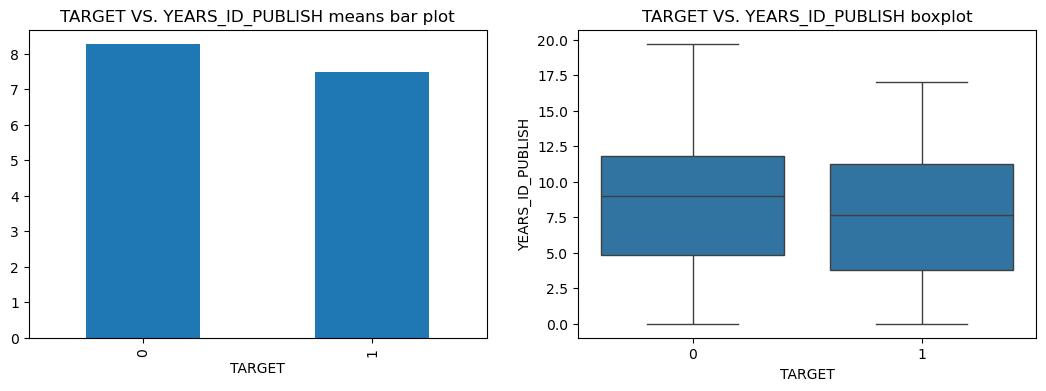

In [271]:
# Plotting the bar plot and boxplot of TARGET vs. YEARS_ID_PUBLISH values 
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
df2.groupby('TARGET')['YEARS_ID_PUBLISH'].mean().plot.bar()
plt.title("TARGET VS. YEARS_ID_PUBLISH means bar plot")
plt.subplot(1,2,2)
sns.boxplot(x=df2.TARGET, y=df2.YEARS_ID_PUBLISH)
plt.title("TARGET VS. YEARS_ID_PUBLISH boxplot")
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - From above graphs we can see that, on average, defaulters (7.5 yrs) seem to have changed their identity document more recently as compared to the non-defaulters (8.26 yrs) at the time of application. 
 - More scrutiny should be done for customers who have changed their registration earlier than 7 yrs at the time of loan application. 
 
</div>

## Univariate Analysis of Categorical Variables

### 1. CODE_GENDER

In [275]:
# Count of non-null values 
df2.CODE_GENDER.describe()

count     307508
unique         3
top            F
freq      202446
Name: CODE_GENDER, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - CODE_GENDER column is a categorical variable with 'object' dtype.
 - The column refers to the gender of the client in terms of male or female.
 - It has 307508 non-null values.
 - It has 3 unique values.
 - Its most frequently occuring category is F (Female) at a frequency of 202446.
</div>

In [277]:
# Calculating value counts of the column
df2.CODE_GENDER.value_counts()

CODE_GENDER
F      202446
M      105058
XNA         4
Name: count, dtype: int64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though this column does not have explicit missing values, CODE_GENDER column has 3 categories of unique values: F, M and XNA
 - XNA seems to be a code for Not Available
 - As CODE_GENDER is a categorical column, we can replace these XNA values with the column mode: F (Female)
</div>

In [279]:
# Replacing cells with 'XNA' value with F in CODE_GENDER
df2.loc[df2.CODE_GENDER=='XNA','CODE_GENDER'] = 'F'

In [280]:
# Checking if XNA values have been replaced by F successfully
df2.CODE_GENDER.value_counts()

CODE_GENDER
F    202450
M    105058
Name: count, dtype: int64

In [281]:
# Converting value counts into percentages
df2.CODE_GENDER.value_counts(normalize=True)*100

CODE_GENDER
F    65.835686
M    34.164314
Name: proportion, dtype: float64

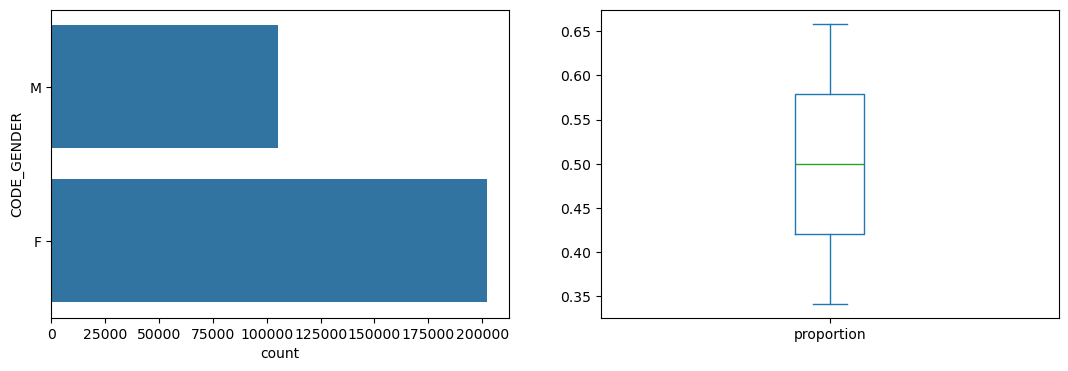

In [282]:
# Variable distribution through countplot and boxplot for CODE_GENDER
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.countplot(df2.CODE_GENDER)
plt.subplot(1,2,2)
df2.CODE_GENDER.value_counts(normalize=True).plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - It can be clearly seen that females make up 65.8% of the clients included in the analysis while the males are at 34.16%.
 - This shows that the data insights will pertain more to the females as compared to males.
 - To draw unbiased insights, it is important to have equal representation of both genders in the sample so this data may be called imbalanced. 
</div>

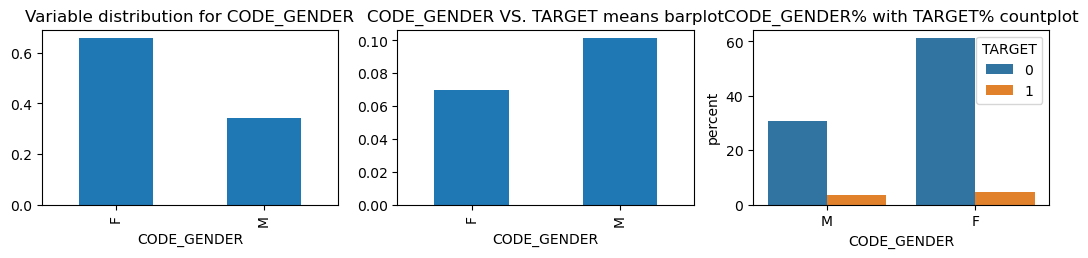

In [284]:
# Plotting the bar plot and countplot of TARGET vs. CODE_GENDER values 
plt.figure(figsize=(13,5))
plt.subplot(2,3,1)
df2.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.title('Variable distribution for CODE_GENDER')
plt.subplot(2,3,2)
df2.groupby(['CODE_GENDER'])['TARGET'].mean().sort_values().plot.bar()
plt.title('CODE_GENDER VS. TARGET means barplot')
plt.subplot(2,3,3)
sns.countplot(x = df2.CODE_GENDER, hue=df2.TARGET, stat="percent")
plt.title('CODE_GENDER% with TARGET% countplot')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though Females are in majority in the dataset (first graph), they seem to default much less on loan repayment, on average, than males (second and third graph).
</div>

### 2. NAME_EDUCATION_TYPE

In [287]:
# Count of non-null values 
df2.NAME_EDUCATION_TYPE.describe()

count                            307508
unique                                5
top       Secondary / secondary special
freq                             218390
Name: NAME_EDUCATION_TYPE, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - NAME_EDUCATION_TYPE column is a categorical variable with 'object' dtype.
 - The column refers to level of highest education the client has received.
 - It has 307508 non-null values.
 - It has 5 unique values.
 - Its most frequently occuring category is 'Secondary / secondary special' at a frequency of 218390.
</div>

In [289]:
# Calculating value counts of the column
df2.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218390
Higher education                  74861
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [290]:
# Converting value counts into percentages
df2.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

NAME_EDUCATION_TYPE
Secondary / secondary special    71.019291
Higher education                 24.344407
Incomplete higher                 3.342027
Lower secondary                   1.240943
Academic degree                   0.053332
Name: proportion, dtype: float64

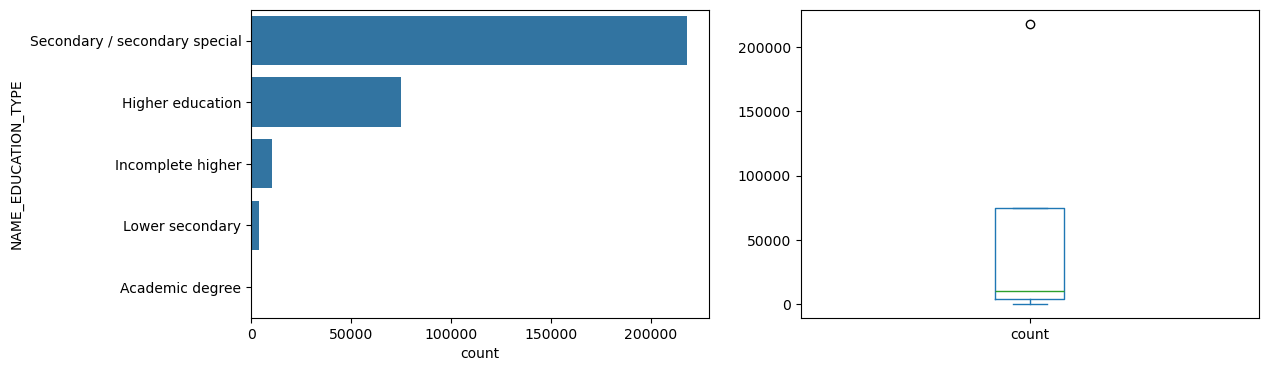

In [291]:
# Variable distribution through countplot and boxplot for NAME_EDUCATION_TYPE
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.countplot(df2.NAME_EDUCATION_TYPE)
plt.subplot(1,2,2)
df2.NAME_EDUCATION_TYPE.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Majority of the clients in the dataset have achieved 'Secondary / secondary special' education at 71%.
 - About 24.3% have completed 'Higher education'. 
 - A minority of the clients have completed 'Incomplete higher'(3.34%) and '
Lower secondar' ( 1.2%).
 - Least number of clients have achieved '
Academic degreas their highest level of education at 0.05%.
 - The large number of clients with 'Secondary / secondary special' education is leading to skewed data  (second graph).
.
</div>

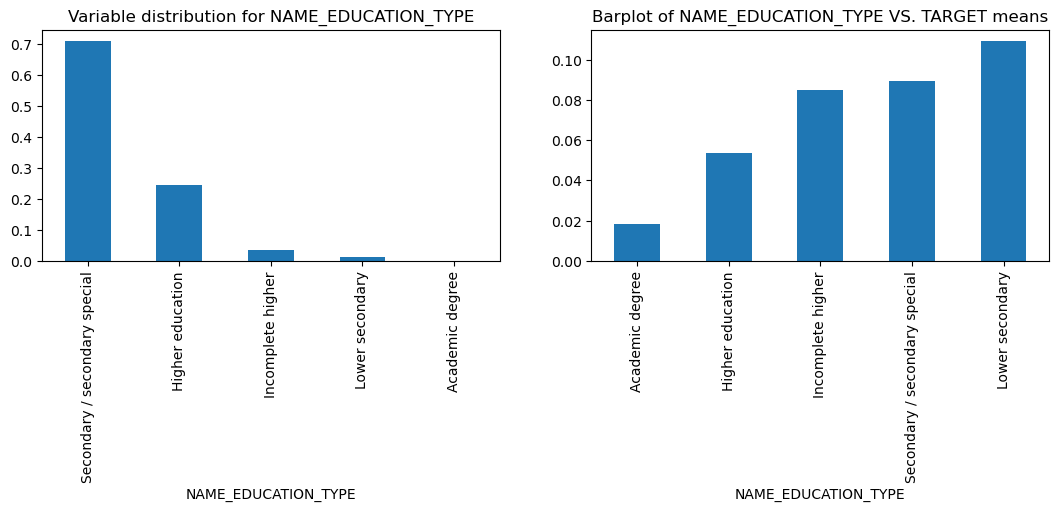

In [293]:
# Plotting the bar plot and countplot of TARGET vs. NAME_EDUCATION_TYPE values 
plt.figure(figsize=(13,3))
plt.subplot(1,2,1)
df2.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Variable distribution for NAME_EDUCATION_TYPE')
plt.subplot(1,2,2)
df2.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].mean().sort_values().plot.bar()
plt.title('Barplot of NAME_EDUCATION_TYPE VS. TARGET means')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though clients with 'Lower secondary' level education form 1.24% of the dataset (first graph), they are the highest defaulters, as compared to the clients with other education levels (second graph).
 - The clients with 'Academic degree' education have defaulted the least among the clients with other education levels, though they form the smallest sample in the dataset.
 - In general, the trend seems to be that higher the level of education of the client, the less is the probability of default.
 - This may also be due to the fact that higher the education, the higher the possibility of a job with high income and vice versa.
 - So the loan company can focus on clients with higher education levels while giving loans. Also they can conduct more scrutiny of clients with lower education levels.
</div>

### 3. NAME_FAMILY_STATUS

In [296]:
# Count of non-null values 
df2.NAME_FAMILY_STATUS.describe()

count      307508
unique          6
top       Married
freq       196432
Name: NAME_FAMILY_STATUS, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - NAME_FAMILY_STATUS column is a categorical variable with 'object' dtype.
 - The column refers to the marital status of the client's family.
 - It has 307508 non-null values.
 - It has 6 unique values.
 - Its most frequently occuring category is Married at a frequency of 196432.
</div>

In [298]:
# Calculating value counts of the column
df2.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45441
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though this column does not have explicit missing values, NAME_FAMILY_STATUS column has a category of 'Unknown'.
 - As NAME_FAMILY_STATUS is a categorical column, we can replace these 'Unknown' values with the column mode: 'Married'
</div>

In [300]:
# Replacing cells with 'Unknown' value with 'Married' in NAME_FAMILY_STATUS
df2.loc[df2.NAME_FAMILY_STATUS=='Unknown','NAME_FAMILY_STATUS'] = 'Married'

In [301]:
# Checking if 'Unknown' values have been replaced by 'Married' successfully
df2.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45441
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

In [302]:
# Converting value counts into percentages
df2.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

NAME_FAMILY_STATUS
Married                 63.879314
Single / not married    14.777177
Civil marriage           9.682675
Separated                6.429101
Widow                    5.231734
Name: proportion, dtype: float64

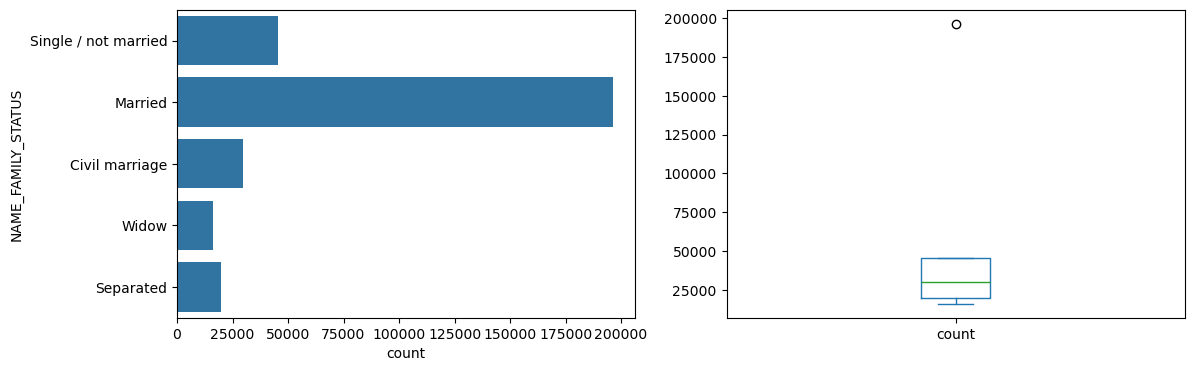

In [303]:
# Variable distribution through countplot and boxplot for NAME_FAMILY_STATUS
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.countplot(df2.NAME_FAMILY_STATUS)
plt.subplot(1,2,2)
df2.NAME_FAMILY_STATUS.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Majority of the clients in the dataset are 'Married' at 63.88%.
 - About 14.78% are 'Single / not married'. 
 - A minority of the clients are of status 'Civil marriage'(9.68%) and 'Separated' (6.43%).
 - Least number of clients are of 'Widow' status at 5.23%.
 - The large number of clients with 'Married' status is leading to skewed data (second graph).
</div>

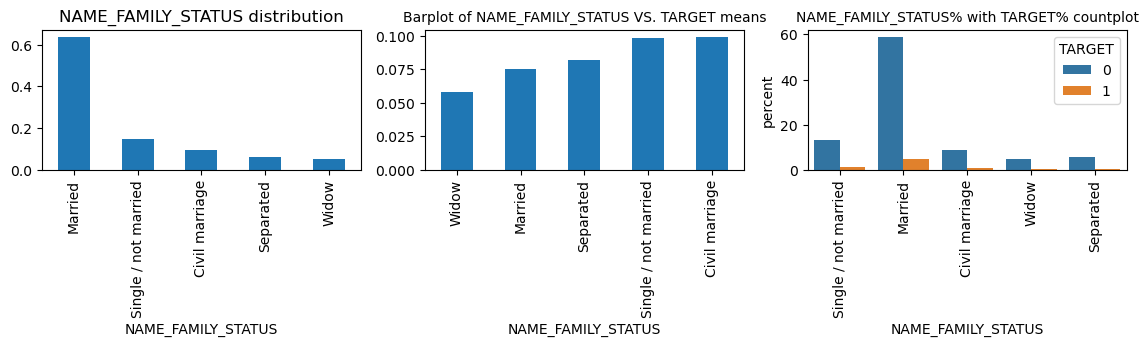

In [305]:
# Plotting the bar plot and countplot of TARGET vs. NAME_FAMILY_STATUS values 
plt.figure(figsize=(14,4))
plt.subplot(2,3,1)
df2.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title('NAME_FAMILY_STATUS distribution')
plt.subplot(2,3,2)
df2.groupby(['NAME_FAMILY_STATUS'])['TARGET'].mean().sort_values().plot.bar()
plt.title('Barplot of NAME_FAMILY_STATUS VS. TARGET means', fontsize=10)
plt.subplot(2,3,3)
sns.countplot(x = df2.NAME_FAMILY_STATUS, hue=df2.TARGET, stat="percent")
plt.title('NAME_FAMILY_STATUS% with TARGET% countplot', fontsize=10)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though clients with 'Civil marriage' status form 9.68% of the dataset (first graph), they are the highest defaulters, as compared to the clients with other marital statuses (second and third graphs).
 - The clients with 'Widow' status have defaulted the least, though they form the smallest sample in the dataset.
 - Though the 'Married' clients form the largest category of the dataset, they are also among the clients who have defaulted lesser than the other categories.
 - In general, the trend seems to be that married and widowed clients have less probability of default than those with 'Civil marriage', 'Single/ not married' and 'Separated' status.
 - So the loan company should focus more on clients with married and widowed status while giving loans. Also they can conduct more scrutiny of clients having a Civil marriage status, or those who are Single / Separated.
</div>

### 4. FLAG_OWN_CAR

In [308]:
# Count of non-null values 
df2.FLAG_OWN_CAR.describe()

count     307508
unique         2
top            N
freq      202921
Name: FLAG_OWN_CAR, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - FLAG_OWN_CAR column is a categorical variable with 'object' dtype.
 - The column answers the questions whether the client owns a car or not.
 - It has 307508 non-null values.
 - It has 2 unique values.
 - Its most frequently occuring category is 'N' at a frequency of 202921.
</div>

In [310]:
# Calculating value counts of the column
df2.FLAG_OWN_CAR.value_counts()

FLAG_OWN_CAR
N    202921
Y    104587
Name: count, dtype: int64

In [311]:
# Converting value counts into percentages
df2.FLAG_OWN_CAR.value_counts(normalize=True)*100

FLAG_OWN_CAR
N    65.988852
Y    34.011148
Name: proportion, dtype: float64

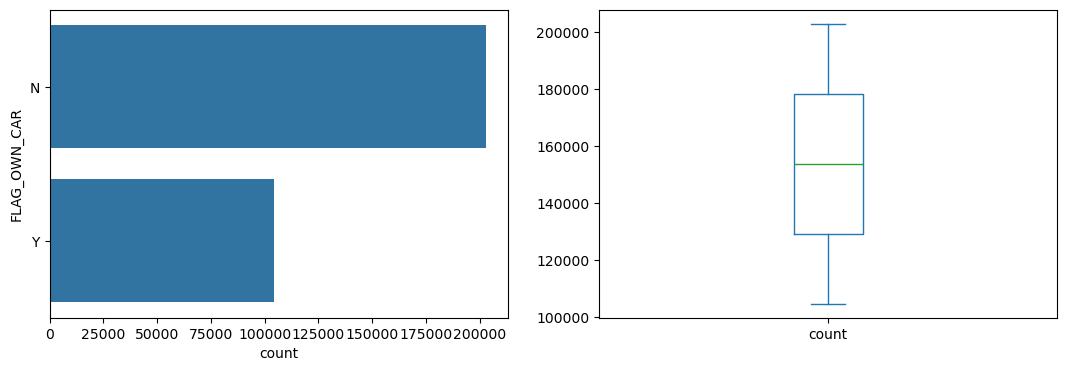

In [312]:
# Variable distribution through countplot and boxplot for FLAG_OWN_CAR
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.countplot(df2.FLAG_OWN_CAR)
plt.subplot(1,2,2)
df2.FLAG_OWN_CAR.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Majority of the clients (65.98%) in the dataset do not own a car.
 - Only 34.01% of the clients own a car. 
</div>

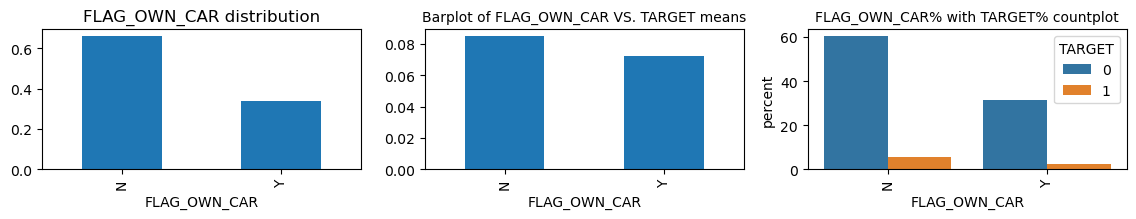

In [314]:
# Plotting the bar plot and countplot of TARGET vs. FLAG_OWN_CAR values 
plt.figure(figsize=(14,4))
plt.subplot(2,3,1)
df2.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar()
plt.title('FLAG_OWN_CAR distribution')
plt.subplot(2,3,2)
df2.groupby(['FLAG_OWN_CAR'])['TARGET'].mean().plot.bar()
plt.title('Barplot of FLAG_OWN_CAR VS. TARGET means', fontsize=10)
plt.subplot(2,3,3)
sns.countplot(x = df2.FLAG_OWN_CAR, hue=df2.TARGET, stat="percent")
plt.title('FLAG_OWN_CAR% with TARGET% countplot', fontsize=10)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Clients who do not own a car ('N') form 65.98% of the dataset (first graph) and they are the highest defaulters as well (second and third graphs).
 - The clients who do own a car ('Y') form the smaller sample in the dataset and have defaulted lesser than those own a car.
 - However, it should be noted that the difference between the defaulters and non-defaulters is not very high in this case.
</div>

### 5. FLAG_OWN_REALTY

In [317]:
# Count of non-null values 
df2.FLAG_OWN_REALTY.describe()

count     307508
unique         2
top            Y
freq      213309
Name: FLAG_OWN_REALTY, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - FLAG_OWN_REALTY column is a categorical variable with 'object' dtype.
 - The column answers the questions whether the client owns a realty or not.
 - It has 307508 non-null values.
 - It has 2 unique values.
 - Its most frequently occuring category is 'Y' at a frequency of 213309.
</div>

In [319]:
# Calculating value counts and the % of value counts of the column
pd.concat([df2.FLAG_OWN_REALTY.value_counts(), df2.FLAG_OWN_REALTY.value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1)

counts  normalized_counts
FLAG_OWN_REALTY                           
Y                213309          69.366976
N                 94199          30.633024

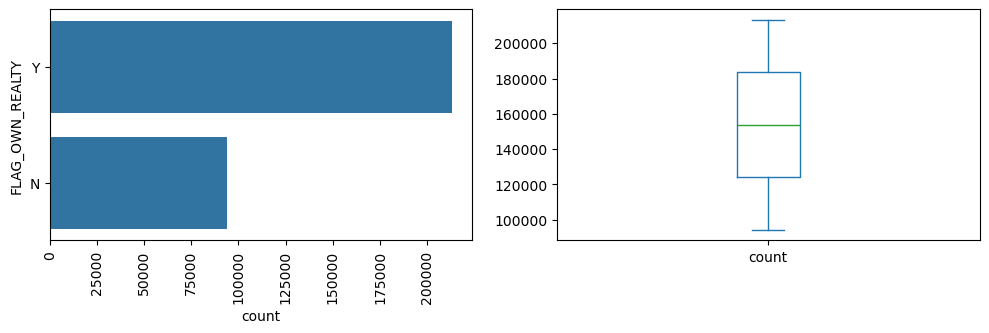

In [320]:
# Variable distribution through countplot and boxplot for FLAG_OWN_REALTY
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.countplot(df2.FLAG_OWN_REALTY)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
df2.FLAG_OWN_REALTY.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Majority of the clients (69.37%) in the dataset do own realty.
 - Only 30.63% of the clients do not own realty. 
</div>

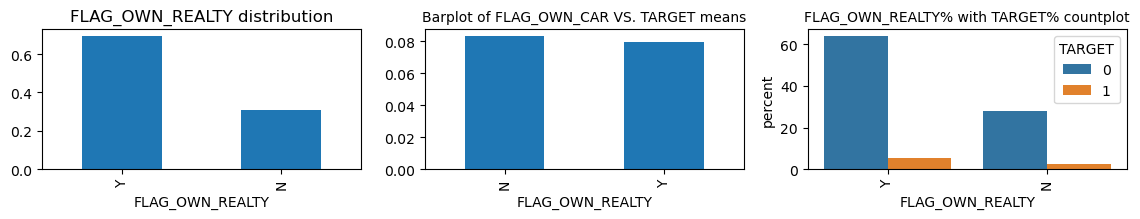

In [322]:
# Plotting the bar plot and countplot of TARGET vs. FLAG_OWN_REALTY values 
plt.figure(figsize=(14,4))
plt.subplot(2,3,1)
df2.FLAG_OWN_REALTY.value_counts(normalize=True).plot.bar()
plt.title('FLAG_OWN_REALTY distribution')
plt.subplot(2,3,2)
df2.groupby(['FLAG_OWN_REALTY'])['TARGET'].mean().plot.bar()
plt.title('Barplot of FLAG_OWN_CAR VS. TARGET means', fontsize=10)
plt.subplot(2,3,3)
sns.countplot(x = df2.FLAG_OWN_REALTY, hue=df2.TARGET, stat="percent")
plt.title('FLAG_OWN_REALTY% with TARGET% countplot', fontsize=10)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Clients who do own realty ('Y') form 69.37% of the dataset (first graph) and they are the higher defaulters as well (second and third graphs).
 - The clients who do not own realty ('N') form the smaller sample in the dataset and have defaulted lesser than those own realty.
 - However, it should be noted that the difference between the defaulters and non-defaulters is not significant and is minimal in this case.
</div>

### 6. NAME_HOUSING_TYPE

In [325]:
# Count of non-null values 
df2.NAME_HOUSING_TYPE.describe()

count                307508
unique                    6
top       House / apartment
freq                 272865
Name: NAME_HOUSING_TYPE, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - NAME_HOUSING_TYPE column is a categorical variable with 'object' dtype.
 - The column refers to the housing situation of the client.
 - It has 307508 non-null values.
 - It has 6 unique values.
 - Its most frequently occuring category is 'House / apartment' at a frequency of 272865.
</div>

In [327]:
# Calculating value counts and the % of value counts of the column
pd.concat([df2.NAME_HOUSING_TYPE.value_counts(), df2.NAME_HOUSING_TYPE.value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1)

counts  normalized_counts
NAME_HOUSING_TYPE                             
House / apartment    272865          88.734277
With parents          14840           4.825891
Municipal apartment   11183           3.636653
Rented apartment       4881           1.587276
Office apartment       2617           0.851035
Co-op apartment        1122           0.364869

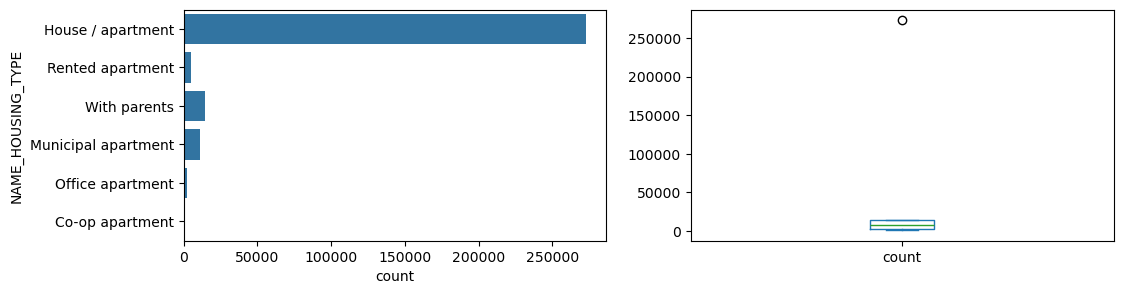

In [328]:
# Variable distribution through countplot and boxplot for NAME_HOUSING_TYPE
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.countplot(df2.NAME_HOUSING_TYPE)
plt.xticks(rotation=0)
plt.subplot(1,2,2)
df2.NAME_HOUSING_TYPE.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Majority of the clients (88.73%) in the dataset stay in a  'House / apartment'.
 - About 4.83% stay 'With parents' and 3.63% stay in a 'Municipal apartment'.
 - A small minority of clients stay in 'Rented apartment' (1.59%), 'Office apartment'	(0.85%) and 'Co-op apartment' (0.37%).
 - The large number of clients staying in 'House / apartment' is leading to skewed data (second graph).
</div>

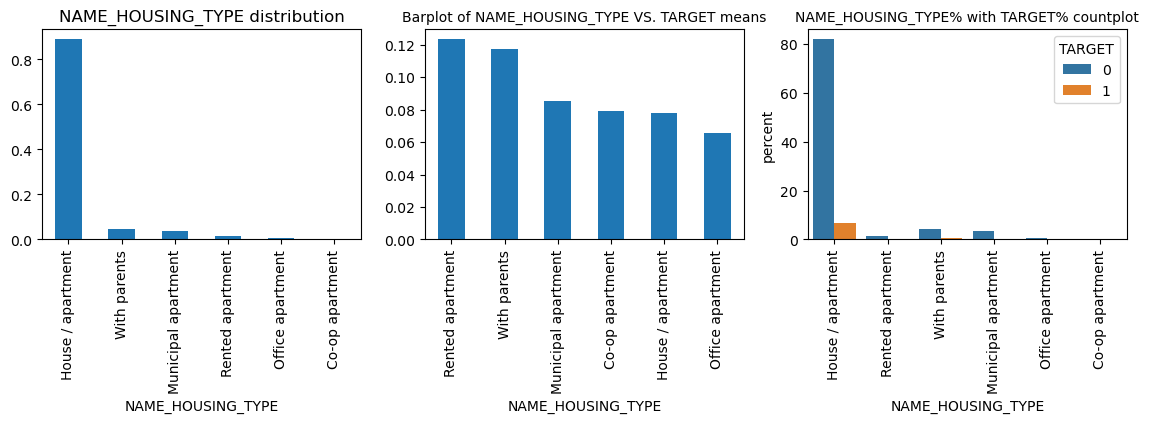

In [330]:
# Plotting the bar plot and countplot of TARGET vs. NAME_HOUSING_TYPE values 
plt.figure(figsize=(14,6))
plt.subplot(2,3,1)
df2.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar()
plt.title('NAME_HOUSING_TYPE distribution')
plt.subplot(2,3,2)
df2.groupby(['NAME_HOUSING_TYPE'])['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of NAME_HOUSING_TYPE VS. TARGET means', fontsize=10)
plt.subplot(2,3,3)
sns.countplot(x = df2.NAME_HOUSING_TYPE, hue=df2.TARGET, stat="percent")
plt.title('NAME_HOUSING_TYPE% with TARGET% countplot', fontsize=10)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Clients who stay in 'Rented apartment' form only 1.59% of the dataset (first graph), but they are the higher defaulters among clients with other housing situations (second and third graphs).
 - The clients who stay in a  'House / apartment' form the largest sample in the dataset (88.73%) but have defaulted much lesser than those with other housing situations.
 - Those who stay in 'Office apartment'	(0.85%) form one of the smallest segments of the sample, yet have defaulted the least.
 - The people who have to pay rent as well as loan installment may find it difficult to pay their installment at times, while the people who are staying with their parents may not be working in high paying jobs and may also find it difficult to pay their loan installment.
</div>

### 7. NAME_INCOME_TYPE

In [333]:
# Count of non-null values 
df2.NAME_INCOME_TYPE.describe()

count      307508
unique          8
top       Working
freq       158772
Name: NAME_INCOME_TYPE, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - NAME_INCOME_TYPE column is a categorical variable with 'object' dtype.
 - The column provides information about the source of the client's income.
 - It has 307508 non-null values.
 - It has 8 unique values.
 - Its most frequently occuring category is 'Working' at a frequency of 158772.
</div>

In [335]:
# Calculating value counts and the % of value counts of the column
pd.concat([df2.NAME_INCOME_TYPE.value_counts(), df2.NAME_INCOME_TYPE.value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1)

counts  normalized_counts
NAME_INCOME_TYPE                               
Working               158772          51.631827
Commercial associate   71617          23.289475
Pensioner              55362          18.003434
State servant          21702           7.057377
Unemployed                22           0.007154
Student                   18           0.005854
Businessman               10           0.003252
Maternity leave            5           0.001626

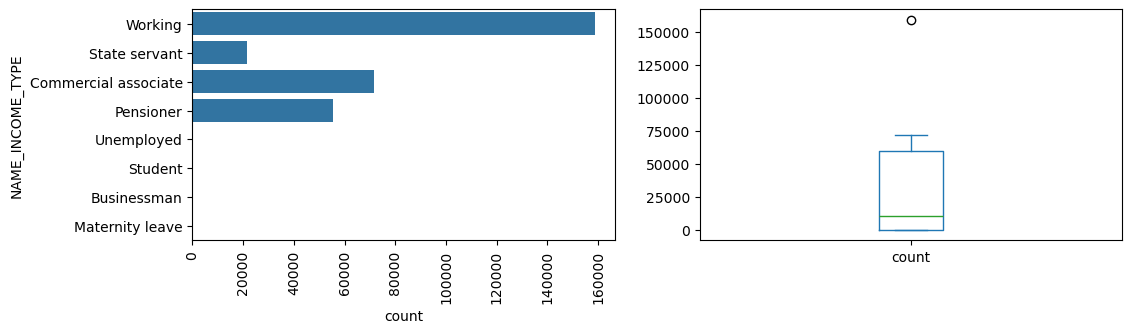

In [336]:
# Variable distribution through countplot and boxplot for NAME_INCOME_TYPE
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.countplot(df2.NAME_INCOME_TYPE)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
df2.NAME_INCOME_TYPE.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - For majority of the clients (51.63%) in the dataset, the source of their income is through 'Working'.
 - About 23.29% are working as 'Commercial associate', 18.00% are in the role of a 'Pensioner', while 7.06% are working as 'State servant'.
 - A small percentage of clients are either 'Unemployed' (0.007%), 'Student'	(0.006%), 'Businessman' (0.003%) or on 'Maternity leave' (0.002%).
 - The large number of clients in category 'Working' is leading to skewed data (second graph).
 - Also, while 92% of the dataset is distributed among the top 4 categories, the bottom 4 categories comprise of only about 8% of data. This is causing an imbalance in the dataset analysis. 
</div>

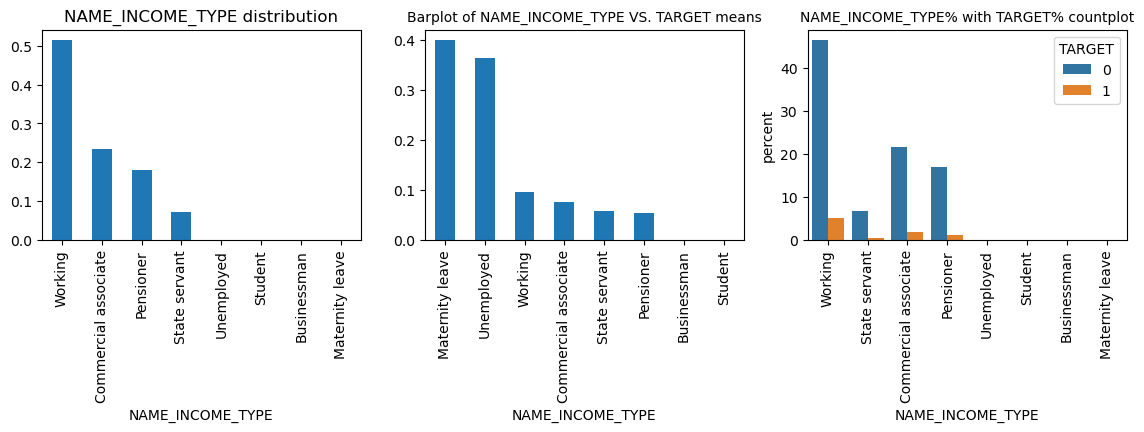

In [338]:
# Plotting the bar plot and countplot of TARGET vs. NAME_INCOME_TYPE values 
plt.figure(figsize=(14,6))
plt.subplot(2,3,1)
df2.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.title('NAME_INCOME_TYPE distribution')
plt.subplot(2,3,2)
df2.groupby(['NAME_INCOME_TYPE'])['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of NAME_INCOME_TYPE VS. TARGET means', fontsize=10)
plt.subplot(2,3,3)
sns.countplot(x = df2.NAME_INCOME_TYPE, hue=df2.TARGET, stat="percent")
plt.title('NAME_INCOME_TYPE% with TARGET% countplot', fontsize=10)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Clients who are on 'Maternity leave' form only 0.02% of the dataset (first graph), but they are the higher defaulters among clients with other income sources (second and third graphs).
 - Similarly, clients who are 'Unemployed' form only 0.007% of the dataset (first graph), but they are also among one of the higher defaulters.
 - The clients whose income type is 'Working' form the largest sample in the dataset (51.63%) but have defaulted much lesser than those with other income sources.
 - Those who are working as 'Commercial associate'	also form about 23.29% of the dataset, yet have defaulted lesser than others.
 - Businessman and Student income source clients have defaulted the least, though their sample size is also small in the dataset.
 - The loan company should conduct more scrutiny of clients without any active income source such as those on Maternity leave or those who are Unemployed. Also, they can focus more on clients whose income sources are 'Businessman' and 'Pensioner'.
</div>

### 8. ORGANIZATION_TYPE

In [341]:
# Count of non-null values 
df2.ORGANIZATION_TYPE.describe()

count                     307508
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - NAME_CONTRACT_TYPE column is a categorical variable with 'object' dtype.
 - The column refers to the organization where the client works.
 - It has 307508 non-null values.
 - It has 58 unique values.
 - Its most frequently occuring category is 'Business Entity Type 3' at a frequency of 67992.
</div>

In [343]:
# Calculating value counts and the % of value counts of the column
pd.concat([df2.ORGANIZATION_TYPE.value_counts(), df2.ORGANIZATION_TYPE.value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1)

counts  normalized_counts
ORGANIZATION_TYPE                                
Business Entity Type 3   67992          22.110644
XNA                      55374          18.007336
Self-employed            38412          12.491382
Other                    16683           5.425225
Medicine                 11193           3.639905
Business Entity Type 2   10553           3.431781
Government               10404           3.383327
School                    8893           2.891957
Trade: type 7             7831           2.546600
Kindergarten              6879           2.237015
Construction              6721           2.185634
Business Entity Type 1    5984           1.945966
Transport: type 4         5398           1.755401
Trade: type 3             3492           1.135580
Industry: type 9          3368           1.095256
Industry: type 3          3278           1.065989
Security                  3247           1.055907
Housing                   2958           0.961926
Industry: type 11         2704           0.879327
Military                  2634           0.856563
Bank                      2507           0.815263
Agriculture               2454           0.798028
Police                    2340           0.760956
Transport: type 2         2204           0.716729
Postal                    2157           0.701445
Security Ministries       1974           0.641935
Trade: type 2             1900           0.617870
Restaurant                1810           0.588603
Services                  1575           0.512182
University                1327           0.431533
Industry: type 7          1307           0.425030
Transport: type 3         1187           0.386006
Industry: type 1          1039           0.337877
Hotel                      966           0.314138
Electricity                950           0.308935
Industry: type 4           877           0.285196
Trade: type 6              631           0.205198
Industry: type 5           599           0.194792
Insurance                  597           0.194141
Telecom                    577           0.187637
Emergency                  560           0.182109
Industry: type 2           458           0.148939
Advertising                429           0.139509
Realtor                    396           0.128777
Culture                    379           0.123249
Industry: type 12          369           0.119997
Trade: type 1              348           0.113168
Mobile                     317           0.103087
Legal Services             305           0.099184
Cleaning                   260           0.084551
Transport: type 1          201           0.065364
Industry: type 6           112           0.036422
Industry: type 10          109           0.035446
Religion                    85           0.027642
Industry: type 13           67           0.021788
Trade: type 4               64           0.020812
Trade: type 5               49           0.015935
Industry: type 8            24           0.007805

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though this column does not have explicit missing values, ORGANIZATION_TYPE column has 58 categories of unique values where XNA is one of the values.
 - XNA seems to be a code for Not Available.
 - As XNA forms about 18% of the dataset, we cannot replace these values with the column mode. It would make sense to replace these values with a new category "Unknown".
</div>

In [345]:
# Replacing cells with 'XNA' value with 'Unknown' in ORGANIZATION_TYPE
df2.loc[df2.ORGANIZATION_TYPE=='XNA','ORGANIZATION_TYPE'] = 'Unknown'

In [346]:
# Converting new value counts into percentages
df2.ORGANIZATION_TYPE.value_counts(normalize=True)*100

ORGANIZATION_TYPE
Business Entity Type 3    22.110644
Unknown                   18.007336
Self-employed             12.491382
Other                      5.425225
Medicine                   3.639905
Business Entity Type 2     3.431781
Government                 3.383327
School                     2.891957
Trade: type 7              2.546600
Kindergarten               2.237015
Construction               2.185634
Business Entity Type 1     1.945966
Transport: type 4          1.755401
Trade: type 3              1.135580
Industry: type 9           1.095256
Industry: type 3           1.065989
Security                   1.055907
Housing                    0.961926
Industry: type 11          0.879327
Military                   0.856563
Bank                       0.815263
Agriculture                0.798028
Police                     0.760956
Transport: type 2          0.716729
Postal                     0.701445
Security Ministries        0.641935
Trade: type 2              0.617870
Restaurant

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - We can see from the value counts % that the top 4 categories which make up the about 58% of the data are: Business Entity Type 3 (22.11%), Unknown (18.00%), Self-employed (12.49%) and Other (5.43%). 
 - Around 40 categories have less than 1% representation in the dataset.
 - To draw better insights, it would make sense to club similar organization type cataegories and then conduct the analysis. 
</div>

In [348]:
# Replacing cells with 'Business Entity Type 3 / 2 /1' value with Biz_Entity_Comb in ORGANIZATION_TYPE
df2.loc[df2.ORGANIZATION_TYPE == 'Business Entity Type 3','ORGANIZATION_TYPE'] = 'Biz_Entity_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Business Entity Type 2','ORGANIZATION_TYPE'] = 'Biz_Entity_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Business Entity Type 1','ORGANIZATION_TYPE'] = 'Biz_Entity_Comb'

In [349]:
# Replacing cells with 'Trade: type 1 / 2 / 3 / 4 / 5 / 6 / 7' value with Trade_Comb in ORGANIZATION_TYPE
df2.loc[df2.ORGANIZATION_TYPE == 'Trade: type 7','ORGANIZATION_TYPE'] = 'Trade_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Trade: type 6','ORGANIZATION_TYPE'] = 'Trade_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Trade: type 5','ORGANIZATION_TYPE'] = 'Trade_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Trade: type 4','ORGANIZATION_TYPE'] = 'Trade_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Trade: type 3','ORGANIZATION_TYPE'] = 'Trade_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Trade: type 2','ORGANIZATION_TYPE'] = 'Trade_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Trade: type 1','ORGANIZATION_TYPE'] = 'Trade_Comb'

In [350]:
# Replacing cells with 'Industry: type 1 / 2 / 3 / 4 / 5 / 6 / 7 / 8 / 9 / 10 / 11 / 12 / 13' value with Industry_Comb in ORGANIZATION_TYPE
df2.loc[df2.ORGANIZATION_TYPE == 'Industry: type 13','ORGANIZATION_TYPE'] = 'Industry_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Industry: type 12','ORGANIZATION_TYPE'] = 'Industry_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Industry: type 11','ORGANIZATION_TYPE'] = 'Industry_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Industry: type 10','ORGANIZATION_TYPE'] = 'Industry_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Industry: type 9','ORGANIZATION_TYPE'] = 'Industry_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Industry: type 8','ORGANIZATION_TYPE'] = 'Industry_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Industry: type 7','ORGANIZATION_TYPE'] = 'Industry_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Industry: type 6','ORGANIZATION_TYPE'] = 'Industry_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Industry: type 5','ORGANIZATION_TYPE'] = 'Industry_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Industry: type 4','ORGANIZATION_TYPE'] = 'Industry_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Industry: type 3','ORGANIZATION_TYPE'] = 'Industry_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Industry: type 2','ORGANIZATION_TYPE'] = 'Industry_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Industry: type 1','ORGANIZATION_TYPE'] = 'Industry_Comb'

In [351]:
# Replacing cells with 'Transport: type 4 / 3 / 2 /1' value with Transport_Comb in ORGANIZATION_TYPE
df2.loc[df2.ORGANIZATION_TYPE == 'Transport: type 4','ORGANIZATION_TYPE'] = 'Transport_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Transport: type 3','ORGANIZATION_TYPE'] = 'Transport_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Transport: type 2','ORGANIZATION_TYPE'] = 'Transport_Comb'
df2.loc[df2.ORGANIZATION_TYPE == 'Transport: type 1','ORGANIZATION_TYPE'] = 'Transport_Comb'

In [352]:
# Now the unique values in the column have been reduced to 35 values from 58
df2.ORGANIZATION_TYPE.describe()

count              307508
unique                 35
top       Biz_Entity_Comb
freq                84529
Name: ORGANIZATION_TYPE, dtype: object

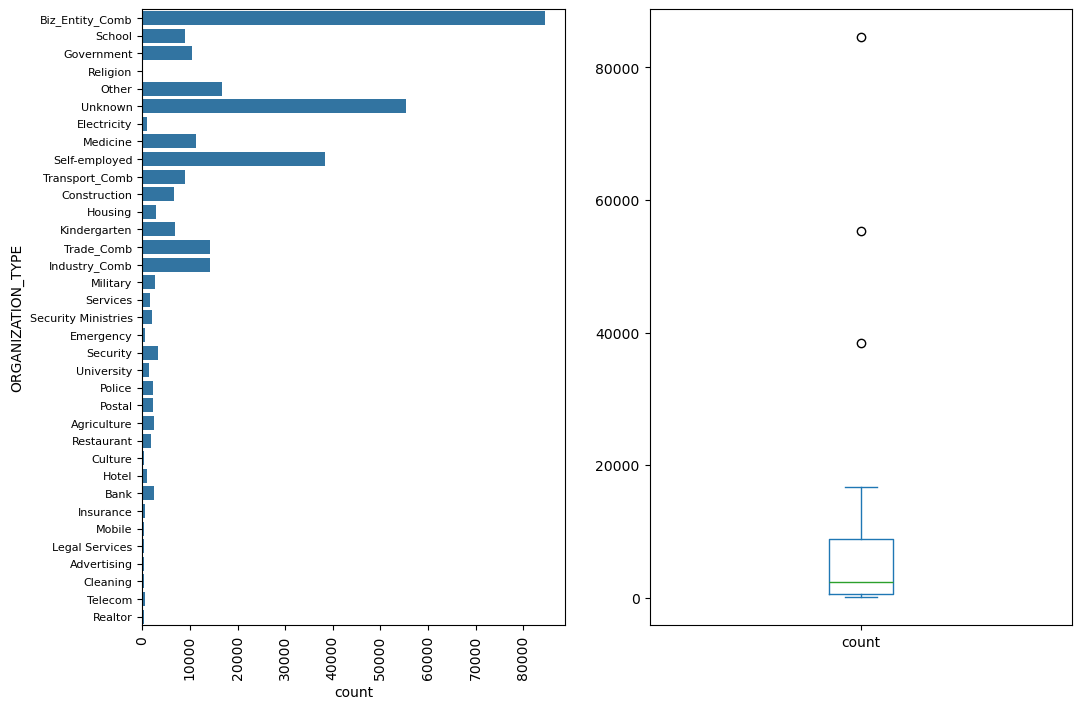

In [353]:
# Variable distribution through countplot and boxplot for ORGANIZATION_TYPE
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.countplot(df2.ORGANIZATION_TYPE)
plt.xticks(rotation=90)
plt.yticks(fontsize=8)
plt.subplot(1,2,2)
df2.ORGANIZATION_TYPE.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Now the top 3 categories having more than 10% of the data each are: Biz_Entity_Comb (27.49%), Unknown (18.00%) and Self-employed (12.49%).
 - There are 10 categories with more than 1% and less than 10% data like Others, Trade_comb, Industry_comb, Medicine etc. 
 - Rest of the categories have less 1% of the column data.
 - The high representation of the top 3 categories is leading to skewed data in ORGANIZATION_TYPE column. 
</div>

In [355]:
# Rechecking new value_counts%
df2.ORGANIZATION_TYPE.value_counts(normalize=True)*100

ORGANIZATION_TYPE
Biz_Entity_Comb        27.488391
Unknown                18.007336
Self-employed          12.491382
Other                   5.425225
Trade_Comb              4.655163
Industry_Comb           4.653863
Medicine                3.639905
Government              3.383327
Transport_Comb          2.923501
School                  2.891957
Kindergarten            2.237015
Construction            2.185634
Security                1.055907
Housing                 0.961926
Military                0.856563
Bank                    0.815263
Agriculture             0.798028
Police                  0.760956
Postal                  0.701445
Security Ministries     0.641935
Restaurant              0.588603
Services                0.512182
University              0.431533
Hotel                   0.314138
Electricity             0.308935
Insurance               0.194141
Telecom                 0.187637
Emergency               0.182109
Advertising             0.139509
Realtor                 0

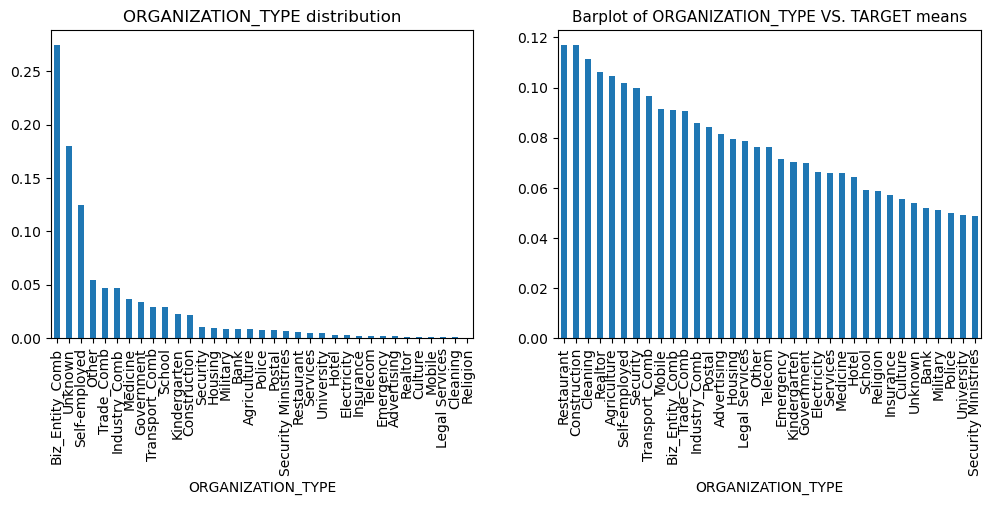

In [356]:
# Plotting the bar plot and countplot of TARGET vs. ORGANIZATION_TYPE values 
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df2.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('ORGANIZATION_TYPE distribution')
plt.subplot(1,2,2)
df2.groupby(['ORGANIZATION_TYPE'])['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of ORGANIZATION_TYPE VS. TARGET means', fontsize=11)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Among the top 3 categories having more than 10% of the column data, their default rates are: Biz_Entity_Comb (9.12%), Unknown (5.4%) and Self-employed (10.17%).
 - Though Restaurant, Construction and Cleaning cataegories have only 0.59%, 2.19% and 0.085% representation in the data, their default rate is among the highest at 11.71%, 11.68% and 11.15% respectively.
 - The categories having the lowest default rates are Bank(5.19%), Military(5.13%), Police(5.0%), University(4.9%) and Security Ministries(4.86%).
< 
</div>

#### 9. NAME_CONTRACT_TYPE

In [359]:
# Count of non-null values 
df2.NAME_CONTRACT_TYPE.describe()

count         307508
unique             2
top       Cash loans
freq          278230
Name: NAME_CONTRACT_TYPE, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - NAME_CONTRACT_TYPE column is a categorical variable with 'object' dtype.
 - The column answers the questions whether the loan is cash or revolving.
 - It has 307508 non-null values.
 - It has 2 unique values.
 - Its most frequently occuring category is 'Cash loans' at a frequency of 278230.
</div>

In [361]:
#Calculating value counts and the % of value counts of the column
pd.concat([df2.NAME_CONTRACT_TYPE.value_counts(), df2.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1)

counts  normalized_counts
NAME_CONTRACT_TYPE                           
Cash loans          278230          90.478947
Revolving loans      29278           9.521053

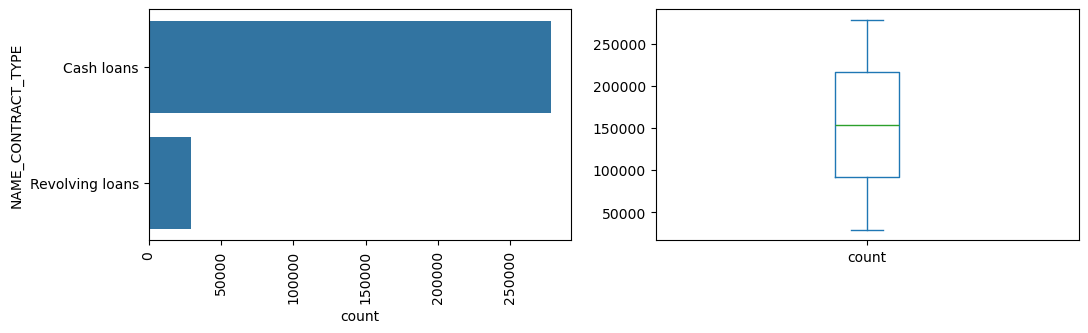

In [362]:
# Variable distribution through countplot and boxplot for NAME_CONTRACT_TYPE
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.countplot(df2.NAME_CONTRACT_TYPE)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
df2.NAME_CONTRACT_TYPE.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Majority of the clients (90.48%) in the dataset have taken a 'Cash loan'.
 - Only about 9.52% clients have take a 'Revolving loan'.
 - The large number of clients with the 'Cash loan' is causing an imbalance in the data as unbiased insights can be drawn when there is approximately equal representation of both categories in the data.
</div>

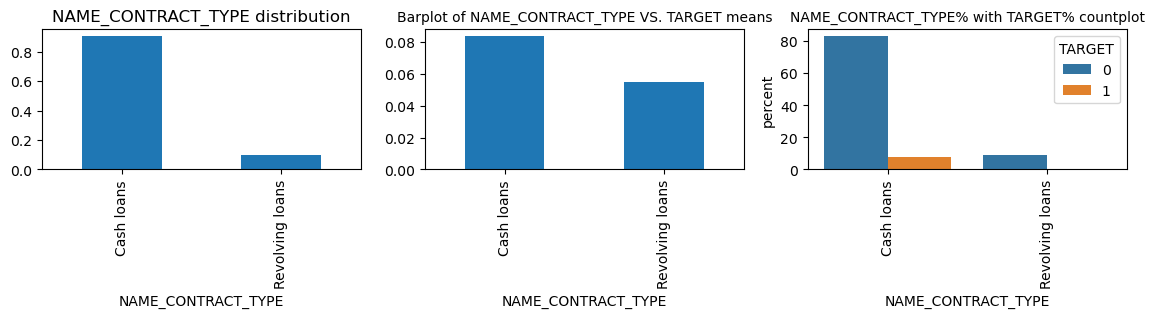

In [364]:
# Plotting the bar plot and countplot of TARGET vs. NAME_CONTRACT_TYPE values 
plt.figure(figsize=(14,4))
plt.subplot(2,3,1)
df2.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.title('NAME_CONTRACT_TYPE distribution')
plt.subplot(2,3,2)
df2.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of NAME_CONTRACT_TYPE VS. TARGET means', fontsize=10)
plt.subplot(2,3,3)
sns.countplot(x = df2.NAME_CONTRACT_TYPE, hue=df2.TARGET, stat="percent")
plt.title('NAME_CONTRACT_TYPE% with TARGET% countplot', fontsize=10)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Clients who have taken Cash loans form 90.48% of the dataset (first graph), and, not surprisingly, they are the highest defaulters too (second and third graphs).
 - Those who have taken Revolving loans form a much smaller subset of the data (9.52%) but have a comparatively high default rate, considering their small sample size.
 - The loan company should conduct more scrutiny of clients taking both type of loans to reduce the default rate.
</div>

#### 10. WEEKDAY_APPR_PROCESS_START

In [367]:
# Count of non-null values 
df2.WEEKDAY_APPR_PROCESS_START.describe()

count      307508
unique          7
top       TUESDAY
freq        53901
Name: WEEKDAY_APPR_PROCESS_START, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - WEEKDAY_APPR_PROCESS_START column is a categorical variable with 'object' dtype.
 - The column answers the question on which day of the week did the client apply for the loan .
 - It has 307508 non-null values.
 - It has 7 unique values.
 - Its most frequently occuring category is 'TUESDAY' at a frequency of 53901.
</div>

In [369]:
# Calculating value counts and the % of value counts of the column
pd.concat([df2.WEEKDAY_APPR_PROCESS_START.value_counts(), df2.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1)

counts  normalized_counts
WEEKDAY_APPR_PROCESS_START                           
TUESDAY                      53901          17.528324
WEDNESDAY                    51934          16.888666
MONDAY                       50714          16.491929
THURSDAY                     50589          16.451279
FRIDAY                       50338          16.369655
SATURDAY                     33852          11.008494
SUNDAY                       16180           5.261652

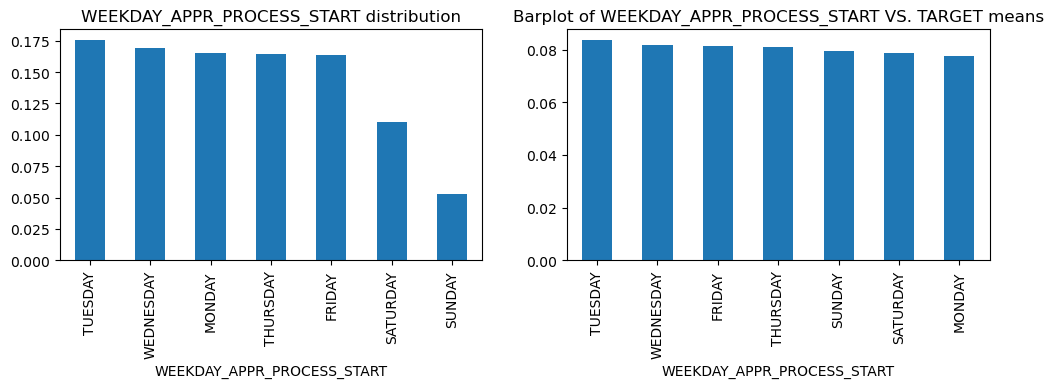

In [370]:
# Plotting the bar plot and countplot of TARGET vs. WEEKDAY_APPR_PROCESS_START values 
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
df2.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('WEEKDAY_APPR_PROCESS_START distribution')
plt.subplot(1,2,2)
df2.groupby(['WEEKDAY_APPR_PROCESS_START'])['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of WEEKDAY_APPR_PROCESS_START VS. TARGET means')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Except Saturday and Sunday, being the weekend days, the clients seem to have loans at equal rate on all other days of the week with Tuesday witnessing slightly more level of activity.
 - However, the default rate seems to be aproximately equal on all days including Saturday and Sunday.
 - As this variable does not seem to be a good differentiator of the defaulters and non-defaulters, we can drop this column.
</div>

In [372]:
# Dropping WEEKDAY_APPR_PROCESS_START from df2
df2.drop('WEEKDAY_APPR_PROCESS_START', axis=1, inplace=True)
df2.shape

(307508, 66)

## Univariate Analysis of Numerical Variables

### 1. HOUR_APPR_PROCESS_START

In [375]:
# Count of non-null values 
df2.HOUR_APPR_PROCESS_START.describe()

count    307508.000000
mean         12.063423
std           3.265839
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - HOUR_APPR_PROCESS_START column is a numerical variable with 'float64' dtype.
 - The column answers the question on which hour of the day did the client apply for the loan.
 - It has 307508 non-null values.
 - Its mean and median value are quite close to each other indicating a lack of outliers
 
</div>

In [377]:
# Calculating value counts and the % of value counts of the column
pd.concat([df2.HOUR_APPR_PROCESS_START.value_counts(), df2.HOUR_APPR_PROCESS_START.value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1)

counts  normalized_counts
HOUR_APPR_PROCESS_START                           
10                        37722          12.266998
11                        37228          12.106352
12                        34233          11.132393
13                        30959          10.067706
14                        27682           9.002042
9                         27383           8.904809
15                        24838           8.077188
16                        20385           6.629096
8                         15127           4.919222
17                        14900           4.845402
7                          9131           2.969354
18                         9049           2.942688
6                          5842           1.899788
19                         3848           1.251350
5                          3638           1.183059
4                          2090           0.679657
3                          1230           0.399990
20                         1196           0.388933
21                          405           0.131704
2                           305           0.099184
22                          150           0.048779
1                            86           0.027967
23                           41           0.013333
0                            40           0.013008

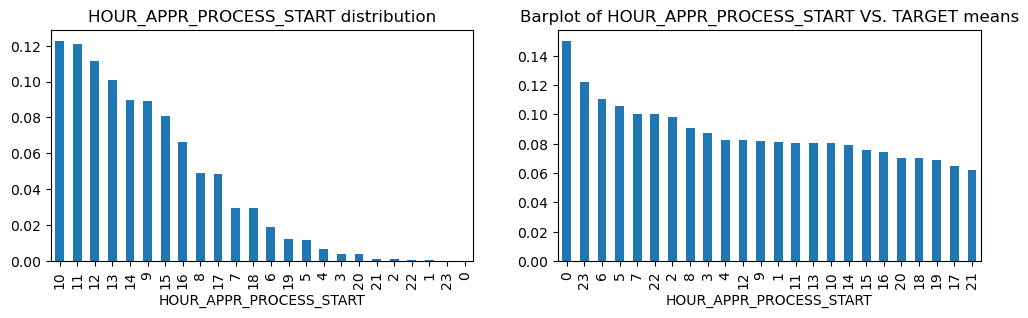

In [378]:
# Plotting the distribution and bar plot  of TARGET vs. HOUR_APPR_PROCESS_START values 
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
df2.HOUR_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('HOUR_APPR_PROCESS_START distribution')
plt.subplot(1,2,2)
df2.groupby(['HOUR_APPR_PROCESS_START'])['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of HOUR_APPR_PROCESS_START VS. TARGET means')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - As seen in the graphs above, though the clients generally prefer to apply for the loan in the normal working morning hours, peaking at 10.00 am, they show less activity during the evening hours and almost negligible activity during the lunch and late night hours.
 - However, the default rate is the highest for applications made during late night hours (0th, 23rd, 22nd) and early morning hours (6, 5, 7). 
 - Beyond these hours, the default rate seems to be almost equal for all the other hours.
 - So the loan company should conduct extra scrutiny for clients who apply during late night or early morning hours.
 
</div>

### 2. AGE_YEARS

In [381]:
# Count of non-null values 
df2.AGE_YEARS.describe().round(2)

count    307508.00
mean         43.94
std          11.96
min          20.52
25%          34.01
50%          43.15
75%          53.92
max          69.12
Name: AGE_YEARS, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AGE_YEARS column is a numerical variable with 'float64' dtype.
 - The column refers to the age of the client in terms of years.
 - It has 307508 non-null values.
 - Its mean and median are very close to each other.
</div>

In [383]:
# Calculating value counts and the % of value counts of the column
df2.AGE_YEARS.nunique()

4805

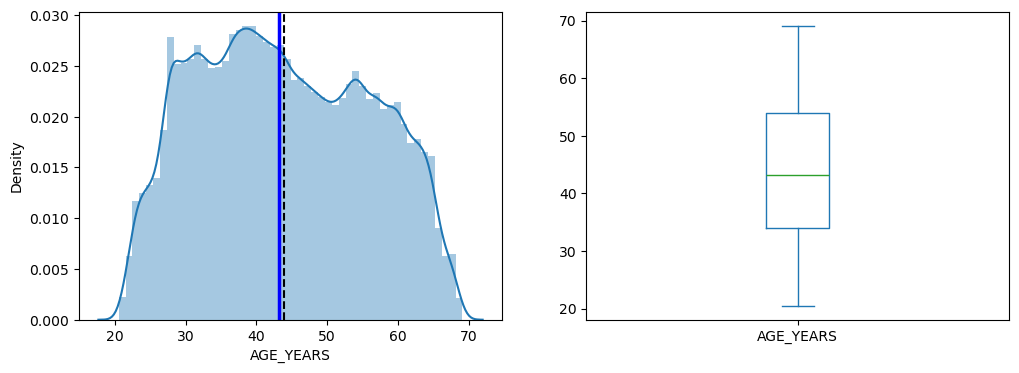

In [384]:
# Variable distribution through histogram and boxplot for AGE_YEARS
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df2.AGE_YEARS)
plt.axvline(df2.AGE_YEARS.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df2.AGE_YEARS.median(), color='Blue', ls='-', lw=2.5)
plt.subplot(1,2,2)
df2.AGE_YEARS.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AGE_YEARS column seems to have near normal distribution with slight skewness towards left.
 - To draw better insights from this column, we can consider binning the values into age groups.

</div>

In [386]:
# Creating age bins and assigning them to new category 'AGE_GROUP'
df2['AGE_GROUP'] = pd.cut(df2.AGE_YEARS, [0,30,40,50,60,999], labels=['<30','30-40','40-50','50-60','60+'])

In [387]:
# Calculating value counts and the % of value counts of the new column
pd.concat([df2.AGE_GROUP.value_counts(), df2.AGE_GROUP.value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1)

counts  normalized_counts
AGE_GROUP                           
30-40       82315          26.768409
40-50       76526          24.885857
50-60       68066          22.134709
<30         45039          14.646448
60+         35562          11.564577

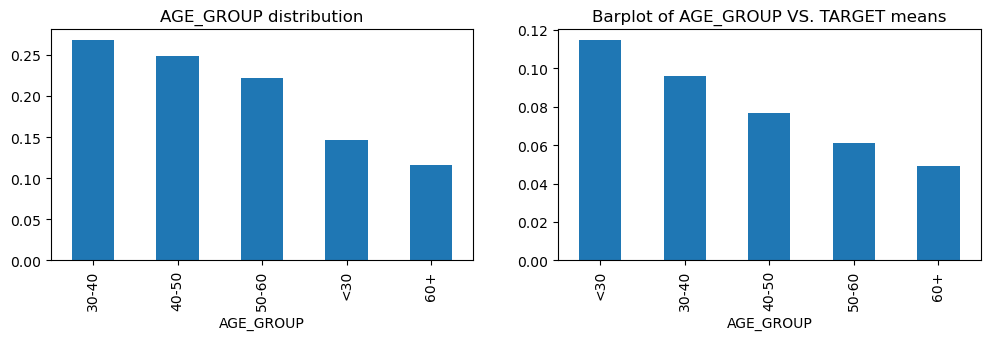

In [388]:
# Plotting the percentage of each bucket and average values of TARGET in each bucket. 
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
df2.AGE_GROUP.value_counts(normalize=True).plot.bar()
plt.title('AGE_GROUP distribution')
plt.subplot(1,2,2)
df2.groupby('AGE_GROUP')['TARGET'].mean().plot.bar()
plt.title('Barplot of AGE_GROUP VS. TARGET means')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - As we can observe in the above graphs, though the < 30 yrs age bucket represents only about 14.64% of the data, they are the highest defaulters.
 - On the other hand, though the there are only 11.56% clients in the 60+ bucket, they have defaulted the least among the other age groups.   
 - In general, the trend seems to be that as the age groups are increasing in years, the default rate is correspondingly decreasing.
 - This may also be due to the fact that usually people get higher salaries as they advance in years and work experience. So it becomes increasingly easier for them to manage timely loan repayment.
 - The loan company should conduct more scrutiny of clients with < 30 years age group while focusing more on clients in 60+ age group.  
 
</div>

### 3. CNT_CHILDREN

In [391]:
# Count of non-null values 
df2.CNT_CHILDREN.describe().round(2)

count    307508.00
mean          0.42
std           0.72
min           0.00
25%           0.00
50%           0.00
75%           1.00
max          14.00
Name: CNT_CHILDREN, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - CNT_CHILDREN column is a numerical variable with 'float64' dtype.
 - The column refers to the number of children the client has.
 - It has 307508 non-null values.
 - Its mean and median are very close to each other though there is a 14X jump from 75th percentile to max value indicating presence of outliers.
 
</div>

In [393]:
# Calculating value counts and the % of value counts of the column
pd.concat([df2.CNT_CHILDREN.value_counts(), df2.CNT_CHILDREN.value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1)

counts  normalized_counts
CNT_CHILDREN                           
0             215370          70.037202
1              61119          19.875580
2              26749           8.698635
3               3717           1.208749
4                429           0.139509
5                 84           0.027316
6                 21           0.006829
7                  7           0.002276
14                 3           0.000976
8                  2           0.000650
9                  2           0.000650
12                 2           0.000650
10                 2           0.000650
11                 1           0.000325

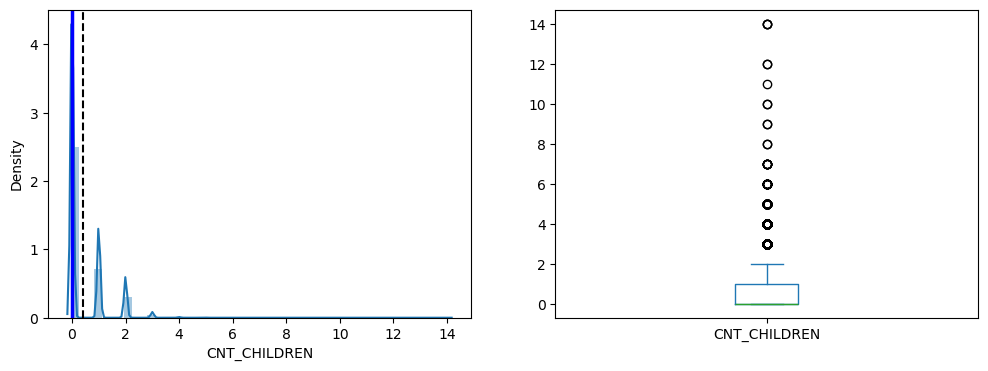

In [394]:
# Variable distribution through histogram and boxplot for CNT_CHILDREN
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df2.CNT_CHILDREN)
plt.axvline(df2.CNT_CHILDREN.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df2.CNT_CHILDREN.median(), color='Blue', ls='-', lw=2.5)
plt.subplot(1,2,2)
df2.CNT_CHILDREN.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 70.04% of the clients in the dataset have 0 children, 19.88% have 1 child, while about 8.7% of clients have 2 children.
 - While 1.21% clients have 3 children, the rest of the categories have less than 1% representation in the dataset. 
 - All families with more than 2 children are appearing as outliers including the family with maximum count of children: 14.
 - We can cap the count of children to 5 for all clients having children equal to or more than 5 children.

</div>

In [396]:
# Replacing cells with 5 / 6 / 7 / 8 / 9 / 10 / 11 / 12 / 13 / 14 value with 5 in CNT_CHILDREN
df2.loc[df2.CNT_CHILDREN >= 5,'CNT_CHILDREN'] = 5

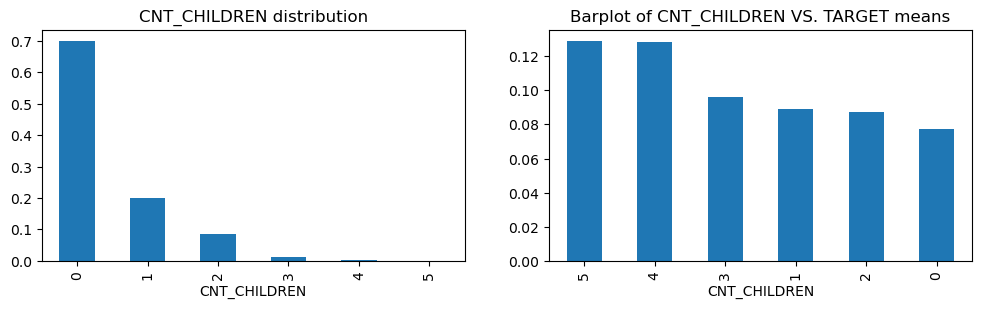

In [397]:
# Plotting the distribution and bar plot  of TARGET vs. CNT_CHILDREN values 
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
df2.CNT_CHILDREN.value_counts(normalize=True).plot.bar()
plt.title('CNT_CHILDREN distribution')
plt.subplot(1,2,2)
df2.groupby('CNT_CHILDREN')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of CNT_CHILDREN VS. TARGET means')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though the clients with 0 children have the highest representation in the dataset, they seem to have the lowest default rate among other clients.
 - On the other hand, client with 5 or more children have the lowest representation in the dataset, yet they show the highest default rate in the sample. 
 - In general, it seems that more the number of children, more is the default rate, except for clients with 2 children, who have defaulted lesser than other categories.

</div>

### 4. AMT_INCOME_TOTAL

In [400]:
# Count of non-null values 
df2.AMT_INCOME_TOTAL.describe().round(2)

count    3.075080e+05
mean     1.687982e+05
std      2.371242e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AMT_INCOME_TOTAL column is a numerical variable with 'float64' dtype.
 - The column refers to the income of the client.
 - It has 307508 non-null values.
 - Its mean and median are close to each other though there is a big jump from 75th percentile to max value indicating presence of outliers.
 
</div>

In [402]:
# Calculating number of unique values of the column
df2.AMT_INCOME_TOTAL.nunique()

2548

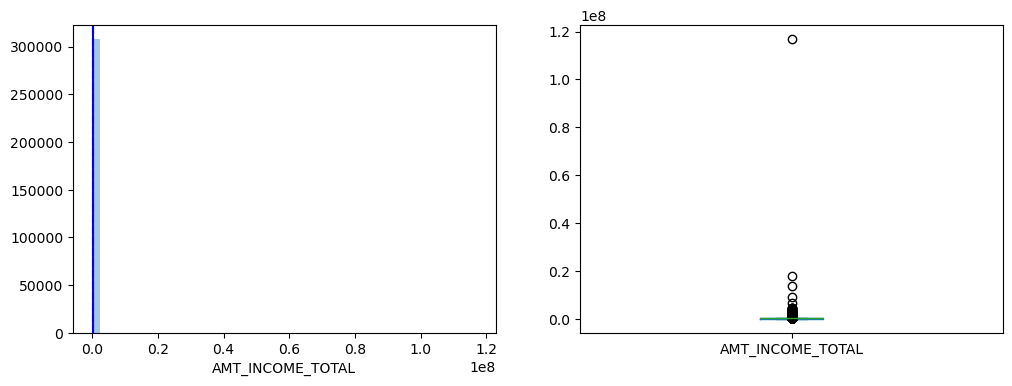

In [403]:
# Variable distribution through histogram and boxplot for AMT_INCOME_TOTAL
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df2.AMT_INCOME_TOTAL, kde=False)
plt.axvline(df2.AMT_INCOME_TOTAL.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df2.AMT_INCOME_TOTAL.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df2.AMT_INCOME_TOTAL.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The column seems to have some extremely high outliers due to which we are not able to visualize the rest of the data properly. 
 - Lets examine these records and drop them if required.
 
</div>

In [405]:
df2[df2.AMT_INCOME_TOTAL==df2.AMT_INCOME_TOTAL.max()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840      114967       1         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840               Y             1       117000000.0    562491.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
12840      26194.5         454500.0   Unaccompanied          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  FLAG_MOBIL  FLAG_EMP_PHONE  \
12840                    0.010643           1               1   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
12840                0                 1           0           0   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840        Laborers              3.0                     2   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
12840                            2                       14   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
12840                           0                           0   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
12840                            0                       0   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
12840                       0                        0   Biz_Entity_Comb   

       EXT_SOURCE_2  EXT_SOURCE_3  OBS_60_CNT_SOCIAL_CIRCLE  \
12840      0.113161      0.145543                       0.0   

       DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
12840                       0.0                0                1   

       FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
12840                0                0                0                0   

       FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
12840                0                0                 0                 0   

       FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  TOTAL_CREDIT_BUREAU  \
12840                 0                 0                  1.0   

       YEARS_LAST_PHONE_CHANGE  AGE_YEARS  DAYS_EMPLOYED_365243  \
12840                      0.0      34.56                     0   

       YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH AGE_GROUP  
12840            2.53               18.53              9.98     30-40

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Here we can see that the client in the outlier entry is a married female Laborer with Secondary / secondary special education who has defaulted on the cash loan taken. 
 - Given the background and occupation of the client here, it seems possible that the income figure has been entered erroneously.
 - In that case, it makes sense to drop the record.
 
</div>

In [407]:
#Dropping the AMT_INCOME_TOTAL outlier 
df2 = df2[~(df2.AMT_INCOME_TOTAL==df2.AMT_INCOME_TOTAL.max())]
df2.shape

(307507, 67)

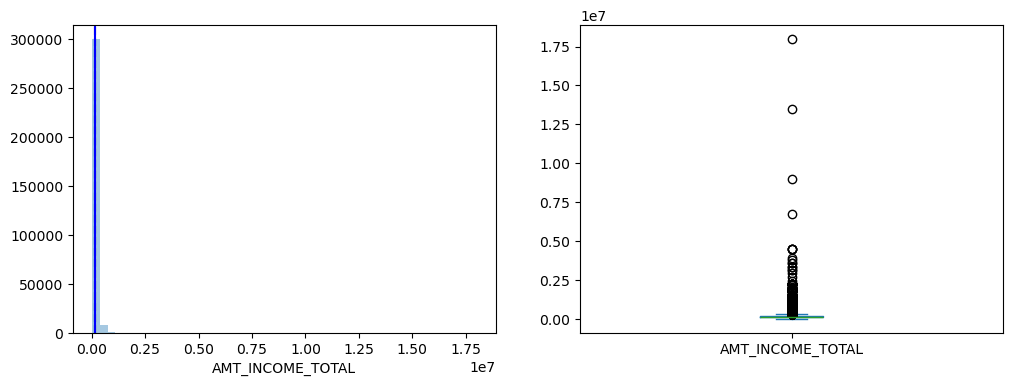

In [408]:
# Variable distribution through histogram and boxplot for AMT_INCOME_TOTAL
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df2.AMT_INCOME_TOTAL, kde=False)
plt.axvline(df2.AMT_INCOME_TOTAL.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df2.AMT_INCOME_TOTAL.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df2.AMT_INCOME_TOTAL.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There still seem to be some outliers over the income figure of 5,000,000, lets examine them
 
</div>

In [410]:
df2[df2.AMT_INCOME_TOTAL>=5000000.0]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
77768       190160       0         Cash loans           F            Y   
131127      252084       0         Cash loans           M            Y   
203693      336147       0         Cash loans           M            Y   
246858      385674       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
77768                N             0         9000000.0   1431531.0   
131127               N             0         6750000.0    790830.0   
203693               Y             2        18000090.0    675000.0   
246858               Y             0        13500000.0   1400503.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
77768      132601.5        1377000.0   Unaccompanied               Working   
131127      52978.5         675000.0   Unaccompanied               Working   
203693      69295.5         675000.0   Unaccompanied  Commercial associate   
246858     130945.5        1368000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
77768                Higher education     Civil marriage  House / apartment   
131127               Higher education            Married  House / apartment   
203693  Secondary / secondary special            Married  House / apartment   
246858               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  FLAG_MOBIL  FLAG_EMP_PHONE  \
77768                     0.010147           1               1   
131127                    0.009549           1               1   
203693                    0.030755           1               1   
246858                    0.030755           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
77768                 0                 1           0           0   
131127                1                 1           1           0   
203693                0                 1           0           0   
246858                1                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
77768         Managers              2.0                     2   
131127        Laborers              2.0                     2   
203693         Unknown              4.0                     2   
246858         Unknown              2.0                     2   

        REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
77768                             2                       13   
131127                            2                       14   
203693                            2                       22   
246858                            2                       12   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
77768                            0                           0   
131127                           0                           1   
203693                           0                           0   
246858                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
77768                             0                       0   
131127                            1                       0   
203693                            0                       0   
246858                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
77768                        0                        0   Biz_Entity_Comb   
131127                       1                        1    Transport_Comb   
203693                       0                        0   Biz_Entity_Comb   
246858                       0                        0   Biz_Entity_Comb   

        EXT_SOURCE_2  EXT_SOURCE_3  OBS_60_CNT_SOCIAL_CIRCLE  \
77768       0.504086      0.432962                       1.0   
131127      0.

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - As these seem to be genuine records, we can consider capping them at 5000000 as the outliers are present in a continous manner till this point.
 
</div>

In [412]:
# Capping the outliers at 5000000
df2['AMT_INCOME_TOTAL'] = np.where(df2['AMT_INCOME_TOTAL']>5000000,5000000,df2['AMT_INCOME_TOTAL'])

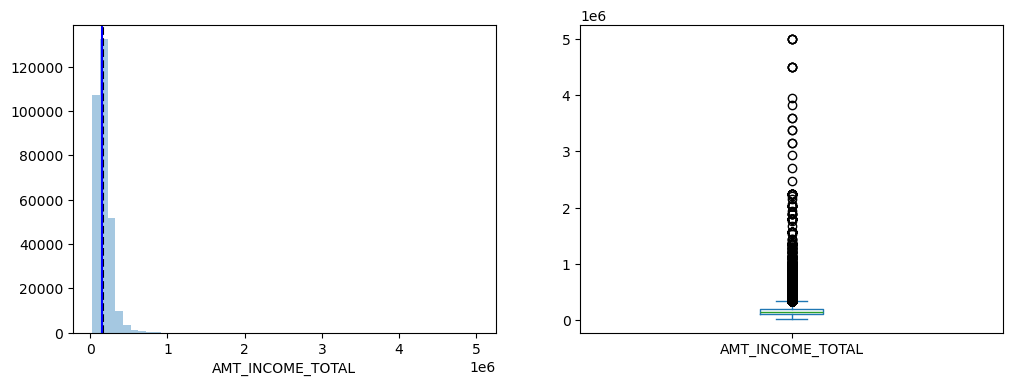

In [413]:
# Variable distribution through histogram and boxplot for AMT_INCOME_TOTAL
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df2.AMT_INCOME_TOTAL, kde=False)
plt.axvline(df2.AMT_INCOME_TOTAL.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df2.AMT_INCOME_TOTAL.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df2.AMT_INCOME_TOTAL.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There still are some outliers which we can handle by binning the data in the column.
 
</div>

In [415]:
df2.AMT_INCOME_TOTAL.describe().round(2)

count     307507.00
mean      168329.63
std       100683.87
min        25650.00
25%       112500.00
50%       147150.00
75%       202500.00
max      5000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [416]:
# Creating income bins and assigning them to new category 'INCOME_GRP'
df2['INCOME_GRP'] = pd.qcut(df2.AMT_INCOME_TOTAL, [0, 0.2, 0.4, 0.6, 0.8, 1], ['<99000', '99000-135000', '135000-162000', '162000-225000', '225000+'])
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0                    0.018801           1               1                0   
1                    0.003541           1               1                0   
2                    0.010032           1               1                1   
3                    0.008019           1               1                0   
4                    0.028663           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
0                       0                        0   Biz_Entity_Comb   
1                       0   

In [417]:
df2.INCOME_GRP.value_counts(normalize=True)*100

INCOME_GRP
99000-135000     27.886845
162000-225000    24.556189
<99000           20.705545
225000+          15.322253
135000-162000    11.529168
Name: proportion, dtype: float64

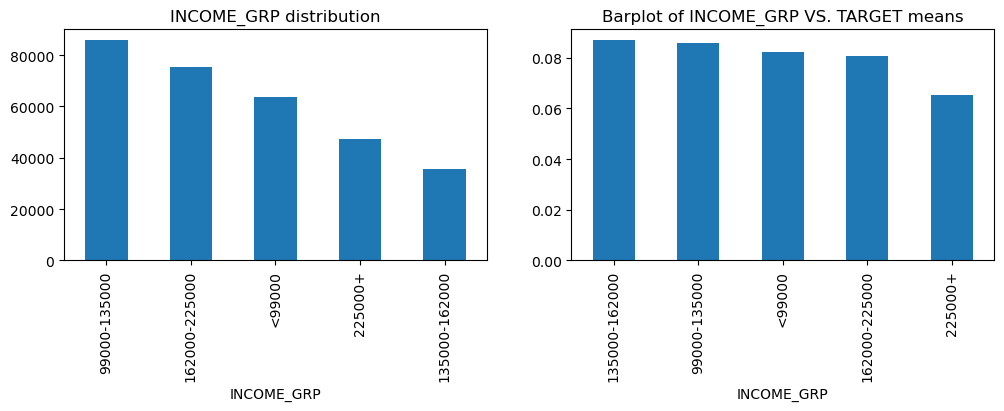

In [418]:
# Plotting the percentage of each bucket and average values of TARGET in each bucket. 
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
df2.INCOME_GRP.value_counts().plot.bar()
plt.title('INCOME_GRP distribution')
plt.subplot(1,2,2)
df2.groupby('INCOME_GRP')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of INCOME_GRP VS. TARGET means')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - In the first graph, we can see that though the third bucket income group (135000-162000) has the lowest representation in the group (11.52%), it is the highest defaulting group across all the buckets (second graph).
 - Medium-low income group (99000-135000) has the highest representation in the group at 29.89%, and it is also showing a high default rate in terms of loan repayment.
 - On the other hand, though the highest income group has a low representation in the group (15.32%), it is showing the lowest default rate in the group.
 - In general, we can see that the defaulter activity seems to be increasing from low income group (<99000) to medium income group (135000-162000).  Thereafter, the default rate seems to be decreasing from medium-high bucket (162000-225000) to the highest income group (225000+).    
 
</div>

### 5. FLAG_MOBIL

In [421]:
# Count of non-null values 
df2.FLAG_MOBIL.describe().round(2)

count    307507.0
mean          1.0
std           0.0
min           0.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: FLAG_MOBIL, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - FLAG_MOBIL column is a numerical variable with 'float64' dtype.
 - The column answers the questions whether the client provided a mobile number (1) or not (0).
 - It has 307507 non-null values.
 - It has 2 unique values: 1 and 0.

</div>

In [423]:
# Calculating value counts and the % of value counts of the column
pd.concat([df2.FLAG_MOBIL.value_counts(), df2.FLAG_MOBIL.value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1)

counts  normalized_counts
FLAG_MOBIL                           
1           307506          99.999675
0                1           0.000325

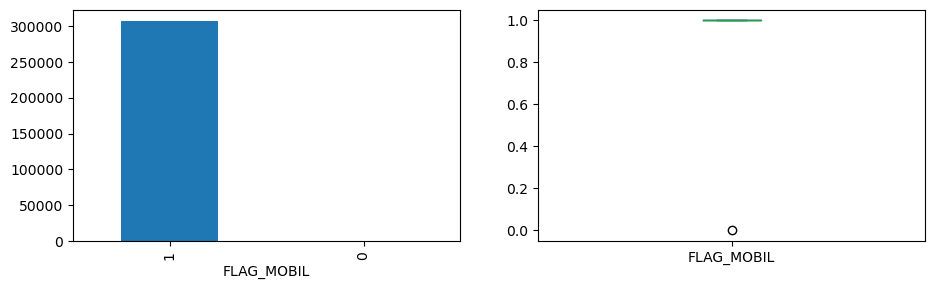

In [424]:
# Variable distribution through bar plot and boxplot for FLAG_MOBIL
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
df2.FLAG_MOBIL.value_counts().plot.bar()
plt.subplot(1,2,2)
df2.FLAG_MOBIL.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 99% of the column is composed of value 1 implying that the client provided a mobile number.
 - Only 1 client did not provide a mobile number and is appearing as an outlier.
 - This column cannot be an unbiased indicator of default rate as 99% clients provided a mobile number.
 - So it makes sense to drop FLAG_EMAIL. 

</div>

In [426]:
# Dropping column FLAG_MOBIL from the dataframe
df2.drop(['FLAG_MOBIL'], axis=1, inplace=True)
df2.shape

(307507, 67)

### 6. FLAG_EMP_PHONE / FLAG_WORK_PHONE / FLAG_CONT_MOBILE / FLAG_PHONE / FLAG_EMAIL

In [428]:
# Count of non-null values
df2[['FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','FLAG_CONT_MOBILE']].describe().round(2)

FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
count       307507.00         307507.0   307507.00   307507.00   
mean             0.82              0.2        0.28        0.06   
std              0.38              0.4        0.45        0.23   
min              0.00              0.0        0.00        0.00   
25%              1.00              0.0        0.00        0.00   
50%              1.00              0.0        0.00        0.00   
75%              1.00              0.0        1.00        0.00   
max              1.00              1.0        1.00        1.00   

       FLAG_CONT_MOBILE  
count         307507.00  
mean               1.00  
std                0.04  
min                0.00  
25%                1.00  
50%                1.00  
75%                1.00  
max                1.00

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL and FLAG_CONT_MOBILE columns are numerical variables with 'int64' dtype.
 - The column provides information on whether the client provided a work phone (1) or not (0), home phone (1) or not (2), email (1) or not(0) and was the mobile number reachable (1) or not (2).
 - They have 307507 non-null values.
 - They have 2 unique values: 1 and 0.

</div>

In [430]:
# Calculating value counts and the % of value counts of the columns
print(pd.concat([df2['FLAG_EMP_PHONE'].value_counts(), df2['FLAG_EMP_PHONE'].value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1))
print(pd.concat([df2['FLAG_WORK_PHONE'].value_counts(), df2['FLAG_WORK_PHONE'].value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1))
print(pd.concat([df2['FLAG_PHONE'].value_counts(), df2['FLAG_PHONE'].value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1))
print(pd.concat([df2['FLAG_EMAIL'].value_counts(), df2['FLAG_EMAIL'].value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1))
print(pd.concat([df2['FLAG_CONT_MOBILE'].value_counts(), df2['FLAG_CONT_MOBILE'].value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1))

                counts  normalized_counts
FLAG_EMP_PHONE                           
1               252121          81.988703
0                55386          18.011297
                 counts  normalized_counts
FLAG_WORK_PHONE                           
0                246200          80.063218
1                 61307          19.936782
            counts  normalized_counts
FLAG_PHONE                           
0           221078          71.893648
1            86429          28.106352
            counts  normalized_counts
FLAG_EMAIL                           
0           290065          94.327934
1            17442           5.672066
                  counts  normalized_counts
FLAG_CONT_MOBILE                           
1                 306933          99.813338
0                    574           0.186662


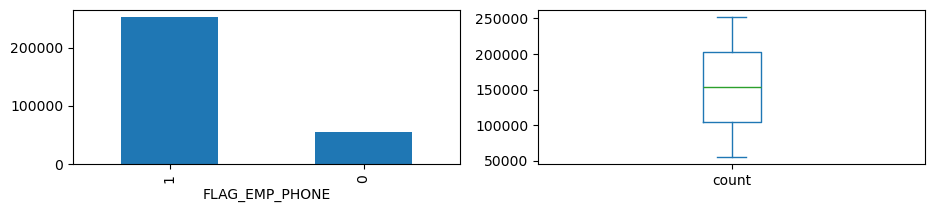

In [431]:
# Variable distribution through bar plot and boxplot for FLAG_EMP_PHONE
plt.figure(figsize=(11,2))
plt.subplot(1,2,1)
df2.FLAG_EMP_PHONE.value_counts().plot.bar()
plt.subplot(1,2,2)
df2.FLAG_EMP_PHONE.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 81.98% of the column is composed of value 1 implying that the client did provide a employee phone number.
 - Only 18.01% clients did not provide a employee phone number.

</div>

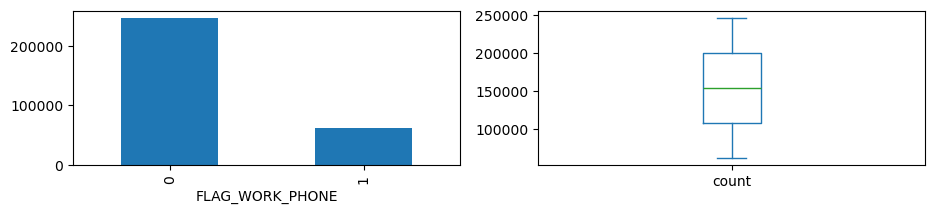

In [433]:
# Variable distribution through bar plot and boxplot for FLAG_WORK_PHONE
plt.figure(figsize=(11,2))
plt.subplot(1,2,1)
df2.FLAG_WORK_PHONE.value_counts().plot.bar()
plt.subplot(1,2,2)
df2.FLAG_WORK_PHONE.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 80.06% of the column is composed of value 0 implying that the client did not provide a work phone number.
 - Only 19.94% clients provided a work phone number.

</div>

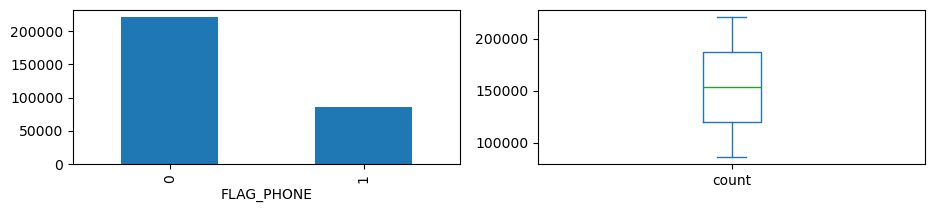

In [435]:
# Variable distribution through bar plot and boxplot for FLAG_PHONE
plt.figure(figsize=(11,2))
plt.subplot(1,2,1)
df2.FLAG_PHONE.value_counts().plot.bar()
plt.subplot(1,2,2)
df2.FLAG_PHONE.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 71.89% of the column is composed of value 0 implying that the client did not provide a home phone number.
 - Only 28.12% clients provided a home phone number.

</div>

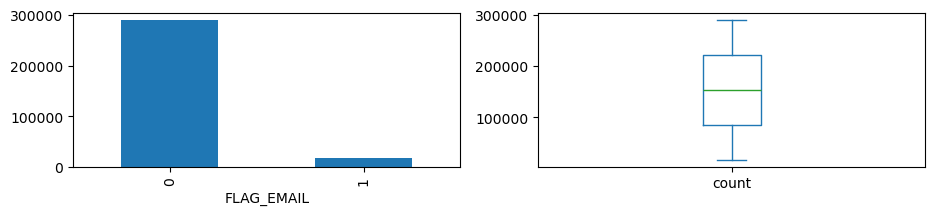

In [437]:
# Variable distribution through bar plot and boxplot for FLAG_EMAIL
plt.figure(figsize=(11,2))
plt.subplot(1,2,1)
df2.FLAG_EMAIL.value_counts().plot.bar()
plt.subplot(1,2,2)
df2.FLAG_EMAIL.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 94% of the column is composed of value 0 implying that the clients did not provide an email.
 - Only 5.67% of clients provided an email.
 - This column cannot be an unbiased indicator of default rate as for 94% clients the email is missing.
 - So it makes sense to drop FLAG_EMAIL. 

</div>

In [439]:
# Dropping column FLAG_EMAIL from the dataframe
df2.drop(['FLAG_EMAIL'], axis=1, inplace=True)
df2.shape

(307507, 66)

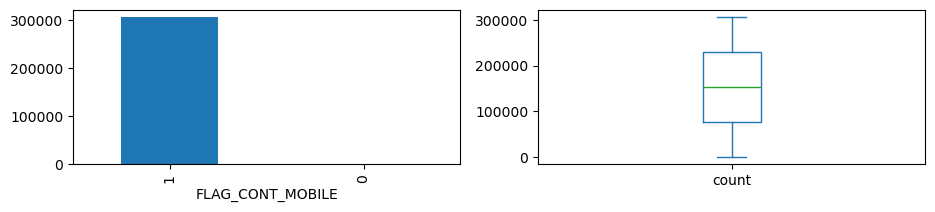

In [440]:
# Variable distribution through bar plot and boxplot for FLAG_CONT_MOBILE
plt.figure(figsize=(11,2))
plt.subplot(1,2,1)
df2.FLAG_CONT_MOBILE.value_counts().plot.bar()
plt.subplot(1,2,2)
df2.FLAG_CONT_MOBILE.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 99% of the column is composed of value 1 implying that the client's mobile number was reachable.
 - Only for 0.18% of clients the mobile number was not reachable.
 - This column cannot be an unbiased indicator of default rate as for 99% clients the mobile number was reachable.
 - So it makes sense to drop FLAG_CONT_MOBILE. 

</div>

In [442]:
# Dropping column FLAG_CONT_MOBILE from the dataframe
df2.drop(['FLAG_CONT_MOBILE'], axis=1, inplace=True)
df2.shape

(307507, 65)

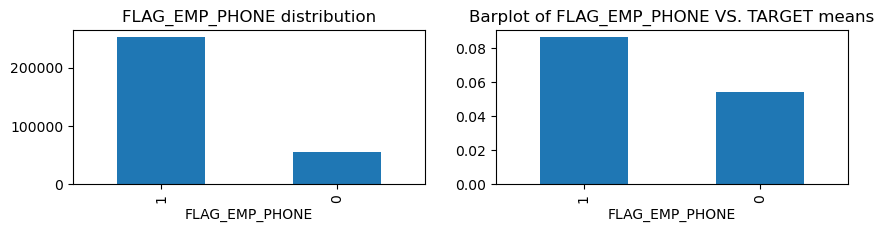

In [443]:
# Plotting the distribution and bar plot  of TARGET vs. FLAG_EMP_PHONE values 
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
df2.FLAG_EMP_PHONE.value_counts().plot.bar()
plt.title('FLAG_EMP_PHONE distribution')
plt.subplot(1,2,2)
df2.groupby('FLAG_EMP_PHONE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of FLAG_EMP_PHONE VS. TARGET means')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - It should be noted that the data in this column is unbalanced as 81.98% of clients did provide the employee phone and have defaulted more on loan repayments than the clients who have not provided employee phone number.
 - The clients who have not provided the employee phone number make up only about 18.01% of the sample. 

</div>

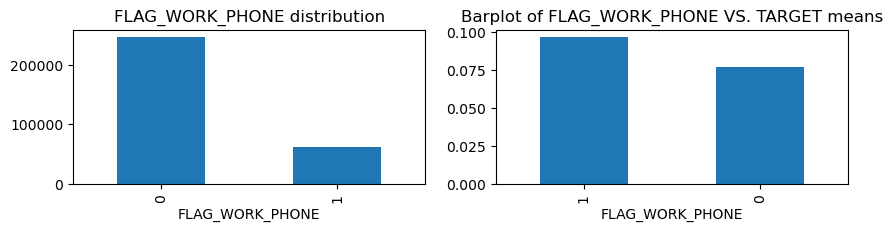

In [445]:
# Plotting the distribution and bar plot  of TARGET vs. FLAG_WORK_PHONE values 
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
df2.FLAG_WORK_PHONE.value_counts().plot.bar()
plt.title('FLAG_WORK_PHONE distribution')
plt.subplot(1,2,2)
df2.groupby('FLAG_WORK_PHONE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of FLAG_WORK_PHONE VS. TARGET means')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - It should be noted that the data in this column is unbalanced as more than 80% of clients did not provide the work phone. 
 - The clients who have provided the work phone number make up only about 19.94% of the sample but have defaulted more on loan repayments than the clients who have not provided work phone number.

</div>

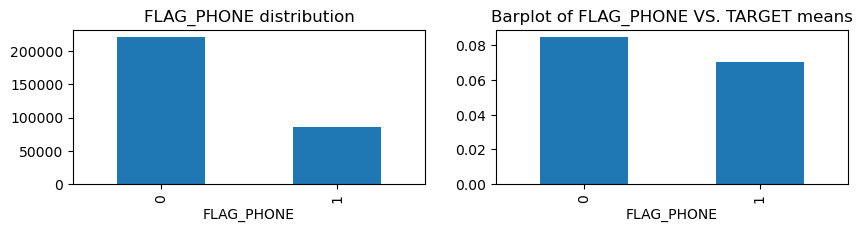

In [447]:
# Plotting the distribution and bar plot  of TARGET vs. FLAG_PHONE values 
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
df2.FLAG_PHONE.value_counts().plot.bar()
plt.title('FLAG_PHONE distribution')
plt.subplot(1,2,2)
df2.groupby('FLAG_PHONE')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of FLAG_PHONE VS. TARGET means')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - It should be noted that the data in this column is unbalanced as for more than 70% of clients, the home phone was not provided. 
 - The clients who have not provided the home phone number make up most of the sample and have also defaulted more on loan repayments than the clients who provided the home phone number.
 - Thus, the loan company should insist on the home number being provided during the process of loan application. 

</div>

<div class="alert alert-block alert-info">
<b>Combined Insight regarding contact numbers</b>
    
 - After analysing all the contact numbers provide by the customer, the data shows that the customers who provide the home phone number are less likely to default on their loan payments than the clients who may provide their work phone number, employee phone number, mobile number or email address.   

</div>

### 7. FLAG_DOCUMENT_2 / 3 / 4 / 5 / 6 / 7 / 8 / 9 / 10 / 11 / 12 / 13 / 14 / 15 / 16 / 17 / 18 / 19 / 20 /21

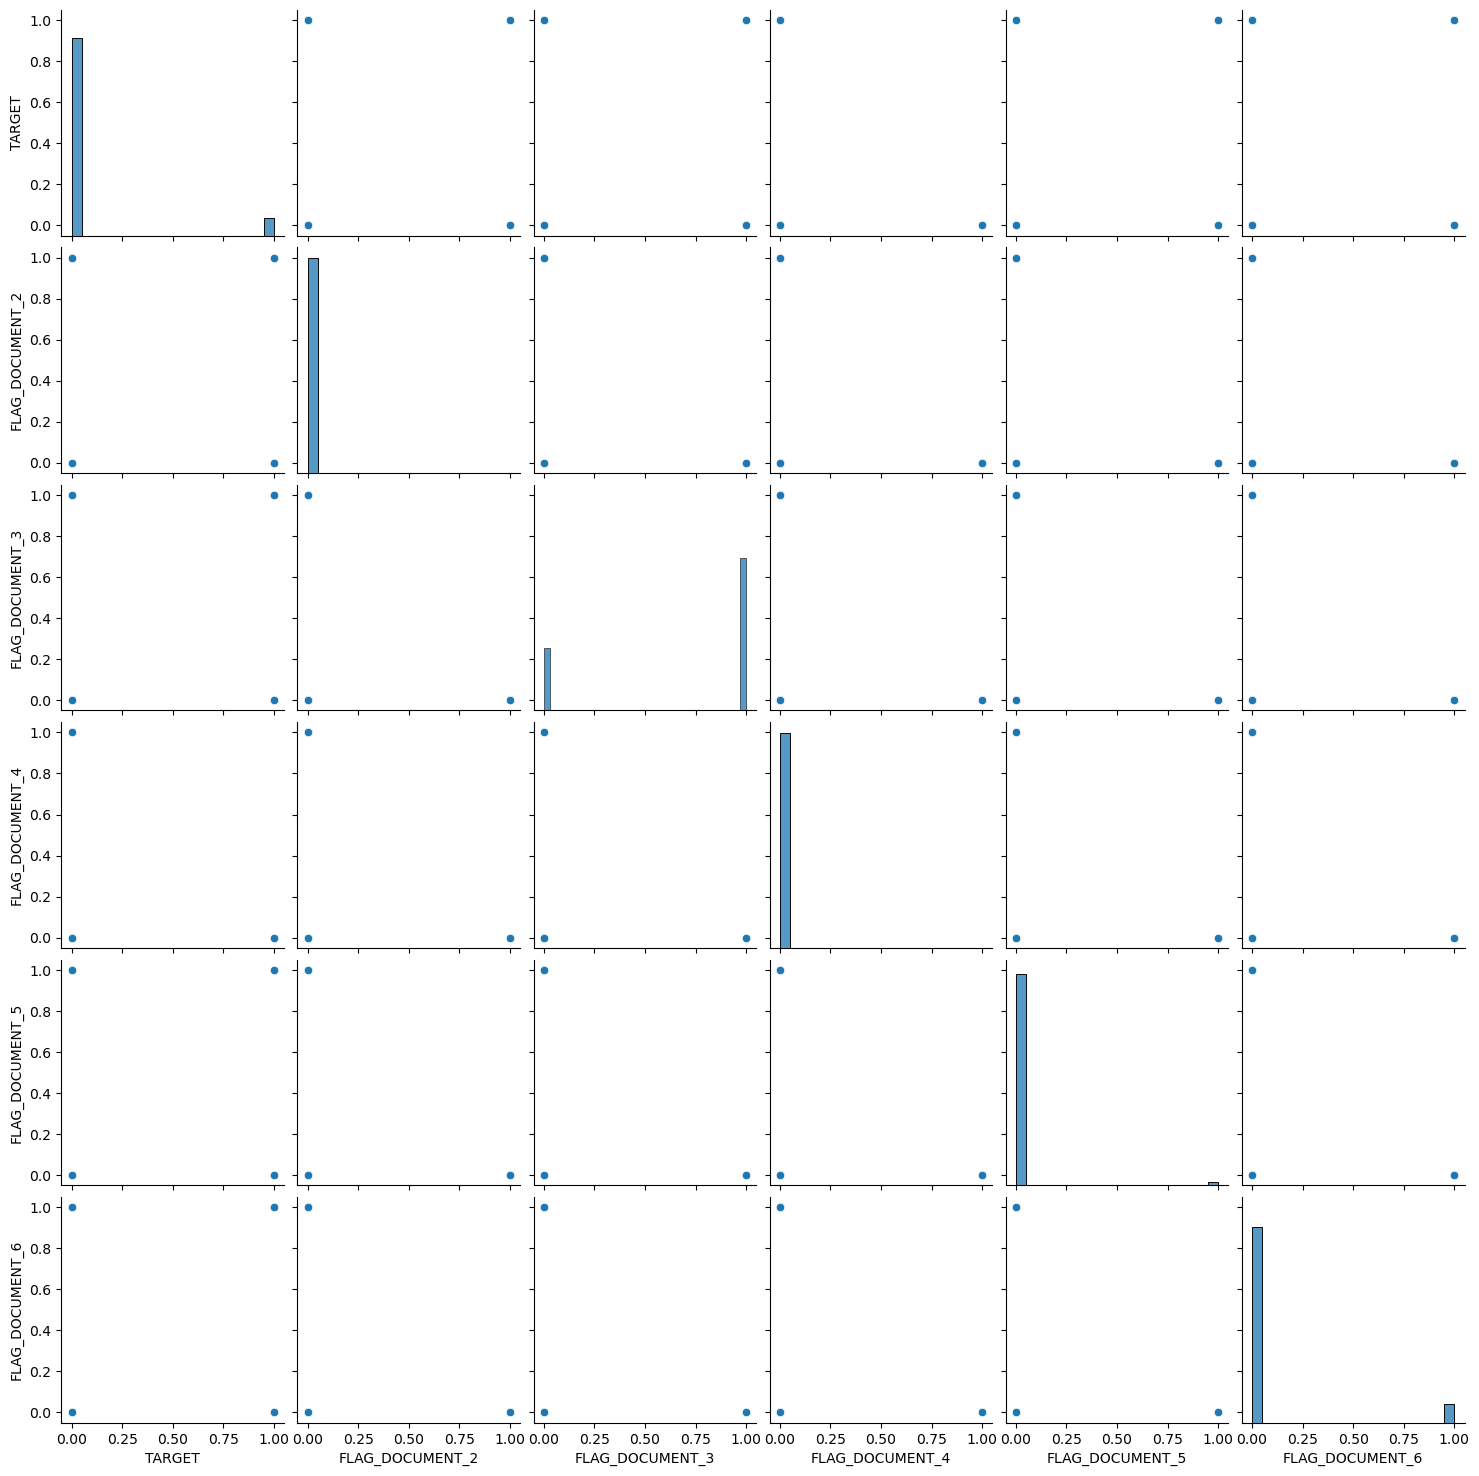

In [451]:
# Conducting pairplot analysis to check if any correlation between TARGET and FLAG_DOCUMENTS
sns.pairplot(data=df2, vars=['TARGET','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6'])

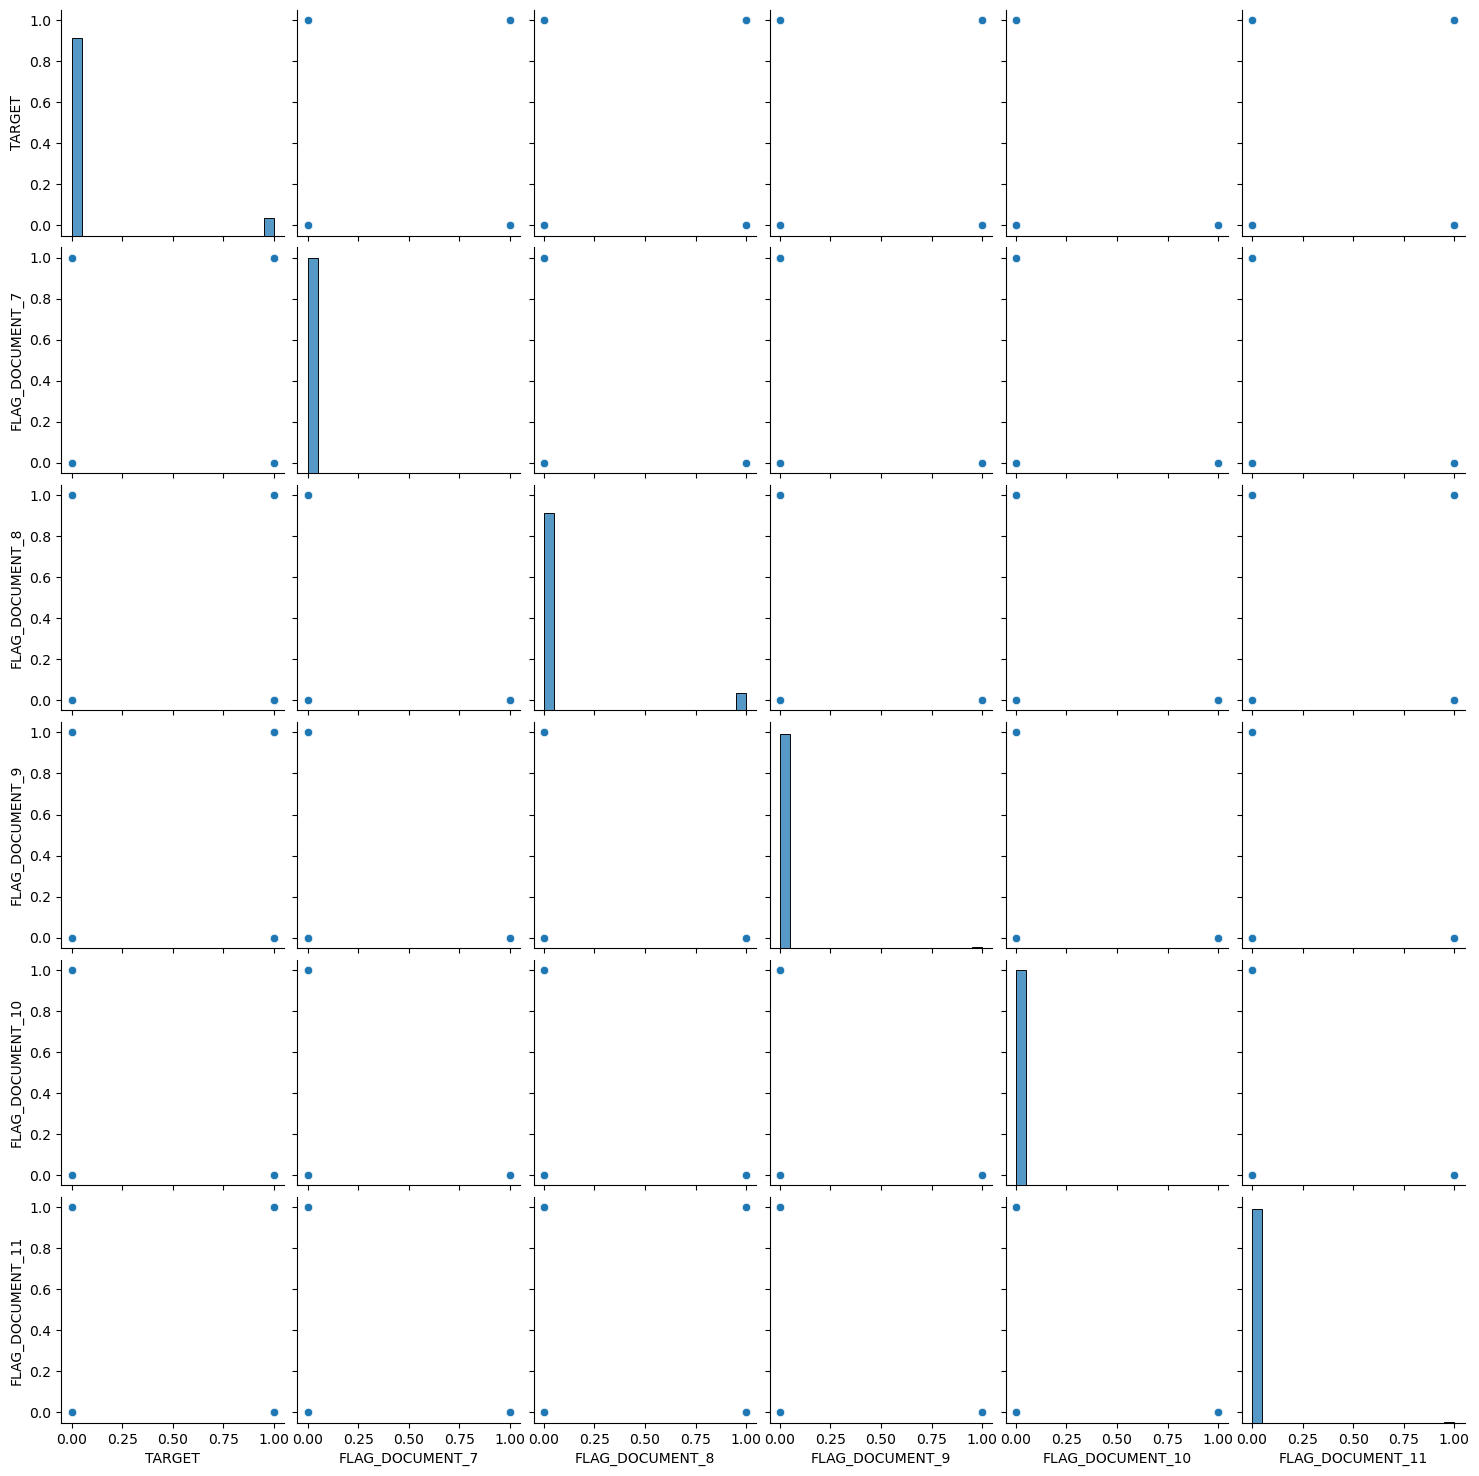

In [452]:
sns.pairplot(data=df2, vars=['TARGET','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11'])

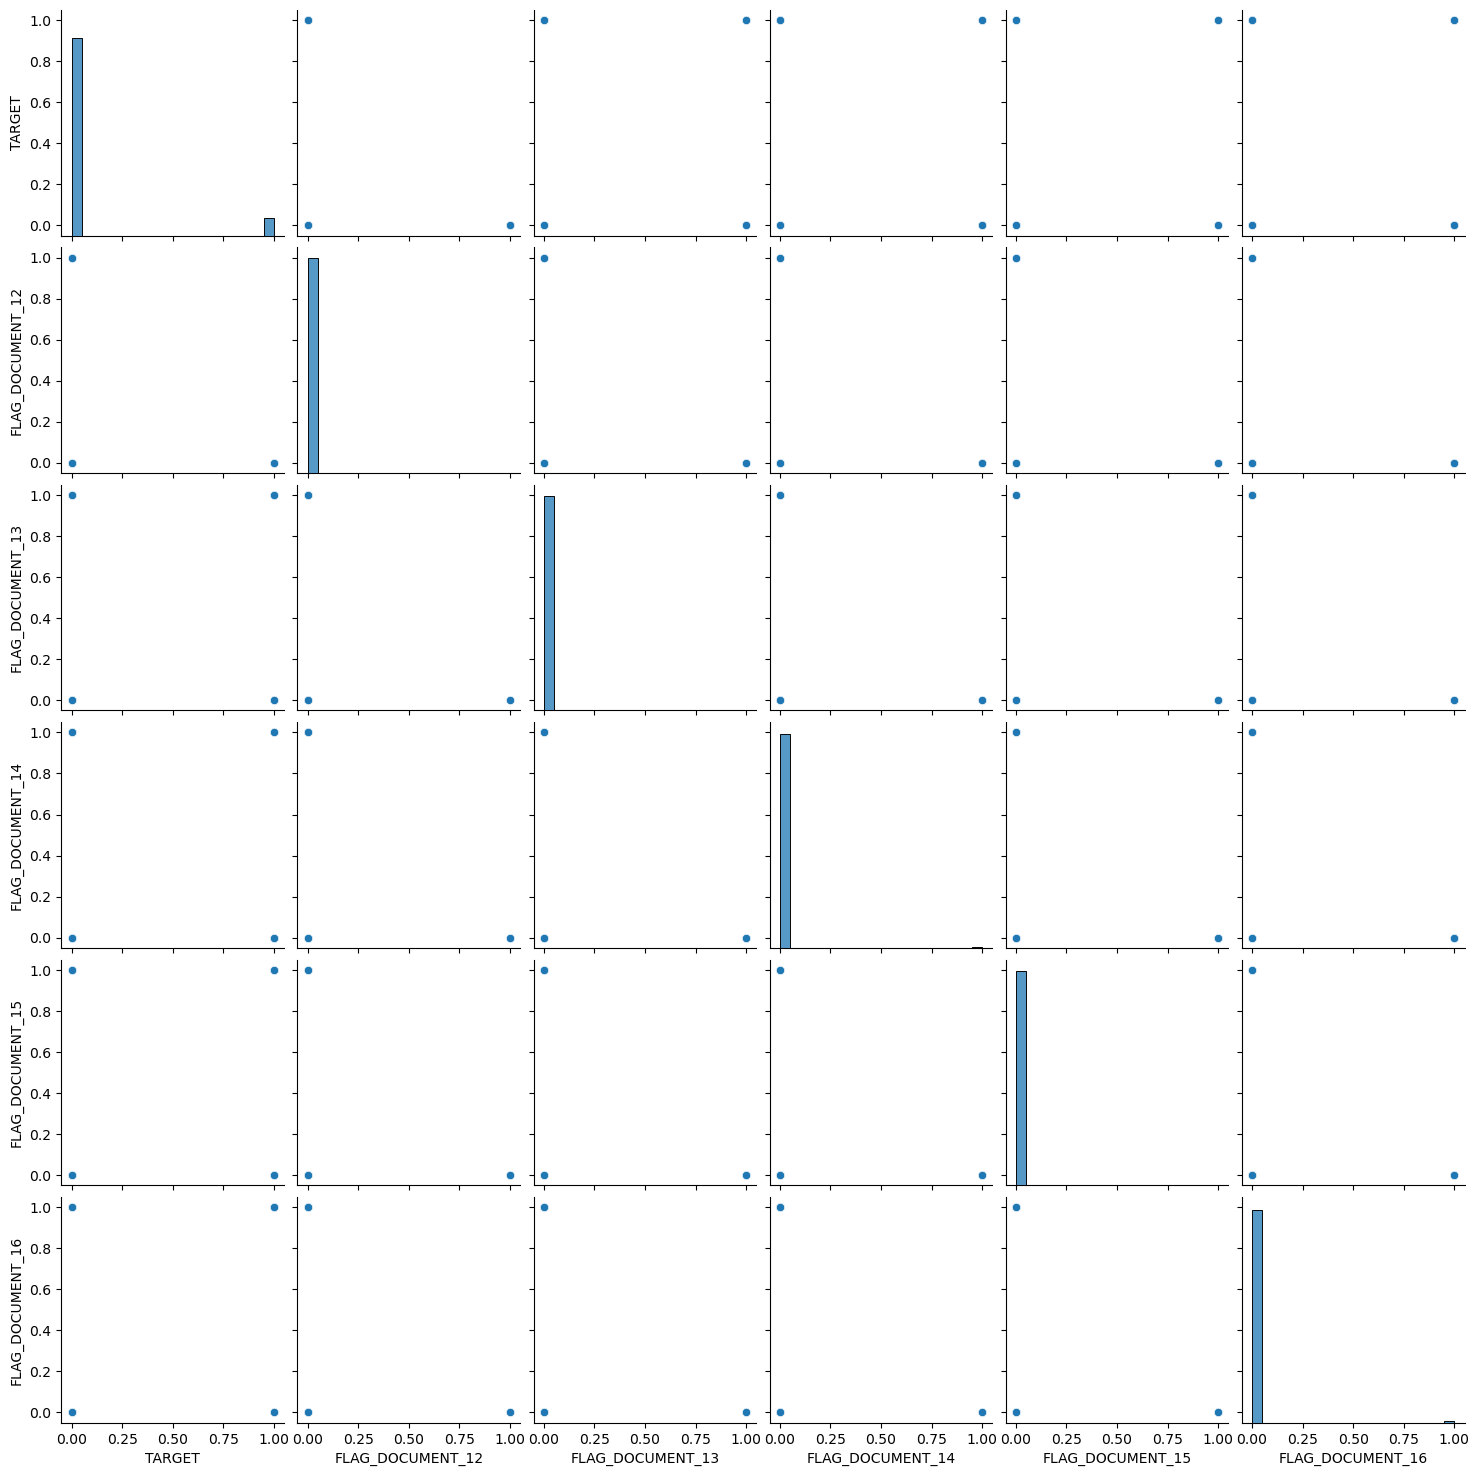

In [453]:
sns.pairplot(data=df2, vars=['TARGET','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16'])

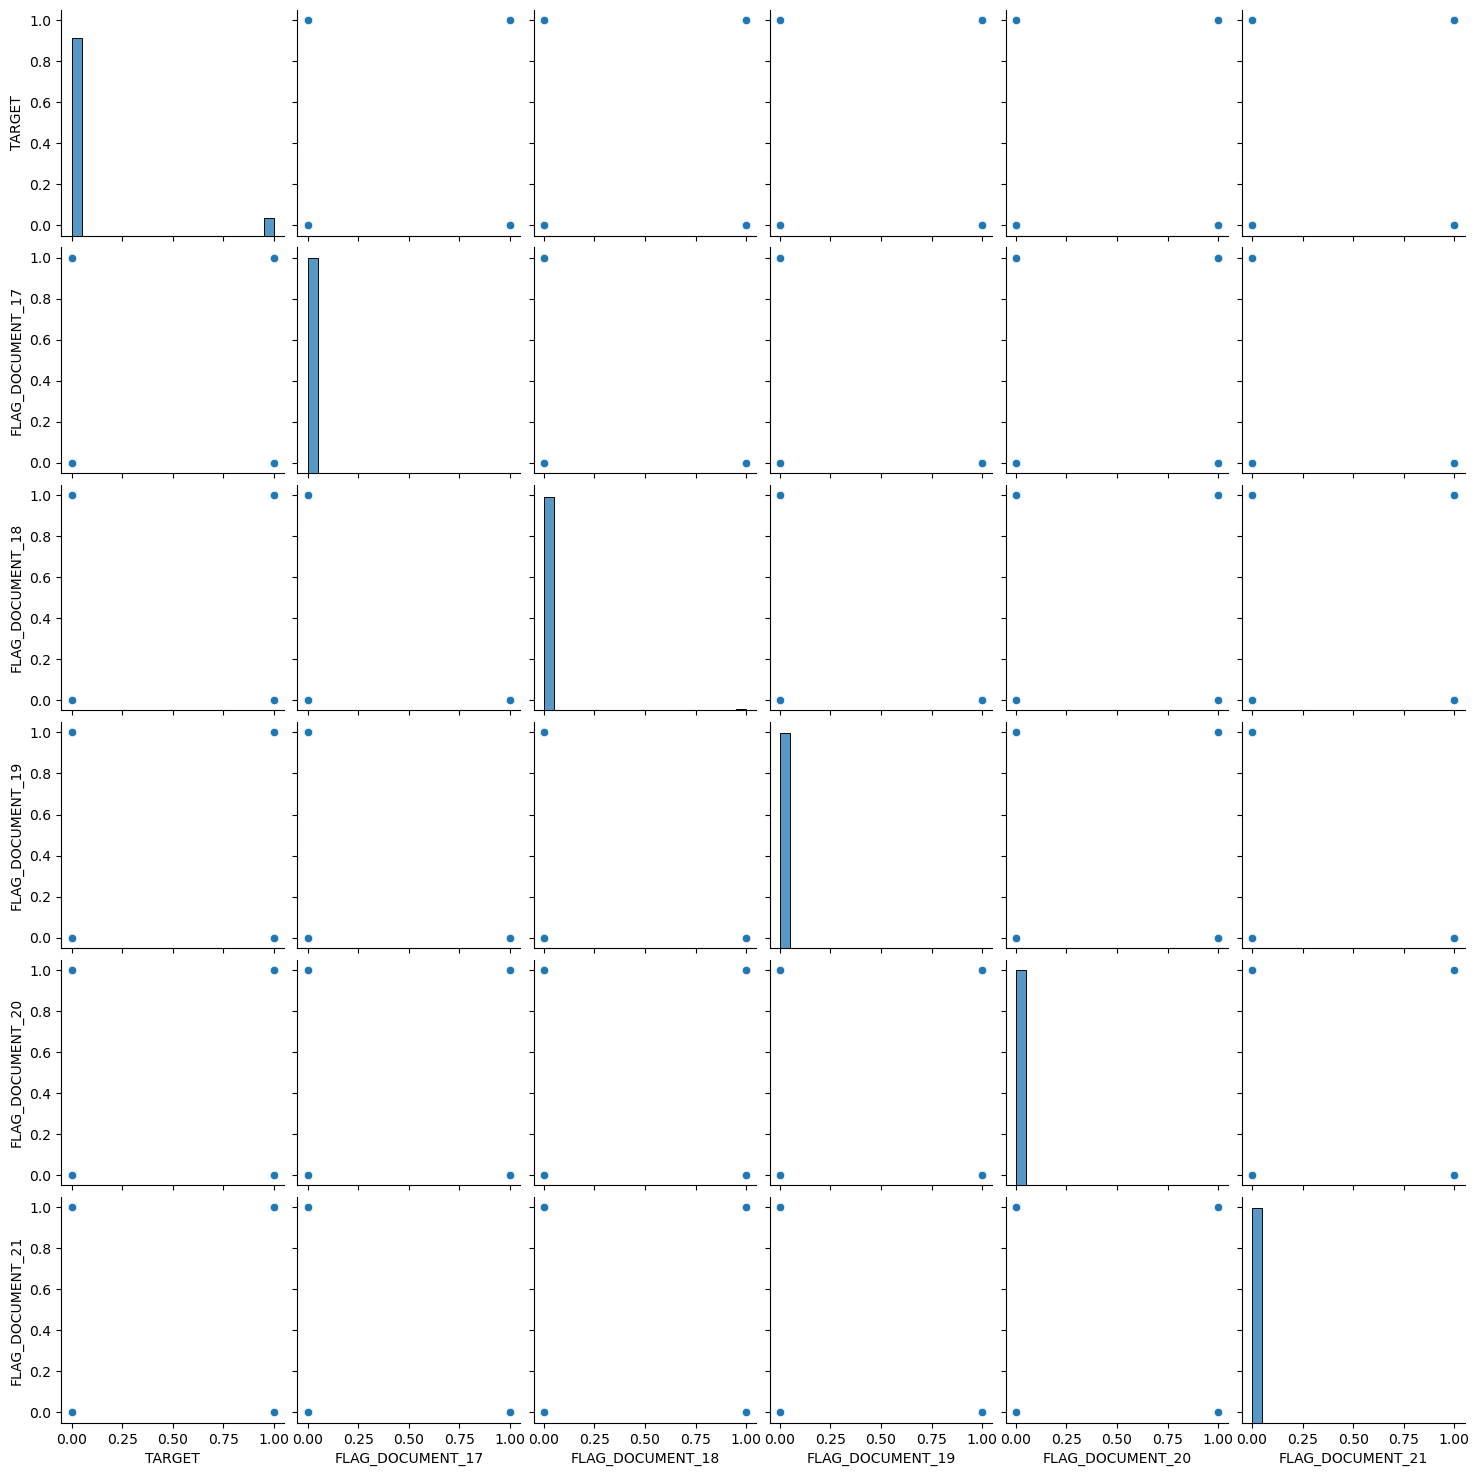

In [454]:
sns.pairplot(data=df2, vars=['TARGET','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'])

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - All of the FLAG_DOCUMENT variables are variables with 2 unique values: 1 and 0.
 - They provide information on whether the FLAG_DOCUMENTS were submitted (1) by the client or not (0).
 - There are 21 such documents.
 - Their value_counts show that for most of them, 90% values are 0 indicating the documents were not submitted.
 - After conducting pairplot analysis with the documents against the TARGET variable, we can see that no significant correlation has emerged between the documents and the TARGET variable.
 - Also, as they do not seem very relevant to the objective at hand, it makes sense to delete these FLAG_DOCUMENT variables.
</div>

In [456]:
# Dropping columns FLAG_DOCUMENT_2 / 3 / 4 / 5 / 6 / 7 / 8 / 9 / 10 / 11 / 12 / 13 / 14 / 15 / 16 / 17 / 18 / 19 / 20 /21
df2.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], axis=1, inplace=True)
df2.shape

(307507, 45)

### 8. REGION_RATING_CLIENT / REGION_RATING_CLIENT_W_CITYITY'

In [458]:
# Count of non-null values
df2[['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']].describe().round(2)

REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY
count             307507.00                    307507.00
mean                   2.05                         2.03
std                    0.51                         0.50
min                    1.00                         1.00
25%                    2.00                         2.00
50%                    2.00                         2.00
75%                    2.00                         2.00
max                    3.00                         3.00

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY columns are numerical variables with 'int64' dtype.
 - REGION_RATING_CLIENT column provides information on the company's rating of the region where client lives in terms of 1 /2 / 3.
 - REGION_RATING_CLIENT_W_CITY column provides information on the company's rating of the region where client lives, while taking city into account, in terms of 1 /2 / 3.
 - They have 307507 non-null values.
 - They have 3 unique values: 1, 2 and 3.

</div>

In [460]:
# Calculating value counts and the % of value counts of the columns
print(pd.concat([df2['REGION_RATING_CLIENT'].value_counts(), df2['REGION_RATING_CLIENT'].value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1))
print(pd.concat([df2['REGION_RATING_CLIENT_W_CITY'].value_counts(), df2['REGION_RATING_CLIENT_W_CITY'].value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1))

                      counts  normalized_counts
REGION_RATING_CLIENT                           
2                     226981          73.813279
3                      48329          15.716390
1                      32197          10.470331
                             counts  normalized_counts
REGION_RATING_CLIENT_W_CITY                           
2                            229481          74.626269
3                             43859          14.262765
1                             34167          11.110967


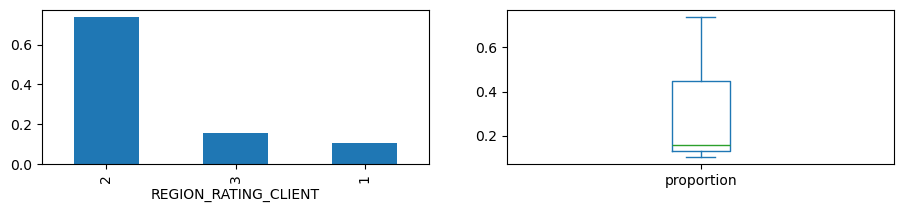

In [461]:
# Variable distribution through bar plot and boxplot for REGION_RATING_CLIENT
plt.figure(figsize=(11,2))
plt.subplot(1,2,1)
df2.REGION_RATING_CLIENT.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
df2.REGION_RATING_CLIENT.value_counts(normalize=True).plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 73.8% of the clients in the dataset are staying in regions rated as 2.
 - While 15.72% clients are staying in regions rated as 3. 
 - Only 10.47% of clients are staying in regions rated as 1.

</div>

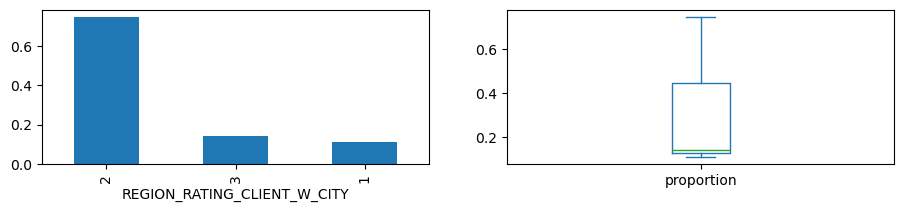

In [463]:
# Variable distribution through bar plot and boxplot for REGION_RATING_CLIENT_W_CITY
plt.figure(figsize=(11,2))
plt.subplot(1,2,1)
df2.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
df2.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True).plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 74.63% of the clients in the dataset are staying in regions rated as 2.
 - While 14.26% clients are staying in regions rated as 3. 
 - Only 11.11% of clients are staying in regions rated as 1.

</div>

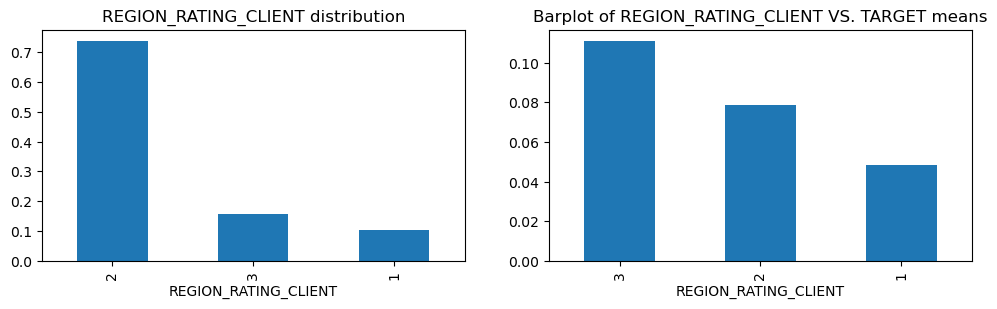

In [465]:
# Plotting the distribution and bar plot  of TARGET vs. REGION_RATING_CLIENT values 
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
df2.REGION_RATING_CLIENT.value_counts(normalize=True).plot.bar()
plt.title('REGION_RATING_CLIENT distribution')
plt.subplot(1,2,2)
df2.groupby('REGION_RATING_CLIENT')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of REGION_RATING_CLIENT VS. TARGET means')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - While only 15.72% clients are staying in regions rated as 3, they have defaulted the most on loan repayments than the clients in other 2 categories.
 - Clients staying in regions rated as 1 form 10.47% of the sample and are the lowest defaulters among the three categories. 
 - In general, the trend seems to be that the lower the rating of the region, the higher is the loan default and as the rating of the region goes up, the rate of default from the clients in the city goes down. 

</div>

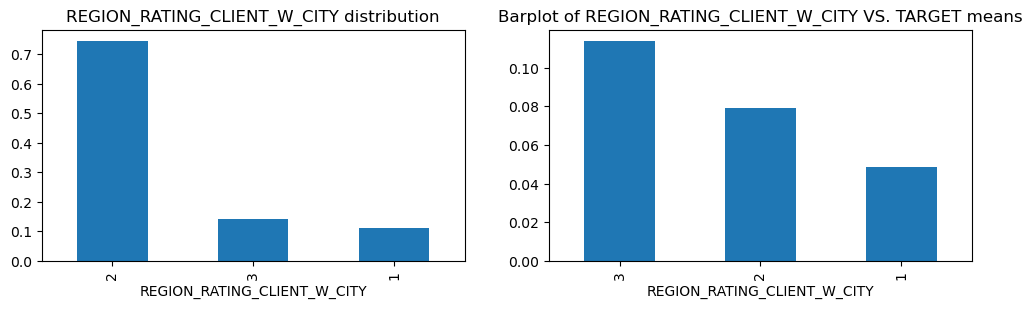

In [467]:
# Plotting the distribution and bar plot  of TARGET vs. REGION_RATING_CLIENT_W_CITY values 
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
df2.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True).plot.bar()
plt.title('REGION_RATING_CLIENT_W_CITY distribution')
plt.subplot(1,2,2)
df2.groupby('REGION_RATING_CLIENT_W_CITY')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of REGION_RATING_CLIENT_W_CITY VS. TARGET means')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - While only 14.27% clients are staying in regions rated as 3, they have defaulted the most on loan repayments than the clients in other 2 categories.
 - clients staying in regions rated as 1 form 11.11% of the sample and are the lowest defaulters among the three categories. 
 - In general, the trend seems to be that the lower the rating of the region, with the city, the higher is the loan default and as the rating of the region goes up, the rate of default from the clients in the city goes down. 

</div>

<div class="alert alert-block alert-info">
<b>Combined Insight</b>

 - Both the REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY columns seem to be correlated and are providing similar insights, so we can drop REGION_RATING_CLIENT as the other column seems to be providing more specific insights at the city level.

</div>

In [470]:
# Dropping column REGION_RATING_CLIENT from the dataframe
df2.drop(['REGION_RATING_CLIENT'], axis=1, inplace=True)
df2.shape

(307507, 44)

### 9. REG_REGION_NOT_LIVE_REGION / REG_REGION_NOT_WORK_REGION / LIVE_REGION_NOT_WORK_REGION / REG_CITY_NOT_LIVE_CITY / REG_CITY_NOT_WORK_CITY / LIVE_CITY_NOT_WORK_CITY

In [472]:
# Count of non-null values
df2[['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']].describe().round(2)

REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                   307507.00                   307507.00   
mean                         0.02                        0.05   
std                          0.12                        0.22   
min                          0.00                        0.00   
25%                          0.00                        0.00   
50%                          0.00                        0.00   
75%                          0.00                        0.00   
max                          1.00                        1.00   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
count                    307507.00               307507.00   
mean                          0.04                    0.08   
std                           0.20                    0.27   
min                           0.00                    0.00   
25%                           0.00                    0.00   
50%                           0.00                    0.00   
75%                           0.00                    0.00   
max                           1.00                    1.00   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  
count               307507.00                307507.00  
mean                     0.23                     0.18  
std                      0.42                     0.38  
min                      0.00                     0.00  
25%                      0.00                     0.00  
50%                      0.00                     0.00  
75%                      0.00                     0.00  
max                      1.00                     1.00

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - REG_REGION_NOT_LIVE_REGION / REG_REGION_NOT_WORK_REGION / LIVE_REGION_NOT_WORK_REGION / REG_CITY_NOT_LIVE_CITY / REG_CITY_NOT_WORK_CITY / LIVE_CITY_NOT_WORK_CITY columns are numerical variables with 'int64' dtype.
 - REG_REGION_NOT_LIVE_REGION column provides information on the company's flag if client's permanent address does not match the contact address in terms of 1 (different) and 0 (same), at region level.
 - REG_REGION_NOT_WORK_REGION column provides information on the company's flag if client's permanent address does not match the work address in terms of 1 (different) and 0 (same), at region level.
 - LIVE_REGION_NOT_WORK_REGION column provides information on the company's flag if client's contact address does not match the work address in terms of 1 (different) and 0 (same), at region level.
 - REG_CITY_NOT_LIVE_CITY column provides information on the company's flag if client's permanent address does not match the contact address in terms of 1 (different) and 0 (same), at city level.
 - REG_CITY_NOT_WORK_CITY column provides information on the company's flag if client's permanent address does not match the work address in terms of 1 (different) and 0 (same), at city level.
 - LIVE_CITY_NOT_WORK_CITY column provides information on the company's flag if client's contact address does not match the work address in terms of 1 (different) and 0 (same), at city level.
 - They have 307507 non-null values.
 - They have 2 unique values: 1 and 0.

</div>

In [474]:
# Calculating value counts and the % of value counts of the columns
print(pd.concat([df2['REG_REGION_NOT_LIVE_REGION'].value_counts(), df2['REG_REGION_NOT_LIVE_REGION'].value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1))
print(pd.concat([df2['REG_REGION_NOT_WORK_REGION'].value_counts(), df2['REG_REGION_NOT_WORK_REGION'].value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1))
print(pd.concat([df2['LIVE_REGION_NOT_WORK_REGION'].value_counts(), df2['LIVE_REGION_NOT_WORK_REGION'].value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1))
print(pd.concat([df2['REG_CITY_NOT_LIVE_CITY'].value_counts(), df2['REG_CITY_NOT_LIVE_CITY'].value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1))
print(pd.concat([df2['REG_CITY_NOT_WORK_CITY'].value_counts(), df2['REG_CITY_NOT_WORK_CITY'].value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1))
print(pd.concat([df2['LIVE_CITY_NOT_WORK_CITY'].value_counts(), df2['LIVE_CITY_NOT_WORK_CITY'].value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1))

                            counts  normalized_counts
REG_REGION_NOT_LIVE_REGION                           
0                           302850          98.485563
1                             4657           1.514437
                            counts  normalized_counts
REG_REGION_NOT_WORK_REGION                           
0                           291895          94.923042
1                            15612           5.076958
                             counts  normalized_counts
LIVE_REGION_NOT_WORK_REGION                           
0                            295004          95.934076
1                             12503           4.065924
                        counts  normalized_counts
REG_CITY_NOT_LIVE_CITY                           
0                       283468          92.182617
1                        24039           7.817383
                        counts  normalized_counts
REG_CITY_NOT_WORK_CITY                           
0                       236641          76.95467

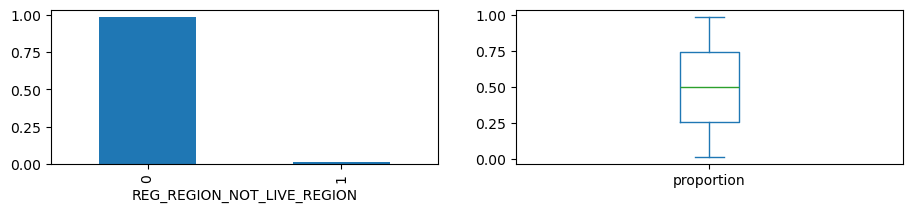

In [475]:
# Variable distribution through bar graph and boxplot for REG_REGION_NOT_LIVE_REGION
plt.figure(figsize=(11,2))
plt.subplot(1,2,1)
df2.REG_REGION_NOT_LIVE_REGION.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
df2.REG_REGION_NOT_LIVE_REGION.value_counts(normalize=True).plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - For 98.48% of the clients in the dataset, client's permanent address matches the contact address, at the region level.
 - While for 1.51% clients, the permanent address does not match the contact address. 

</div>

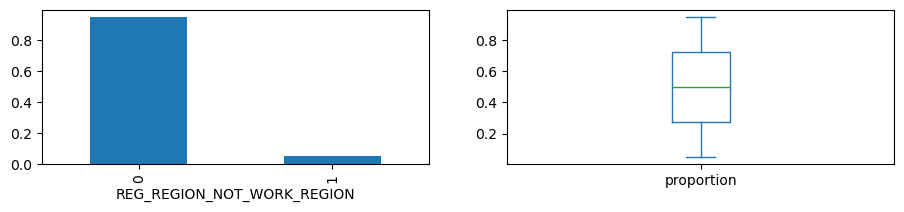

In [477]:
# Variable distribution through bar graph and boxplot for REG_REGION_NOT_WORK_REGION
plt.figure(figsize=(11,2))
plt.subplot(1,2,1)
df2.REG_REGION_NOT_WORK_REGION.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
df2.REG_REGION_NOT_WORK_REGION.value_counts(normalize=True).plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - For 94.92% of the clients in the dataset, client's permanent address matches the work address, at the region level.
 - While for 5.07% clients, the permanent address does not match the work address. 

</div>

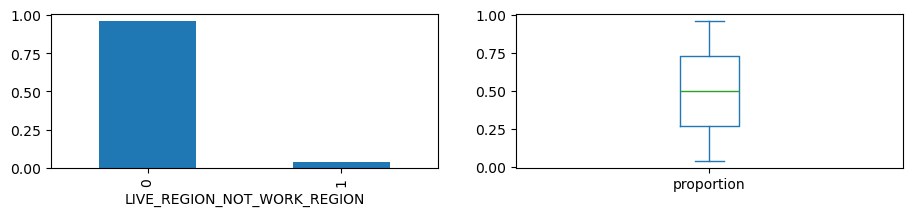

In [479]:
# Variable distribution through bar graph and boxplot for LIVE_REGION_NOT_WORK_REGION
plt.figure(figsize=(11,2))
plt.subplot(1,2,1)
df2.LIVE_REGION_NOT_WORK_REGION.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
df2.LIVE_REGION_NOT_WORK_REGION.value_counts(normalize=True).plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - For 95.93% of the clients in the dataset, client's contact address matches the work address, at the region level.
 - While for 4.07% clients, the contact address does not match the work address. 

</div>

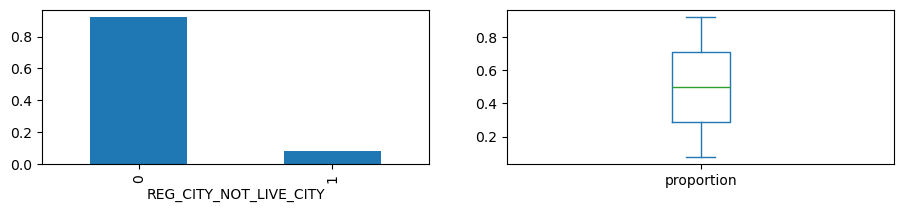

In [481]:
# Variable distribution through bar graph and boxplot for REG_CITY_NOT_LIVE_CITY
plt.figure(figsize=(11,2))
plt.subplot(1,2,1)
df2.REG_CITY_NOT_LIVE_CITY.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
df2.REG_CITY_NOT_LIVE_CITY.value_counts(normalize=True).plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - For 92.18% of the clients in the dataset, client's permanent address matches the contact address, at the city level.
 - While for 7.81% clients, the permanent address does not match the contact address. 

</div>

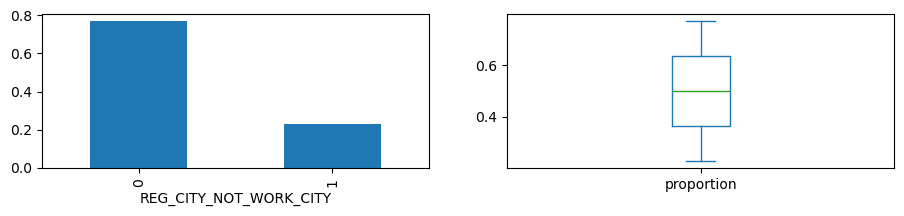

In [483]:
# Variable distribution through bar graph and boxplot for REG_CITY_NOT_WORK_CITY
plt.figure(figsize=(11,2))
plt.subplot(1,2,1)
df2.REG_CITY_NOT_WORK_CITY.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
df2.REG_CITY_NOT_WORK_CITY.value_counts(normalize=True).plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - For 76.95% of the clients in the dataset, client's permanent address matches the work address, at the city level.
 - While for 23.05% clients, the permanent address does not match the work address. 

</div>

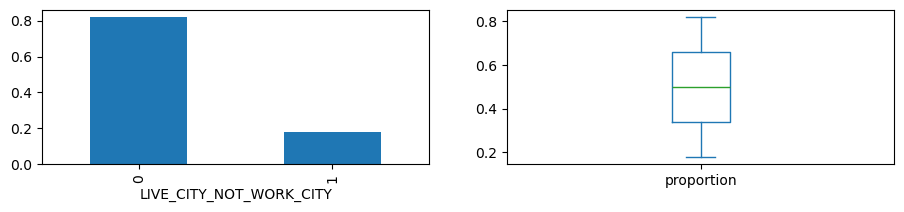

In [485]:
# Variable distribution through bar graph and boxplot for LIVE_CITY_NOT_WORK_CITY
plt.figure(figsize=(11,2))
plt.subplot(1,2,1)
df2.LIVE_CITY_NOT_WORK_CITY.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
df2.LIVE_CITY_NOT_WORK_CITY.value_counts(normalize=True).plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - For 82.04% of the clients in the dataset, client's contact address matches the work address, at the city level.
 - While for 82.04% clients, the contact address does not match the work address. 

</div>

In [487]:
# Using Spearman's Rho to check correlation between REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY

import scipy.stats as stats

rho1, p_value = stats.spearmanr(df2["REG_CITY_NOT_LIVE_CITY"], df2["REG_CITY_NOT_WORK_CITY"])
print("Spearman's rho for REG_CITY_NOT_LIVE_CITY & REG_CITY_NOT_WORK_CITY: ", rho1)
rho2, p_value = stats.spearmanr(df2["REG_CITY_NOT_WORK_CITY"], df2["LIVE_CITY_NOT_WORK_CITY"])
print("Spearman's rho for REG_CITY_NOT_WORK_CITY & LIVE_CITY_NOT_WORK_CITY: ", rho2)
rho3, p_value = stats.spearmanr(df2["REG_CITY_NOT_LIVE_CITY"], df2["LIVE_CITY_NOT_WORK_CITY"])
print("Spearman's rho for REG_CITY_NOT_LIVE_CITY & LIVE_CITY_NOT_WORK_CITY: ", rho3)

Spearman's rho for REG_CITY_NOT_LIVE_CITY & REG_CITY_NOT_WORK_CITY:  0.44041267088703634
Spearman's rho for REG_CITY_NOT_WORK_CITY & LIVE_CITY_NOT_WORK_CITY:  0.8255722262493098
Spearman's rho for REG_CITY_NOT_LIVE_CITY & LIVE_CITY_NOT_WORK_CITY:  0.028112791932277115


<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - As the REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY seem to be correlated and are providing similar insights, so we can drop REG_CITY_NOT_LIVE_CITY and LIVE_CITY_NOT_WORK_CITY as the REG_CITY_NOT_WORK_CITY column seems to having a stronger correlation with the other 2 columns.

</div>

In [489]:
# Dropping columns REG_CITY_NOT_LIVE_CITY and LIVE_CITY_NOT_WORK_CITY from the dataframe
df2.drop(['REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY'], axis=1, inplace=True)
df2.shape

(307507, 42)

In [490]:
# Using Spearman's Rho to check correlation between REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION and LIVE_REGION_NOT_WORK_REGION

rho1, p_value = stats.spearmanr(df2["REG_REGION_NOT_LIVE_REGION"], df2["REG_REGION_NOT_WORK_REGION"])
print("Spearman's rho for REG_REGION_NOT_LIVE_REGION & REG_REGION_NOT_WORK_REGION: ", rho1)
rho2, p_value = stats.spearmanr(df2["REG_REGION_NOT_WORK_REGION"], df2["LIVE_REGION_NOT_WORK_REGION"])
print("Spearman's rho for REG_REGION_NOT_WORK_REGION & LIVE_REGION_NOT_WORK_REGION: ", rho2)
rho3, p_value = stats.spearmanr(df2["REG_REGION_NOT_LIVE_REGION"], df2["LIVE_REGION_NOT_WORK_REGION"])
print("Spearman's rho for REG_REGION_NOT_LIVE_REGION & LIVE_REGION_NOT_WORK_REGION: ", rho3)

Spearman's rho for REG_REGION_NOT_LIVE_REGION & REG_REGION_NOT_WORK_REGION:  0.45080358244586616
Spearman's rho for REG_REGION_NOT_WORK_REGION & LIVE_REGION_NOT_WORK_REGION:  0.8606266975786475
Spearman's rho for REG_REGION_NOT_LIVE_REGION & LIVE_REGION_NOT_WORK_REGION:  0.08826248655848462


<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - As the REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION and LIVE_REGION_NOT_WORK_REGION seem to be correlated and are providing similar insights, so we can drop REG_REGION_NOT_LIVE_REGION and LIVE_REGION_NOT_WORK_REGION as REG_REGION_NOT_WORK_REGION column seems to having a stronger correlation with the other 2 columns.

</div>

In [492]:
# Dropping columns REG_REGION_NOT_LIVE_REGION and LIVE_REGION_NOT_WORK_REGION from the dataframe
df2.drop(['REG_REGION_NOT_LIVE_REGION','LIVE_REGION_NOT_WORK_REGION'], axis=1, inplace=True)
df2.shape

(307507, 40)

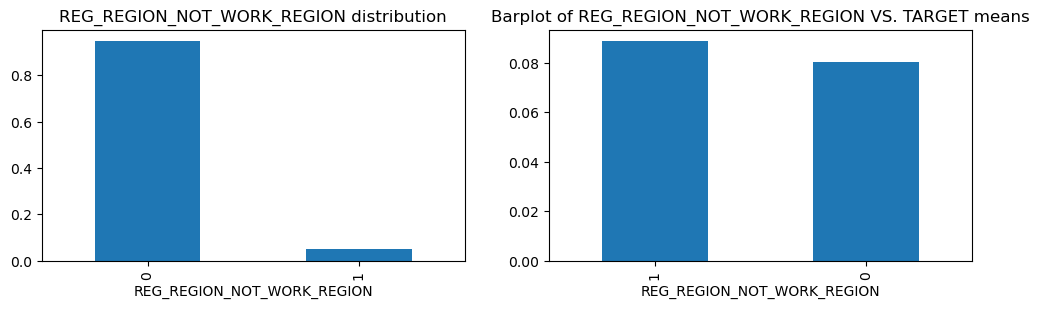

In [493]:
# Plotting the distribution and bar plot  of TARGET vs. REG_REGION_NOT_WORK_REGION values 
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
df2.REG_REGION_NOT_WORK_REGION.value_counts(normalize=True).plot.bar()
plt.title('REG_REGION_NOT_WORK_REGION distribution')
plt.subplot(1,2,2)
df2.groupby('REG_REGION_NOT_WORK_REGION')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of REG_REGION_NOT_WORK_REGION VS. TARGET means')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The smaller sample of 5.07% clients, for whom the permanent address does not match the work address, at the region level, have defaulted more on loan repayments than the clients in other category.
 - The larger sample of 94.92% of the clients, for whom the permanent address matches the work address, are the lesser defaulters among the two categories. 
 
</div>

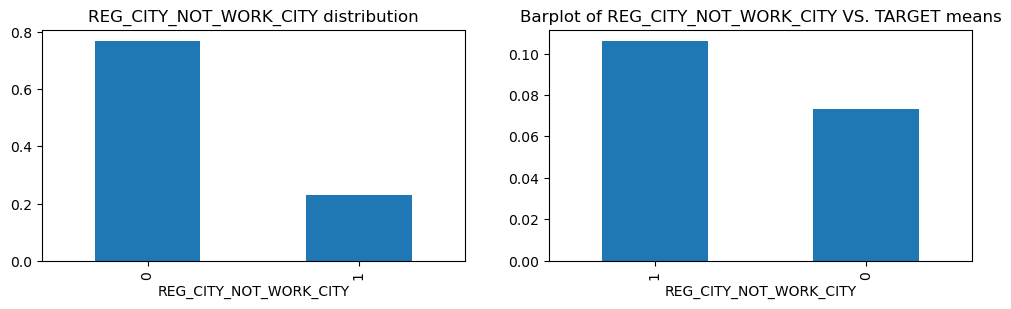

In [495]:
# Plotting the distribution and bar plot  of TARGET vs. REG_CITY_NOT_WORK_CITY values 
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
df2.REG_CITY_NOT_WORK_CITY.value_counts(normalize=True).plot.bar()
plt.title('REG_CITY_NOT_WORK_CITY distribution')
plt.subplot(1,2,2)
df2.groupby('REG_CITY_NOT_WORK_CITY')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of REG_CITY_NOT_WORK_CITY VS. TARGET means')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The smaller sample of 23.04% clients, for whom the permanent address does not match the work address, at the city level, have defaulted more on loan repayments than the clients in other category.
 - The larger sample of 76.95% of the clients, for whom the permanent address matches the work address, are the lesser defaulters among the two categories. 
 
</div>

<div class="alert alert-block alert-info">
<b>Combined Insight</b>

 - In general, from the above columns we can see that a lack of match between the permanent, contact and work address is leading to higher client defaults in loan repayments.
 - So the loan company can focus more on clients for whom there is complete match between the three addresses or charge more interest while giving loans to customers for whom the three addresses are not matching. 

</div>

### 10. REGION_POPULATION_RELATIVE

In [499]:
# Count of non-null values
df2['REGION_POPULATION_RELATIVE'].describe().round(2)

count    307507.00
mean          0.02
std           0.01
min           0.00
25%           0.01
50%           0.02
75%           0.03
max           0.07
Name: REGION_POPULATION_RELATIVE, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - REGION_POPULATION_RELATIVE column is a numerical variable with 'float64' dtype.
 - It refers to the normalized population of region where client lives (higher number means the client lives in more populated region).
 - It has 307507 non-null values.
 - Its mean and median values are the same. Though it seems to be having a gradual increase in values till the 75th percentile, there is a sudden jump from 75th percentile to the max value.
 - This indicates presence of outliers.  
 
</div>

In [501]:
# Calculating value counts and the % of value counts of the columns
pd.concat([df2['REGION_POPULATION_RELATIVE'].value_counts(), df2['REGION_POPULATION_RELATIVE'].value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1)

counts  normalized_counts
REGION_POPULATION_RELATIVE                           
0.035792                     16408           5.335813
0.046220                     13442           4.371283
0.030755                     12163           3.955357
0.025164                     11950           3.886090
0.026392                     11601           3.772597
0.031329                     11321           3.681542
0.028663                     11157           3.628210
0.019101                      8694           2.827253
0.072508                      8412           2.735547
0.020713                      8066           2.623030
0.018850                      7668           2.493602
0.020246                      7177           2.333931
0.018634                      7038           2.288728
0.022625                      6943           2.257835
0.015221                      6823           2.218811
0.032561                      6636           2.158000
0.024610                      6404           2.082554
0.019689                      6172           2.007109
0.018029                      6167           2.005483
0.018801                      6108           1.986296
0.018209                      6052           1.968085
0.014520                      4785           1.556062
0.016612                      4408           1.433463
0.007020                      4104           1.334604
0.022800                      3807           1.238021
0.010032                      3570           1.160949
0.010006                      3563           1.158673
0.014464                      3422           1.112820
0.004960                      3300           1.073146
0.011703                      3252           1.057537
0.010966                      3110           1.011359
0.011657                      3080           1.001603
0.010147                      3079           1.001278
0.010643                      3011           0.979165
0.007330                      2980           0.969084
0.007120                      2861           0.930385
0.006629                      2818           0.916402
0.009175                      2770           0.900793
0.010500                      2680           0.871525
0.010276                      2601           0.845834
0.009657                      2467           0.802258
0.006852                      2435           0.791852
0.008625                      2290           0.744698
0.009630                      2252           0.732341
0.010556                      2177           0.707951
0.009334                      2083           0.677383
0.007305                      2017           0.655920
0.006207                      1936           0.629579
0.009549                      1834           0.596409
0.008019                      1819           0.591531
0.008230                      1804           0.586653
0.006008                      1796           0.584052
0.003069                      1783           0.579824
0.008575                      1763           0.573320
0.008474                      1740           0.565841
0.007274                      1724           0.560638
0.007114                      1684           0.547630
0.006305                      1672           0.543727
0.008068                      1668           0.542427
0.008866                      1654           0.537874
0.006671                      1653           0.537549
0.002042                      1642           0.533972
0.003813                      1616           0.525516
0.005084                      1482           0.481940
0.006296                      1225           0.398365
0.005313                      1218           0.396089
0.003818                      1212           0.394137
0.003122                      1147           0.373000
0.006233                      1087           0.353488
0.005002                      1068           0.347309
0.002134                      1051           0.341781
0.004849                      1038           0.337553
0.005144                       9

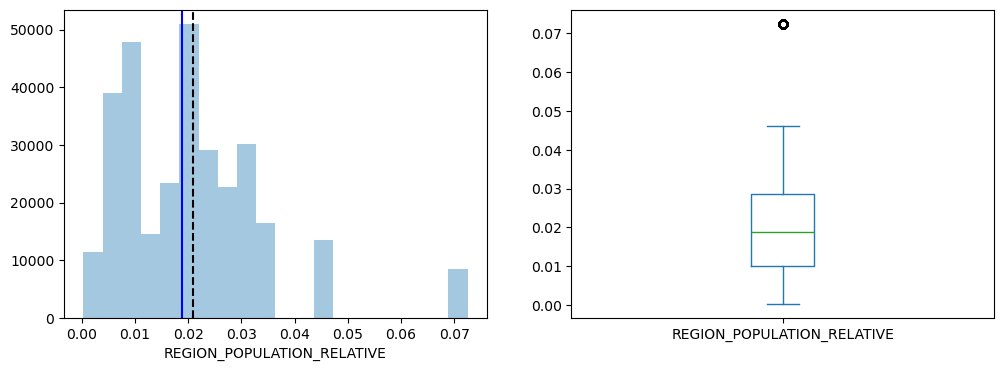

In [502]:
# Variable distribution through histogram and boxplot for REGION_POPULATION_RELATIVE
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df2.REGION_POPULATION_RELATIVE, kde=False, bins=20)
plt.axvline(df2.REGION_POPULATION_RELATIVE.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df2.REGION_POPULATION_RELATIVE.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df2.REGION_POPULATION_RELATIVE.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The column seems to have a very scattered distribution and some outliers due to which we are not able to visualize the rest of the data properly. 
 - Lets examine these records.
 
</div>

In [504]:
# Examining the outliers in the column
df2[df2.REGION_POPULATION_RELATIVE == df2.REGION_POPULATION_RELATIVE.max()].shape

(8412, 40)

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There seem to be 8412 such clients in the column who fall in the outlier category. We cannot drop these records as they provide insight about the clients living in very dense regions. 
 - Lets cap these records to the upper limit.
 
</div>

In [506]:
q1 = df2.REGION_POPULATION_RELATIVE.describe()['25%']
q3 = df2.REGION_POPULATION_RELATIVE.describe()['75%']
upper_limit_pop=q3+(1.5*(q3-q1))
upper_limit_pop

0.056648500000000004

In [507]:
df2['REGION_POPULATION_RELATIVE'] = np.where(df2.REGION_POPULATION_RELATIVE>=upper_limit_pop, upper_limit_pop,df2.REGION_POPULATION_RELATIVE)

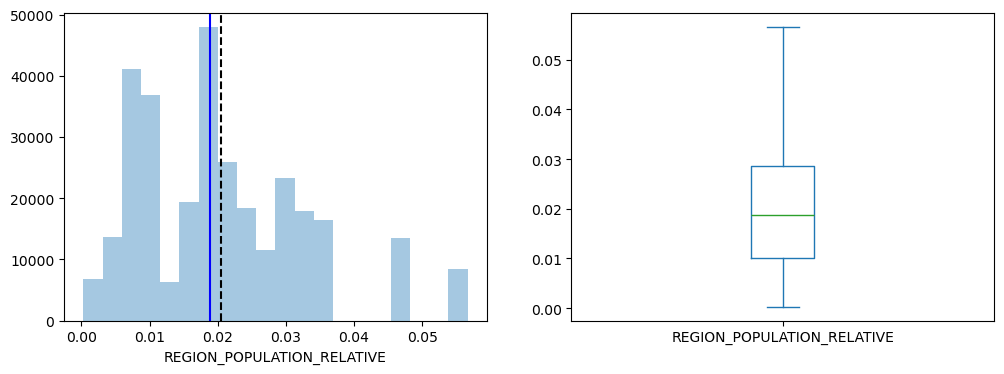

In [508]:
# Variable distribution through histogram and boxplot for REGION_POPULATION_RELATIVE
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df2.REGION_POPULATION_RELATIVE, kde=False, bins=20)
plt.axvline(df2.REGION_POPULATION_RELATIVE.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df2.REGION_POPULATION_RELATIVE.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df2.REGION_POPULATION_RELATIVE.plot.box()
plt.show()

In [509]:
# Creating REGION_POPULATION_RELATIVE bins and assigning them to new category 'POP_GROUP'
df2['POP_GROUP'] = pd.cut(df2.REGION_POPULATION_RELATIVE, [0.0,0.01,0.02,0.03,0.04,0.05,999], labels=['<0.01','0.01-0.02','0.02-0.03','0.03-0.04','0.04-0.05','0.05+'])

In [510]:
df2.POP_GROUP.value_counts(normalize=True)

POP_GROUP
0.01-0.02    0.316936
<0.01        0.242466
0.02-0.03    0.218223
0.03-0.04    0.151307
0.04-0.05    0.043713
0.05+        0.027355
Name: proportion, dtype: float64

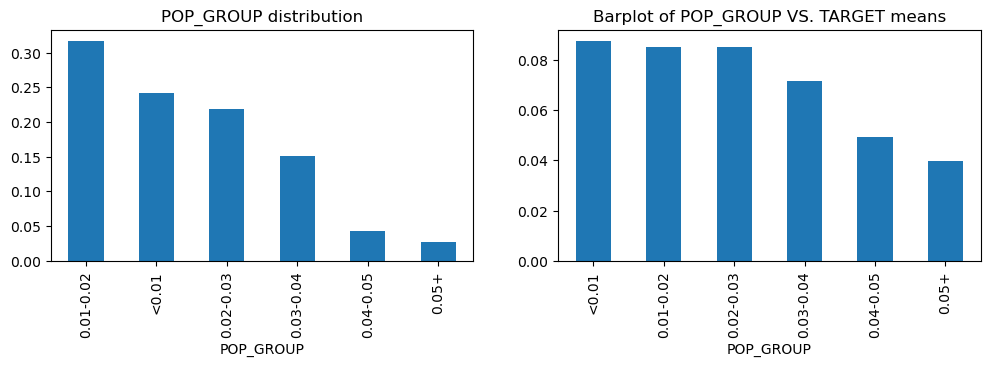

In [511]:
# Plotting the distribution and bar plot  of TARGET vs. POP_GROUP values 
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
df2.POP_GROUP.value_counts(normalize=True).plot.bar()
plt.title('POP_GROUP distribution')
plt.subplot(1,2,2)
df2.groupby('POP_GROUP')['TARGET'].mean().sort_values(ascending=False).plot.bar()
plt.title('Barplot of POP_GROUP VS. TARGET means')
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - We can see from the graphs above that in general, the distribution and default rate follow a similar pattern in the REGION_POPULATION_RELATIVE column.
 - The largest sample of the clients belong to the 0.01-0.02 and <0.01 (low) density areas and they are the highest defaulters as well.
 - The smallest sample of the clients belong to the 0.04-0.05 and 0.05+ (high) density areas and they are the lowest defaulters as well.
 - Thus, the loan company should focus on procuring more clients from higher density areas and minimizing the clients from the low density areas.
 
</div>

## BIVARIATE and MULTIVARIATE ANALYSIS

In [514]:
# Analysis of 2 or more variable at a time

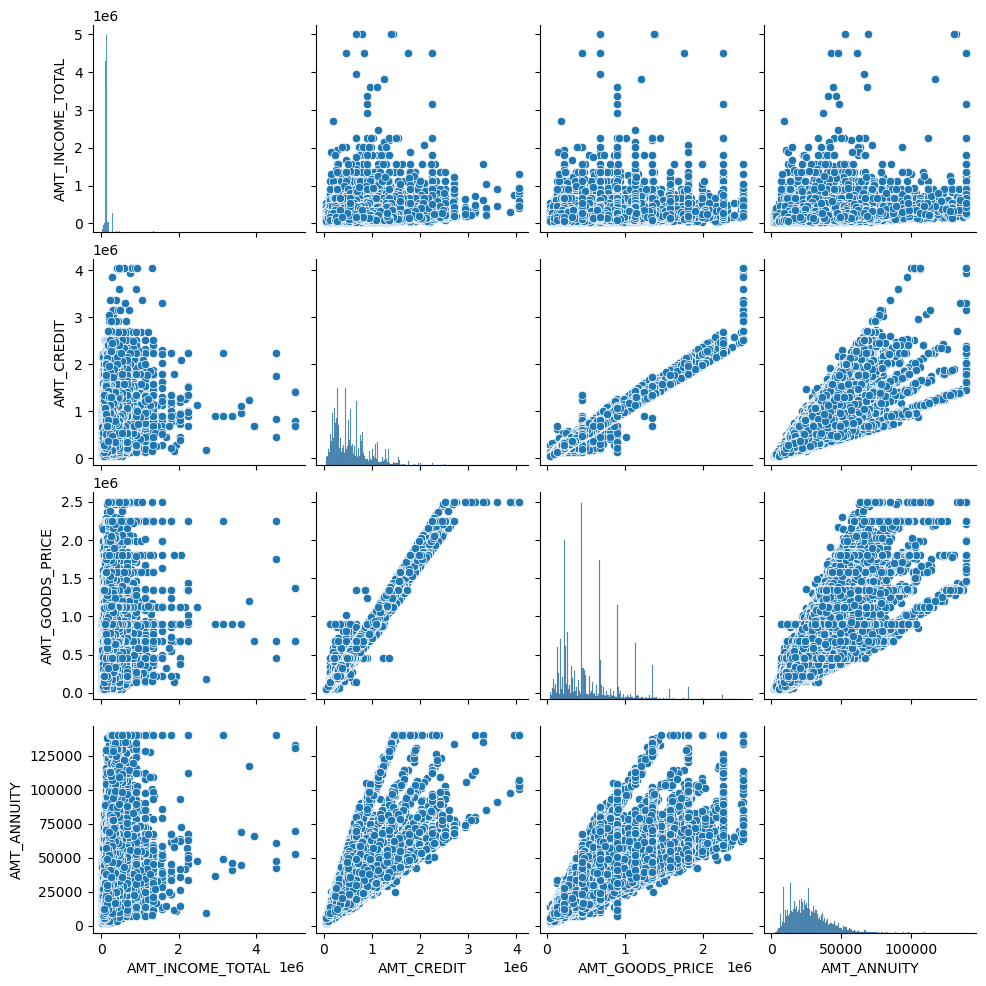

In [515]:
# Analysing the relationship between 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE' and 'AMT_ANNUITY' variables

sns.pairplot(data=df2, vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY'])
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - There seems to be a strong positive correlation between AMT_CREDIT and AMT_GOODS_PRICE as for consumer loans, the amount credited is equal to the price of the goods which are being purchased by the client.
 - There seems to be strong positive correlation between AMT_ANNUITY and AMT_CREDIT as AMT_ANNUITY figures are derived from the AMT_CREDIT based on the loan tenure.
 - AMT_ANNUITY and AMT_GOODS_PRICE also share a positive correlation for the same reasons as mentioned above.
 
</div>

In [517]:
# Analysing the relationship between 'NAME_TYPE_SUITE','INCOME_GRP' and 'AMT_CREDIT' 

res = pd.pivot_table(data = df2, index = 'NAME_TYPE_SUITE', columns = 'INCOME_GRP', values = 'AMT_CREDIT') 
res

INCOME_GRP              <99000   99000-135000  135000-162000  162000-225000  \
NAME_TYPE_SUITE                                                               
Children         402455.562323  565088.967290  659814.756677  714586.864865   
Family           406436.355385  541578.480276  627906.549909  723591.028362   
Group of people  372954.559701  574674.157895  606774.240000  717698.671875   
Other_A          380043.304688  485717.483871  577401.683168  747503.630769   
Other_B          361464.252632  511695.008427  605265.545455  670648.487903   
Spouse, partner  441672.039851  588961.819064  687397.120177  774062.195282   
Unaccompanied    380879.103785  505532.245220  593113.709504  687127.588212   

INCOME_GRP             225000+  
NAME_TYPE_SUITE                 
Children         888600.018987  
Family           903990.873691  
Group of people  643429.730769  
Other_A          915333.000000  
Other_B          853270.232984  
Spouse, partner  961030.667149  
Unaccompanied    878004.784994

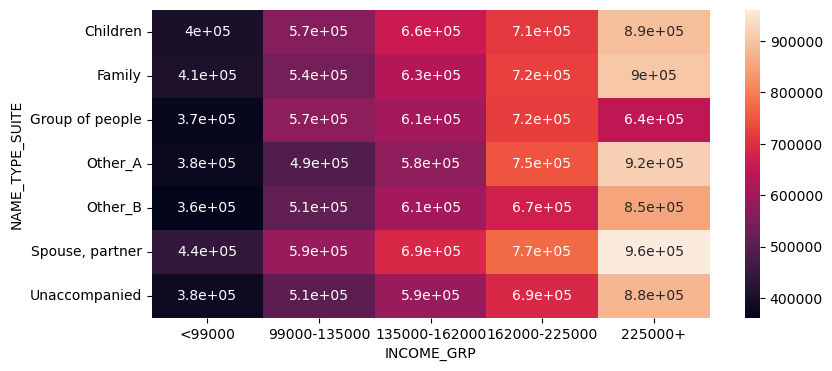

In [518]:
plt.figure(figsize=(9,4))
sns.heatmap(res, annot=True)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AMT_CREDIT is least in case of low income clients and the client is accompanied by a group of people or non-family members. 
 - On the other hand, AMT_CREDIT is highest in case of high income clients in general.
 - Across all income groups, the AMT_CREDIT is highest when the client is accompanied by Spouse / partner.
 - In some cases, it is also high when the client is accompanied by Other_A, who seems to be a co-applicant for the loan.  
 
</div>

In [520]:
# Analysing the relationship between 'AGE_GROUP','INCOME_GRP' and 'TARGET' 

res1 = pd.pivot_table(data = df2, index = 'AGE_GROUP', columns = 'INCOME_GRP', values = 'TARGET') 
res1

INCOME_GRP    <99000  99000-135000  135000-162000  162000-225000   225000+
AGE_GROUP                                                                 
<30         0.127309      0.123649       0.119824       0.106169  0.078730
30-40       0.108260      0.101114       0.106982       0.092053  0.074043
40-50       0.082646      0.080932       0.080934       0.075845  0.062846
50-60       0.057870      0.063452       0.059798       0.066361  0.055489
60+         0.049621      0.049377       0.053514       0.048573  0.043534

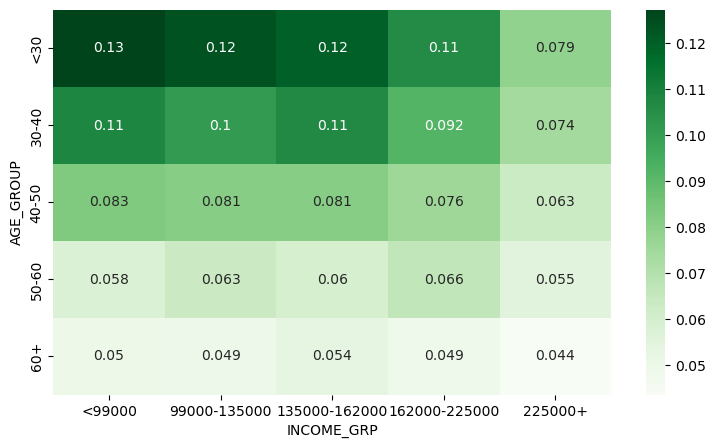

In [521]:
plt.figure(figsize=(9,5))
sns.heatmap(res1, cmap='Greens', annot=True)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The default rate seems to be the highest in case of clients in <30 yrs age group for the lowest income category.
 - The default rate seems to be decreasing as the age group and the income level increases. 
 - The 50-60 and 60+ age group seems to have low default rate across income groups and thus, the loan company should target them more as potential clients.   
 
</div>

In [523]:
# Analysing the relationship between 'NAME_FAMILY_STATUS','INCOME_GRP' and 'TARGET' 

res2 = pd.pivot_table(data = df2, index = 'NAME_FAMILY_STATUS', columns = 'INCOME_GRP', values = 'TARGET') 
res2

INCOME_GRP              <99000  99000-135000  135000-162000  162000-225000  \
NAME_FAMILY_STATUS                                                           
Civil marriage        0.101794      0.101930       0.108737       0.101065   
Married               0.078894      0.080529       0.079940       0.074930   
Separated             0.075842      0.088214       0.090628       0.081286   
Single / not married  0.102724      0.104784       0.108554       0.094958   
Widow                 0.055178      0.059900       0.055648       0.066844   

INCOME_GRP             225000+  
NAME_FAMILY_STATUS              
Civil marriage        0.080914  
Married               0.060986  
Separated             0.073009  
Single / not married  0.074711  
Widow                 0.048847

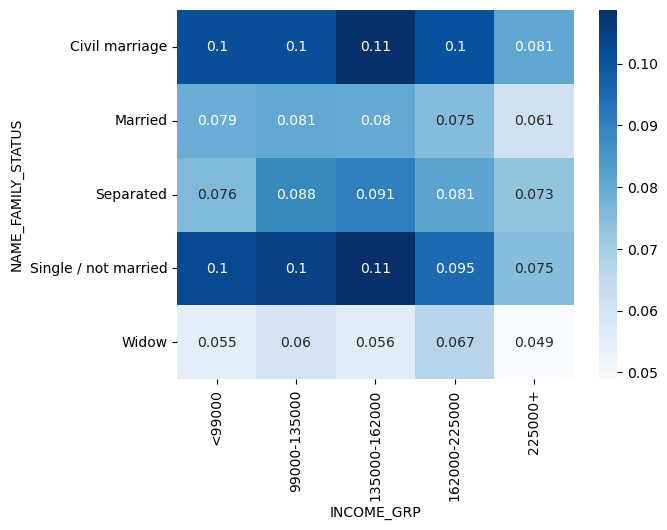

In [524]:
sns.heatmap(res2, cmap='Blues', annot=True)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The default rate seems to be the highest in case of clients with Civil Marriage and Single/ not married status across income groups and peaks for the medium income group (135000-162000).
 - The default rate seems to be increasing from very low income group (<99000) to the medium income group (135000-162000) and thereafter decreasing as we move towards the very high income group(225000+). 
 - Clients with Widow and Married status seems to be have low default rate across income groups and is the lowest for Widows in the very high income group(225000+). The loan company should target them more as potential clients.   
 
</div>

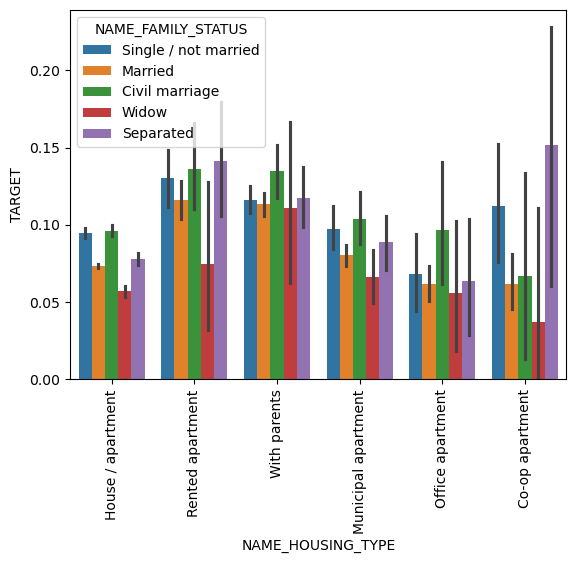

In [526]:
# Analysing the relationship between 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE' and 'TARGET' 

sns.barplot(x = df2.NAME_HOUSING_TYPE, y=df2.TARGET, hue=df2.NAME_FAMILY_STATUS)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - In general, the default rate seems to be the highest in case of clients with Civil Marriage across all housing situations except in case of Rented Apartment and Co-op apartment, where they are overtaken by clients with Separated status.
 - Clients with Civil Marriage, Separated and Single/ not married status together seem to be top defaulters across different housing situations. 
 - Clients who are separated and staying in a Co-op apartment seem to having the highest default rate among all categories of housing and marital statuses.
 - Clients with Widow status and staying in a Co-op apartment seem to having the lowest default rate among all categories of housing and marital statuses.
 - In general, clients with Widow and Married status seem to have low default rate across housing situations and is esp low in case they are staying in House / apartment , Office apartment or Co-op apartment. 
 
</div>

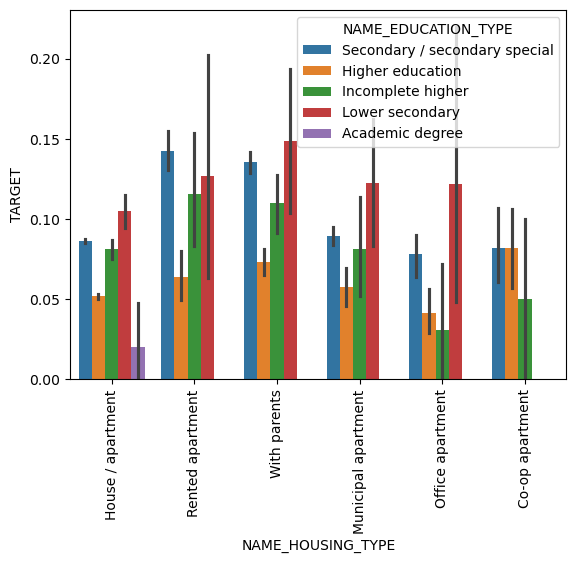

In [528]:
# Analysing the relationship between 'NAME_HOUSING_TYPE','TARGET' and 'NAME_EDUCATION_TYPE' 

sns.barplot(x = df2.NAME_HOUSING_TYPE, y=df2.TARGET, hue=df2.NAME_EDUCATION_TYPE)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - In general, the default rate seems to be the highest in case of clients with Lower Secondary education across all housing situations except in case Co-op apartment, as they do not seem to be staying in these kind of apartments.
 - Clients with Lower Secondary and Secondary/secondary special education together seem to be top defaulters across different housing situations. 
 - Clients with Lower Secondary education and staying with parents seem to having the highest default rate among all categories of housing and educational statuses.
 - Clients with Academic degree and staying in a House/ apartment seem to having the lowest default rate among all categories of housing and educational statuses.
 - In general, clients with Academic degree and Higher education seem to have low default rate across housing situations and is esp low in case they are staying in House / apartment or Office apartment. 
 
</div>

In [530]:
# Analysing the relationship between 'REGION_RATING_CLIENT_W_CITY','NAME_EDUCATION_TYPE' and 'TARGET' 

res4 = pd.pivot_table(data = df2, index = 'REGION_RATING_CLIENT_W_CITY', columns = 'NAME_EDUCATION_TYPE', values = 'TARGET') 
res4

NAME_EDUCATION_TYPE          Academic degree  Higher education  \
REGION_RATING_CLIENT_W_CITY                                      
1                                   0.025641          0.033673   
2                                   0.010204          0.053355   
3                                   0.037037          0.078735   

NAME_EDUCATION_TYPE          Incomplete higher  Lower secondary  \
REGION_RATING_CLIENT_W_CITY                                       
1                                     0.059312         0.076046   
2                                     0.081009         0.104006   
3                                     0.134602         0.142857   

NAME_EDUCATION_TYPE          Secondary / secondary special  
REGION_RATING_CLIENT_W_CITY                                 
1                                                 0.056008  
2                                                 0.086911  
3                                                 0.123560

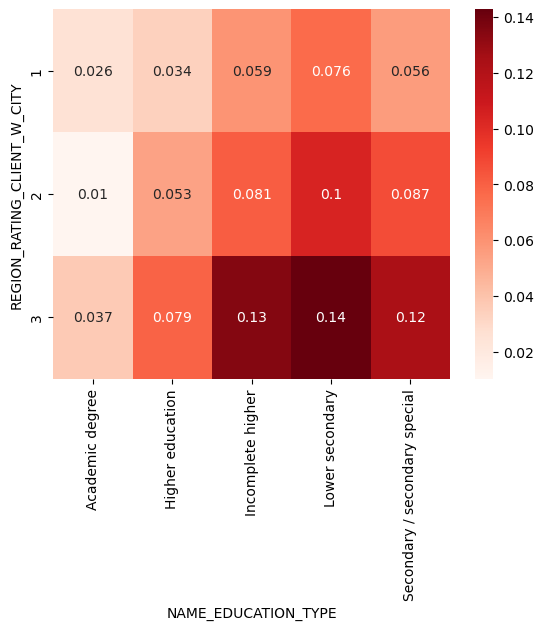

In [531]:
sns.heatmap(res4, cmap='Reds', annot=True)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The highest defaulters in this graph are clients with a Lower secondary education staying in Tier 3 city, while the lowest defaulters are those with Academic degree education and staying in Tier 2 city.
 - In general, the default rate seems to be the highest in case of clients staying in Tier 3 cities and lowest in Tier 1 cities.
 - Clients with Lower Secondary education seem to be the highest defaulters followed by clients with either Secondary / secondary special or Incomplete higher education.
 - Clients with Academic degree seem to be the lowest defaulters followed by clients with Higher education.
 
</div>

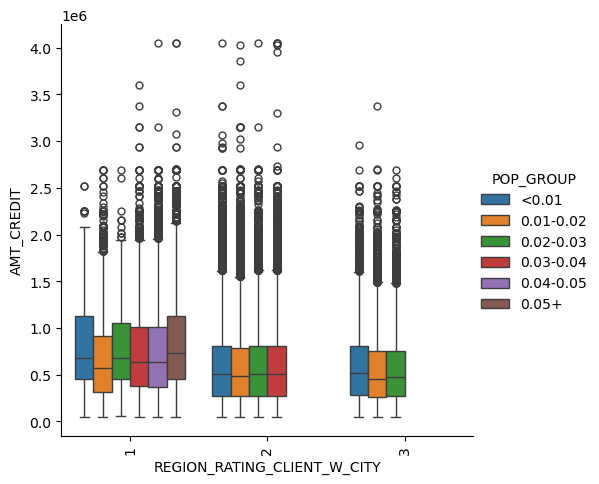

In [533]:
# Analysing the relationship between 'REGION_RATING_CLIENT_W_CITY','AMT_CREDIT' and 'POP_GROUP' 

sns.catplot(data=df2, x="REGION_RATING_CLIENT_W_CITY", y="AMT_CREDIT", hue="POP_GROUP", kind='box')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Clients from Tier 1 cities get higher Credit Amount across all categories of population density groups.
 - In general, the clients from Tier 2 cities get slightly higher credit amount than the clients from Tier 3 cities. default rate seems to be the highest in case of clients staying in Tier 3 cities and lowest in Tier 1 cities.
 - Interestingly, clients from highly dense cities (0.05+ and 0.04-0.05) are only present in Tier 1 cities and not in Tier 2 or Tier 3 cities.
 - Similarly, clients from medium dense cities (0.03-0.04) are only present in Tier 2 cities and not in Tier 3 cities.

</div>

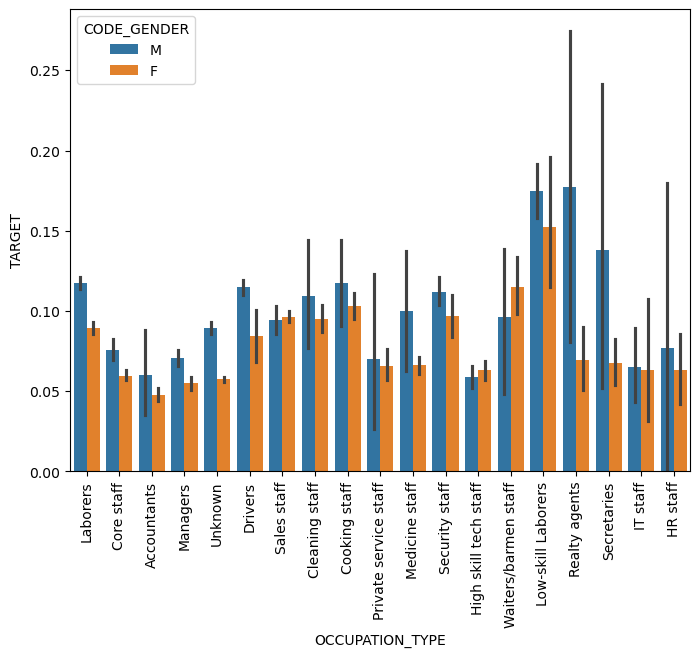

In [535]:
# Analysing the relationship between 'OCCUPATION_TYPE','TARGET' and 'CODE_GENDER' 

plt.figure(figsize=(8,6))
sns.barplot(data=df2, x="OCCUPATION_TYPE", y="TARGET", hue="CODE_GENDER")
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - In terms of occupation and gender, male Realty agents, Low-skill laborers and Secretaries seem to be the highest defaulters.
 - Female clients, generally, default less than the male clients on all occupations except for the role of Waiters / barmen staff, High skill tech staff and Sales staff. In these roles, females have been found to default more than their male counterparts.
 - On the other hand, female Accountants seem to be the lowest defaulters along with female Managers.
 - In general, the high skill staff like Core staff, Accountants, Managers, IT staff, High skill tech staff are low on loan payment default.
 - So the loan company can attact more female high skilled clients to ensure less default.

</div>

In [537]:
# Analysing the relationship between 'AGE_GROUP','NAME_EDUCATION_TYPE' and 'AMT_CREDIT' 

res5 = pd.pivot_table(data = df2, index = 'AGE_GROUP', columns = 'NAME_EDUCATION_TYPE', values = 'AMT_CREDIT') 
res5

NAME_EDUCATION_TYPE  Academic degree  Higher education  Incomplete higher  \
AGE_GROUP                                                                   
<30                    638930.700000     556378.838037      468133.007172   
30-40                  733116.600000     684553.436429      616581.110795   
40-50                  785155.867347     759338.888177      688550.814082   
50-60                  776124.140625     779097.481177      688588.680152   
60+                    506009.000000     621631.835458      560066.885714   

NAME_EDUCATION_TYPE  Lower secondary  Secondary / secondary special  
AGE_GROUP                                                            
<30                    425855.906757                  445998.294893  
30-40                  507852.631740                  563399.098629  
40-50                  567681.671329                  626279.264170  
50-60                  534640.822663                  615367.446145  
60+                    423266.927027                  508473.160588

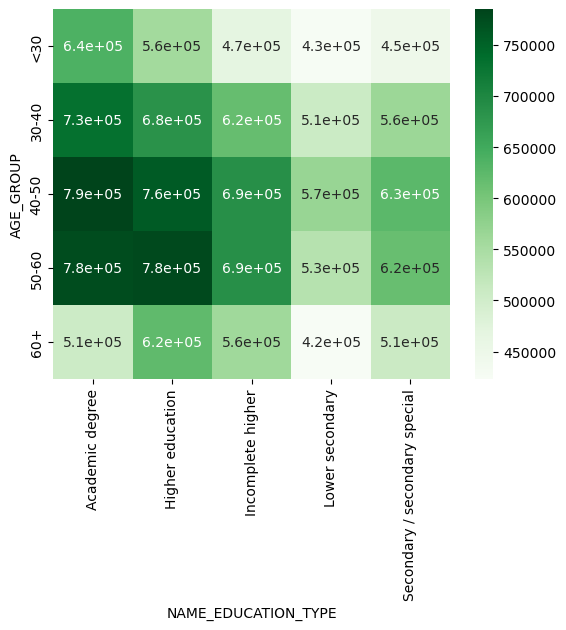

In [538]:
sns.heatmap(res5, cmap='Greens', annot=True)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - In general, the credit amount seems to be increasing with increase in age and education except for the 60+ age group who seem to have received low credit.
 - Clients in the 50-60 and 40-50 years age group with Academic degree or Higher education seem to have received the highest credit while clients in the <30 years and 60+ age group with Lower secondary or Secondary / secondary special education seem to have received the lowest credit. 

</div>

## CORRELATION

In [541]:
# Making correlation matrix and heatmap for the numeric variables of the dataframe to calculate the correlation between the variables
corr_mat=df2.corr(numeric_only = True)
corr_mat

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.002090     -0.001221   
TARGET                        -0.002090  1.000000      0.019170   
CNT_CHILDREN                  -0.001221  0.019170      1.000000   
AMT_INCOME_TOTAL               0.001308 -0.021852      0.026963   
AMT_CREDIT                    -0.000339 -0.030372      0.002349   
AMT_ANNUITY                   -0.000327 -0.012677      0.021571   
AMT_GOODS_PRICE               -0.000236 -0.039672     -0.001812   
REGION_POPULATION_RELATIVE     0.000740 -0.036316     -0.025271   
FLAG_EMP_PHONE                -0.001336  0.045979      0.242199   
FLAG_WORK_PHONE               -0.000415  0.028532      0.055650   
FLAG_PHONE                     0.002743 -0.023798     -0.030343   
CNT_FAM_MEMBERS               -0.002975  0.009346      0.877923   
REGION_RATING_CLIENT_W_CITY   -0.001137  0.060897      0.024997   
HOUR_APPR_PROCESS_START        0.000350 -0.024173     -0.007432   
REG_REGION_NOT_WORK_REGION     0.001097  0.006944      0.008391   
REG_CITY_NOT_WORK_CITY        -0.001583  0.051002      0.071218   
EXT_SOURCE_2                   0.002316 -0.160280     -0.018158   
EXT_SOURCE_3                   0.000186 -0.157378     -0.038659   
OBS_60_CNT_SOCIAL_CIRCLE      -0.001451  0.009820      0.016297   
DEF_60_CNT_SOCIAL_CIRCLE       0.001203  0.031696     -0.002017   
TOTAL_CREDIT_BUREAU            0.003664  0.002009     -0.033187   
YEARS_LAST_PHONE_CHANGE        0.000841 -0.055206      0.005788   
AGE_YEARS                      0.001500 -0.078237     -0.332949   
DAYS_EMPLOYED_365243           0.001367 -0.045984     -0.242208   
YEARS_EMPLOYED                -0.000105 -0.063380     -0.026234   
YEARS_REGISTRATION             0.000985 -0.041988     -0.184696   
YEARS_ID_PUBLISH               0.000388 -0.051465      0.028321   

                             AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                           0.001308   -0.000339    -0.000327   
TARGET                              -0.021852   -0.030372    -0.012677   
CNT_CHILDREN                         0.026963    0.002349     0.021571   
AMT_INCOME_TOTAL                     1.000000    0.368873     0.444648   
AMT_CREDIT                           0.368873    1.000000     0.773519   
AMT_ANNUITY                          0.444648    0.773519     1.000000   
AMT_GOODS_PRICE                      0.375229    0.986485     0.777857   
REGION_POPULATION_RELATIVE           0.160531    0.091529     0.107698   
FLAG_EMP_PHONE                       0.148536    0.065524     0.104269   
FLAG_WORK_PHONE                     -0.038995   -0.021083    -0.025130   
FLAG_PHONE                           0.003165    0.026221     0.010859   
CNT_FAM_MEMBERS                      0.034314    0.063361     0.076163   
REGION_RATING_CLIENT_W_CITY         -0.215760   -0.110910    -0.142155   
HOUR_APPR_PROCESS_START              0.082288    0.052738     0.052382   
REG_REGION_NOT_WORK_REGION           0.147639    0.051927     0.079495   
REG_CITY_NOT_WORK_CITY               0.017554   -0.018854     0.001054   
EXT_SOURCE_2                         0.150364    0.130922     0.126018   
EXT_SOURCE_3                        -0.061009    0.039181     0.027004   
OBS_60_CNT_SOCIAL_CIRCLE            -0.030274    0.001480    -0.010742   
DEF_60_CNT_SOCIAL_CIRCLE            -0.030359   -0.023336    -0.023618   
TOTAL_CREDIT_BUREAU                  0.065090   -0.000582     0.013548   
YEARS_LAST_PHONE_CHANGE              0.048568    0.073709     0.064601   
AGE_YEARS                           -0.061113    0.055424    -0.009645   
DAYS_EMPLOYED_365243                -0.148639   -0.065599    -0.104345   
YEARS_EMPLOYED                       0.051673    0.091426     0.062428   
YEARS_REGISTRATION                  -0.067273   -0.009553    -0.038644   
YEARS_ID_PUBLISH                    -0.022382    0.006569    -0.011692   

                             AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_

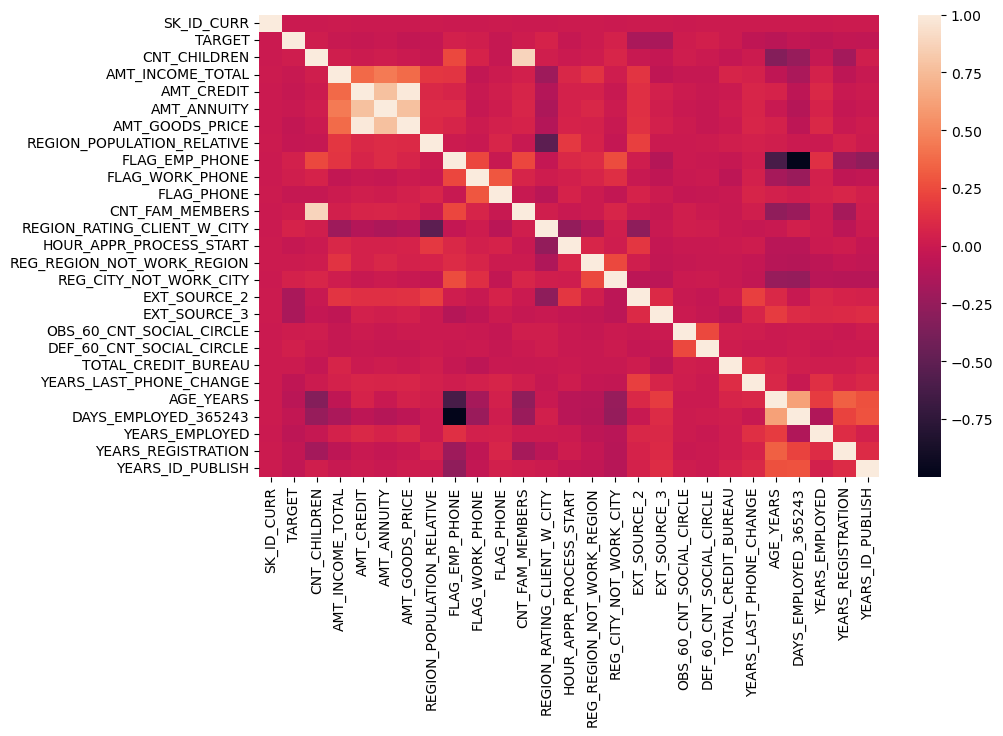

In [542]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AMT_CREDIT is highly correlated with AMT_GOODS_PRICE. 
 - AMT_INCOME_TOTAL is negatively correlated with REGION_RATING_CLIENT_W_CITY so lower the rating (1 - lower and 3 - higher), higher is the income.
 - AMT_CREDIT is highly correlated with REGION_RATING_CLIENT_W_CITY so higher the rating, higher is the credit.
 - CNT_CHILDREN is correlated with CNT_FAMILY.  
 
</div>

In [544]:
# Dividing the dataset into Defaulter dataset: TARGET1 and non-Defaulter dataset: TARGET0.

TARGET0 = df2.loc[df2["TARGET"]==0]
TARGET1 = df2.loc[df2["TARGET"]==1]

In [545]:
# Making correlation matrix and heatmap for the numeric variables of Target1 dataset to calculate the correlation between the variables

Target1_corr = TARGET1.corr(numeric_only=True, method='spearman')
Target1_corr

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000     NaN     -0.005714   
TARGET                              NaN     NaN           NaN   
CNT_CHILDREN                  -0.005714     NaN      1.000000   
AMT_INCOME_TOTAL               0.000948     NaN     -0.004831   
AMT_CREDIT                    -0.006301     NaN      0.000181   
AMT_ANNUITY                   -0.008370     NaN      0.033673   
AMT_GOODS_PRICE               -0.006898     NaN     -0.007582   
REGION_POPULATION_RELATIVE     0.005344     NaN     -0.031600   
FLAG_EMP_PHONE                 0.005244     NaN      0.216508   
FLAG_WORK_PHONE                0.004906     NaN      0.043431   
FLAG_PHONE                     0.018270     NaN     -0.030232   
CNT_FAM_MEMBERS               -0.002668     NaN      0.823286   
REGION_RATING_CLIENT_W_CITY   -0.003969     NaN      0.043382   
HOUR_APPR_PROCESS_START        0.004651     NaN     -0.022510   
REG_REGION_NOT_WORK_REGION     0.004107     NaN     -0.019560   
REG_CITY_NOT_WORK_CITY         0.000767     NaN      0.047518   
EXT_SOURCE_2                   0.004341     NaN     -0.015815   
EXT_SOURCE_3                  -0.003914     NaN     -0.026477   
OBS_60_CNT_SOCIAL_CIRCLE      -0.009971     NaN      0.031392   
DEF_60_CNT_SOCIAL_CIRCLE      -0.006343     NaN     -0.005541   
TOTAL_CREDIT_BUREAU            0.008342     NaN     -0.030933   
YEARS_LAST_PHONE_CHANGE       -0.001238     NaN     -0.012530   
AGE_YEARS                      0.001821     NaN     -0.267847   
DAYS_EMPLOYED_365243          -0.005152     NaN     -0.216454   
YEARS_EMPLOYED                 0.003391     NaN     -0.035591   
YEARS_REGISTRATION            -0.006721     NaN     -0.133702   
YEARS_ID_PUBLISH               0.001998     NaN      0.027291   

                             AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                           0.000948   -0.006301    -0.008370   
TARGET                                    NaN         NaN          NaN   
CNT_CHILDREN                        -0.004831    0.000181     0.033673   
AMT_INCOME_TOTAL                     1.000000    0.359272     0.431637   
AMT_CREDIT                           0.359272    1.000000     0.811448   
AMT_ANNUITY                          0.431637    0.811448     1.000000   
AMT_GOODS_PRICE                      0.362474    0.976432     0.804107   
REGION_POPULATION_RELATIVE           0.051512    0.039930     0.023303   
FLAG_EMP_PHONE                       0.136213    0.000853     0.088466   
FLAG_WORK_PHONE                     -0.095668   -0.074461    -0.050788   
FLAG_PHONE                          -0.023688   -0.003435    -0.017711   
CNT_FAM_MEMBERS                      0.003789    0.067433     0.088602   
REGION_RATING_CLIENT_W_CITY         -0.174297   -0.059213    -0.072973   
HOUR_APPR_PROCESS_START              0.088122    0.028524     0.032079   
REG_REGION_NOT_WORK_REGION           0.156079    0.030335     0.063881   
REG_CITY_NOT_WORK_CITY               0.028042   -0.029561     0.007400   
EXT_SOURCE_2                         0.145369    0.111863     0.110158   
EXT_SOURCE_3                        -0.087091    0.041828     0.025294   
OBS_60_CNT_SOCIAL_CIRCLE             0.000946    0.019555     0.009835   
DEF_60_CNT_SOCIAL_CIRCLE            -0.023219   -0.028417    -0.026151   
TOTAL_CREDIT_BUREAU                  0.120460    0.007969     0.022840   
YEARS_LAST_PHONE_CHANGE              0.081341    0.098408     0.074656   
AGE_YEARS                            0.007272    0.155222     0.030484   
DAYS_EMPLOYED_365243                -0.136350   -0.001029    -0.088598   
YEARS_EMPLOYED                       0.031567    0.101807     0.046045   
YEARS_REGISTRATION                  -0.036742    0.017082    -0.035907   
YEARS_ID_PUBLISH                     0.005901    0.053773     0.014474   

                             AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                         -0.006898               

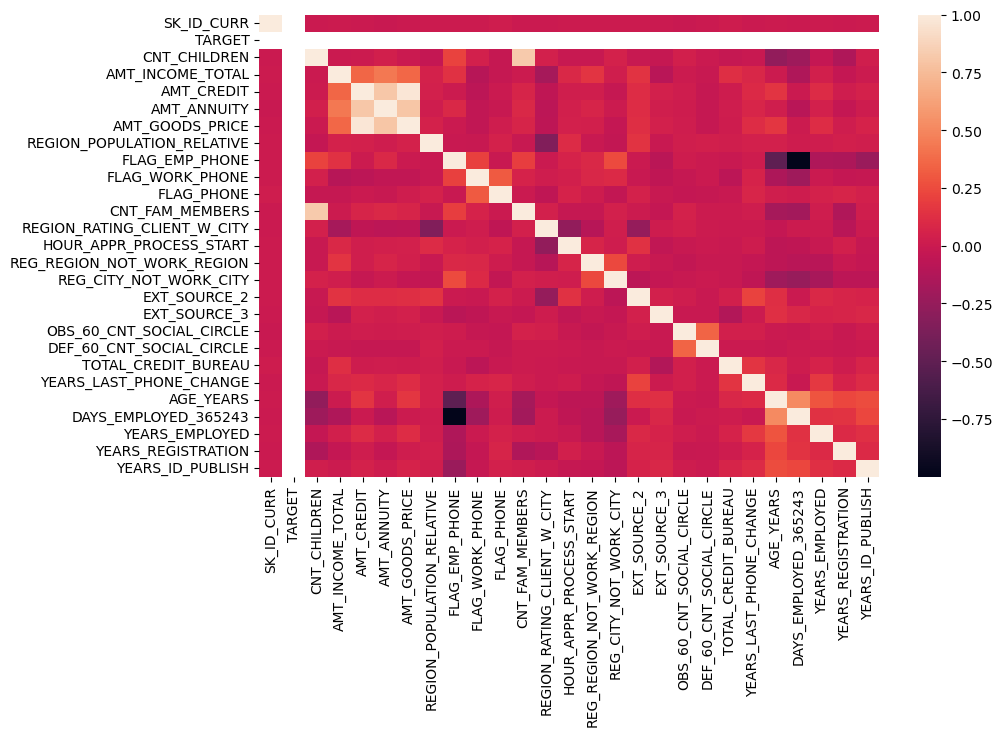

In [546]:
plt.figure(figsize=(10,6))
sns.heatmap(Target1_corr)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AMT_CREDIT is highly correlated with AMT_GOODS_PRICE. 
 - AMT_INCOME_TOTAL is negatively correlated with REGION_RATING_CLIENT_W_CITY so lower the rating (1 - lower and 3 - higher), higher is the income.
 - AMT_CREDIT is highly correlated with REGION_RATING_CLIENT_W_CITY so higher the rating, higher is the credit.
 - CNT_CHILDREN is correlated with CNT_FAMILY.  
 
</div>

In [548]:
# Making correlation matrix and heatmap for the numeric variables of Target0 dataset to calculate the correlation between the variables

Target0_corr = TARGET0.corr(numeric_only=True)
Target0_corr

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000     NaN     -0.000863   
TARGET                              NaN     NaN           NaN   
CNT_CHILDREN                  -0.000863     NaN      1.000000   
AMT_INCOME_TOTAL               0.001462     NaN      0.029441   
AMT_CREDIT                    -0.000337     NaN      0.003333   
AMT_ANNUITY                    0.000187     NaN      0.021118   
AMT_GOODS_PRICE               -0.000215     NaN     -0.000484   
REGION_POPULATION_RELATIVE     0.000260     NaN     -0.024184   
FLAG_EMP_PHONE                -0.001720     NaN      0.245756   
FLAG_WORK_PHONE               -0.000852     NaN      0.055518   
FLAG_PHONE                     0.001401     NaN     -0.030407   
CNT_FAM_MEMBERS               -0.002882     NaN      0.877342   
REGION_RATING_CLIENT_W_CITY   -0.000738     NaN      0.022044   
HOUR_APPR_PROCESS_START       -0.000119     NaN     -0.005267   
REG_REGION_NOT_WORK_REGION     0.000837     NaN      0.011069   
REG_CITY_NOT_WORK_CITY        -0.001693     NaN      0.072829   
EXT_SOURCE_2                   0.001579     NaN     -0.015542   
EXT_SOURCE_3                   0.000299     NaN     -0.037353   
OBS_60_CNT_SOCIAL_CIRCLE      -0.000739     NaN      0.015199   
DEF_60_CNT_SOCIAL_CIRCLE       0.002410     NaN     -0.002338   
TOTAL_CREDIT_BUREAU            0.003474     NaN     -0.033473   
YEARS_LAST_PHONE_CHANGE        0.000988     NaN      0.008385   
AGE_YEARS                      0.001351     NaN     -0.338930   
DAYS_EMPLOYED_365243           0.001746     NaN     -0.245769   
YEARS_EMPLOYED                -0.000239     NaN     -0.025063   
YEARS_REGISTRATION             0.001474     NaN     -0.187092   
YEARS_ID_PUBLISH               0.000080     NaN      0.029046   

                             AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                           0.001462   -0.000337     0.000187   
TARGET                                    NaN         NaN          NaN   
CNT_CHILDREN                         0.029441    0.003333     0.021118   
AMT_INCOME_TOTAL                     1.000000    0.371233     0.447497   
AMT_CREDIT                           0.371233    1.000000     0.774916   
AMT_ANNUITY                          0.447497    0.774916     1.000000   
AMT_GOODS_PRICE                      0.377729    0.986774     0.779660   
REGION_POPULATION_RELATIVE           0.163538    0.092323     0.110207   
FLAG_EMP_PHONE                       0.152366    0.071262     0.106429   
FLAG_WORK_PHONE                     -0.035610   -0.017117    -0.022803   
FLAG_PHONE                           0.003383    0.026734     0.012311   
CNT_FAM_MEMBERS                      0.036481    0.064758     0.076447   
REGION_RATING_CLIENT_W_CITY         -0.217624   -0.112232    -0.145694   
HOUR_APPR_PROCESS_START              0.081889    0.053618     0.053719   
REG_REGION_NOT_WORK_REGION           0.148879    0.053733     0.080741   
REG_CITY_NOT_WORK_CITY               0.019488   -0.015700     0.001681   
EXT_SOURCE_2                         0.150428    0.128868     0.126929   
EXT_SOURCE_3                        -0.064427    0.033548     0.024822   
OBS_60_CNT_SOCIAL_CIRCLE            -0.032010    0.000361    -0.011953   
DEF_60_CNT_SOCIAL_CIRCLE            -0.030351   -0.021781    -0.023000   
TOTAL_CREDIT_BUREAU                  0.063739   -0.000524     0.013958   
YEARS_LAST_PHONE_CHANGE              0.045330    0.069548     0.062922   
AGE_YEARS                           -0.067817    0.047365    -0.012478   
DAYS_EMPLOYED_365243                -0.152471   -0.071331    -0.106504   
YEARS_EMPLOYED                       0.051556    0.089161     0.062556   
YEARS_REGISTRATION                  -0.070364   -0.013394    -0.039556   
YEARS_ID_PUBLISH                    -0.025630    0.001458    -0.014579   

                             AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                         -0.000215               

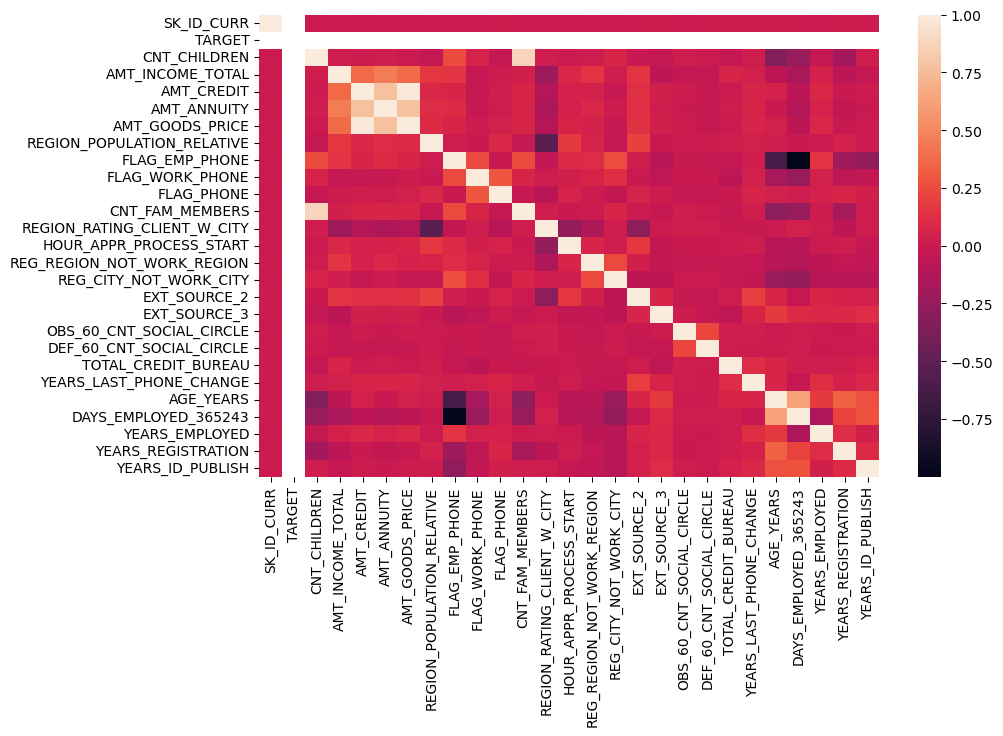

In [549]:
plt.figure(figsize=(10,6))
sns.heatmap(Target0_corr)
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AMT_CREDIT is highly correlated with AMT_GOODS_PRICE. 
 - AMT_INCOME_TOTAL is negatively correlated with REGION_RATING_CLIENT_W_CITY so lower the rating (1 - lower and 3 - higher), higher is the income.
 - AMT_CREDIT is highly correlated with REGION_RATING_CLIENT_W_CITY so higher the rating, higher is the credit.
 - CNT_CHILDREN is correlated with CNT_FAMILY.  
 
</div>

# Previous Application Data

In [552]:
#Reading 'previous application data' 

df1=pd.read_csv(r'C:\Users\Niharika\Downloads\previous_applicationEDAMainMod7_19Sep.csv')

In [553]:
# Shape of dataframe : (Rows, Columns)
df1.shape

(1670214, 37)

In [554]:
# First few rows of the dataframe
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [555]:
# Column definitions of 'previous_application data'

**Column Name**

 - SK_ID_PREV 	            ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) 
 - SK_ID_CURR	            ID of loan in our sample
 - NAME_CONTRACT_TYPE	Contract product type (Cash loan, consumer loan (POS) ,...) of the previous application
 - AMT_ANNUITY	            Annuity of previous application
 - AMT_APPLICATION	For how much credit did client ask on the previous application
 - AMT_CREDIT	            Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT
 - AMT_DOWN_PAYMENT	    Down payment on the previous application
 - AMT_GOODS_PRICE	        Price of good that client asked for (if applicable) on the previous application
 - WEEKDAY_APPR_PROCESS_START	On which day of the week did the client apply for previous application
 - HOUR_APPR_PROCESS_START	Approximately at what day hour did the client apply for the previous application
 - FLAG_LAST_APPL_PER_CONTRACT	Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract
 - NFLAG_LAST_APPL_IN_DAY	Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice
 - NFLAG_MICRO_CASH	    Flag Micro finance loan
 - RATE_DOWN_PAYMENT	    Down payment rate normalized on previous credit
 - RATE_INTEREST_PRIMARY	Interest rate normalized on previous credit
 - RATE_INTEREST_PRIVILEGED	Interest rate normalized on previous credit
 - NAME_CASH_LOAN_PURPOSE	Purpose of the cash loan
 - NAME_CONTRACT_STATUS	Contract status (approved, cancelled, ...) of previous application
 - DAYS_DECISION	    Relative to current application when was the decision about previous application made
 - NAME_PAYMENT_TYPE	Payment method that client chose to pay for the previous application
 - CODE_REJECT_REASON	Why was the previous application rejected
 - NAME_TYPE_SUITE	Who accompanied client when applying for the previous application
 - NAME_CLIENT_TYPE	Was the client old or new client when applying for the previous application
 - NAME_GOODS_CATEGORY	What kind of goods did the client apply for in the previous application
 - NAME_PORTFOLIO	Was the previous application for CASH, POS, CAR, …
 - NAME_PRODUCT_TYPE	Was the previous application x-sell o walk-in
 - CHANNEL_TYPE	    Through which channel we acquired the client on the previous application
 - SELLERPLACE_AREA	Selling area of seller place of the previous application
 - NAME_SELLER_INDUSTRY	The industry of the seller
 - CNT_PAYMENT	Term of previous credit at application of the previous application
 - NAME_YIELD_GROUP	Grouped interest rate into small medium and high of the previous application
 - PRODUCT_COMBINATION	Detailed product combination of the previous application
 - DAYS_FIRST_DRAWING	Relative to application date of current application when was the first disbursement of the previous application
 - DAYS_FIRST_DUE	    Relative to application date of current application when was the first due supposed to be of the previous application
 - DAYS_LAST_DUE_1ST_VERSION	Relative to application date of current application when was the first due of the previous application
 - DAYS_LAST_DUE	    Relative to application date of current application when was the last due date of the previous application
 - DAYS_TERMINATION	Relative to application date of current application when was the expected termination of the previous application
 - NFLAG_INSURED_ON_APPROVAL	Did the client requested insurance during the previous application

In [557]:
# List all the columns of the dataset
print(df1.columns.to_list())

['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [558]:
# Categorical column list: Object dtype

prev_categorical_features=[feature for feature in df1.columns if df1[feature].dtype=="O"]
print(len(prev_categorical_features))
print(prev_categorical_features)

16
['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [559]:
# Iterating over all the categorical columns to print the unique values in each column
for col in prev_categorical_features:
    print(f"Unique values in {col} are: {df1[col].unique()}\n")

Unique values in NAME_CONTRACT_TYPE are: ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']

Unique values in WEEKDAY_APPR_PROCESS_START are: ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']

Unique values in FLAG_LAST_APPL_PER_CONTRACT are: ['Y' 'N']

Unique values in NAME_CASH_LOAN_PURPOSE are: ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']

Unique values in NAME_CONTRACT_STATUS are: ['Approved' 'Refused' 'Canceled' 'Unused offer']

Unique values in NAME_PAYMENT_TYPE are: ['Cash through the bank' 'XNA' 'Non-cash from your account'
 'Cashle

In [560]:
# Numerical column list: int64 and float64 dtype

prev_numerical_features=[feature for feature in df1.columns if df1[feature].dtype!="O"]
print(len(prev_numerical_features))
print(prev_numerical_features)

21
['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [561]:
# Info of df1
df1.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [562]:
# Checking Null values in df1

df1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [563]:
# Percentage of Null values in df1, sorted in descending order

(((df1.isnull().sum())/len(df1))*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

### Handling Null Values

**Dropping columns with null values more than 40%**

In [566]:
df1.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','NAME_TYPE_SUITE','NFLAG_INSURED_ON_APPROVAL','DAYS_TERMINATION','DAYS_LAST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DUE','DAYS_FIRST_DRAWING'], axis=1, inplace=True)
df1.shape

(1670214, 26)

### Univariate Analysis along with Null Values Removal & Outlier Handling

#### 1. AMT_GOODS_PRICE

In [569]:
# Count of non-null values 
df1.AMT_GOODS_PRICE.describe().round(2)

count    1284699.00
mean      227847.28
std       315396.56
min            0.00
25%        50841.00
50%       112320.00
75%       234000.00
max      6905160.00
Name: AMT_GOODS_PRICE, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AMT_GOODS_PRICE column is a numerical variable with 'float64' dtype.
 - It refers to the price of goods that client asked for (if applicable) on the previous application.
 - It has 1284699 non-null values.
 - Its mean and median are very far from each other indicating presence of outliers. There is a big jump from 75th percentile to the max value as well. 

</div>

In [571]:
# Count of null values
df1.AMT_GOODS_PRICE.isnull().sum()

385515

In [572]:
# % of Null values
(df1.AMT_GOODS_PRICE.isnull().sum()/len(df1)*100).round(2)

23.08

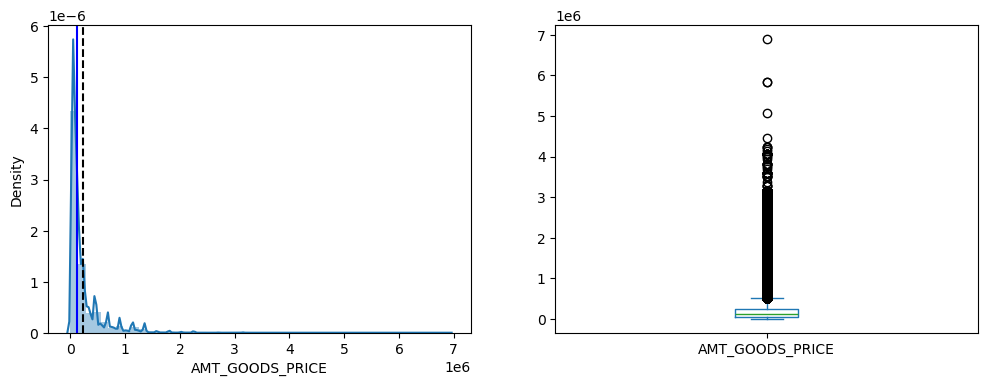

In [573]:
# Variable distribution through histogram and boxplot for AMT_GOODS_PRICE
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df1.AMT_GOODS_PRICE)
plt.axvline(df1.AMT_GOODS_PRICE.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df1.AMT_GOODS_PRICE.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df1.AMT_GOODS_PRICE.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AMT_GOODS_PRICE distribution is left skewed with a long tail on the right.
 - From the boxplot we can see that there are many outliers.
 - We can handle them by capping but first lets handle the null values by imputing them with column median.

</div>

In [575]:
# Replacing null values in the column with column median
df1['AMT_GOODS_PRICE'].fillna(df1['AMT_GOODS_PRICE'].median(),inplace=True)

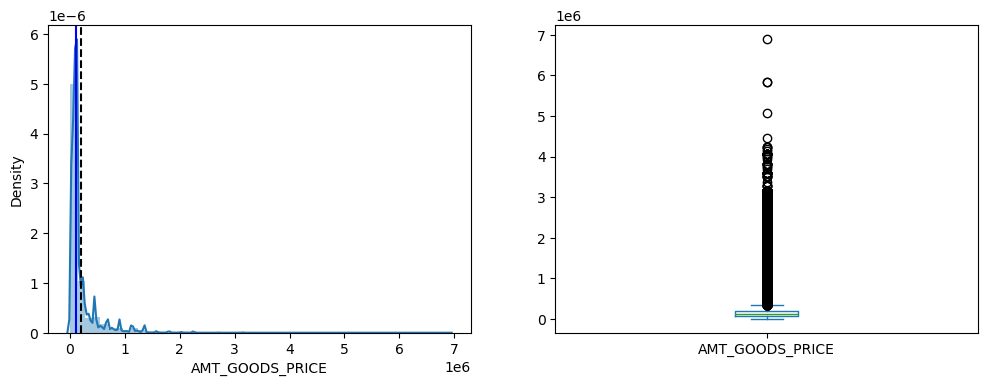

In [576]:
# Variable distribution through histogram and boxplot for AMT_GOODS_PRICE
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df1.AMT_GOODS_PRICE)
plt.axvline(df1.AMT_GOODS_PRICE.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df1.AMT_GOODS_PRICE.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df1.AMT_GOODS_PRICE.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Now lets cap the outliers. 

</div>

In [578]:
# Calculating the upper limit for capping
q1 = df1['AMT_GOODS_PRICE'].describe()['25%']
q3 = df1['AMT_GOODS_PRICE'].describe()['75%']
upper_bound_goods = q3 + 1.5*(q3-q1)
upper_bound_goods

349762.5

In [579]:
# Capping the outliers at upper_bound_goods
df1['AMT_GOODS_PRICE'] = np.where(df1['AMT_GOODS_PRICE']>upper_bound_goods,upper_bound_goods,df1['AMT_GOODS_PRICE'])

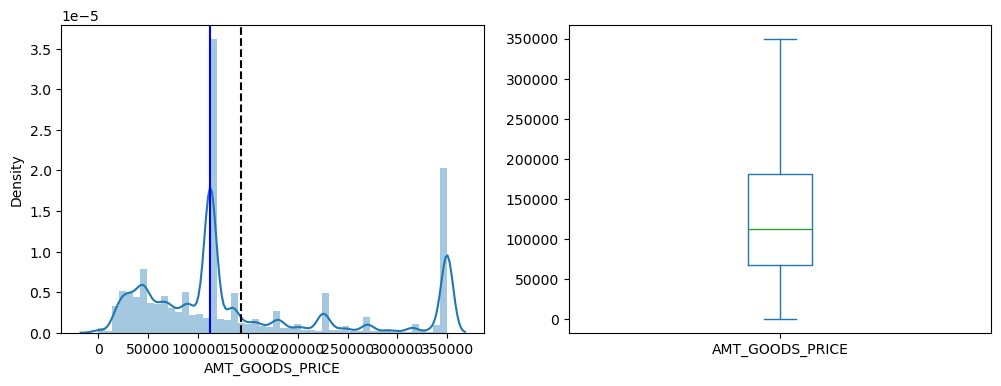

In [580]:
# Variable distribution through histogram and boxplot for AMT_GOODS_PRICE
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df1.AMT_GOODS_PRICE)
plt.axvline(df1.AMT_GOODS_PRICE.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df1.AMT_GOODS_PRICE.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df1.AMT_GOODS_PRICE.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Now all the outliers are removed.

</div>

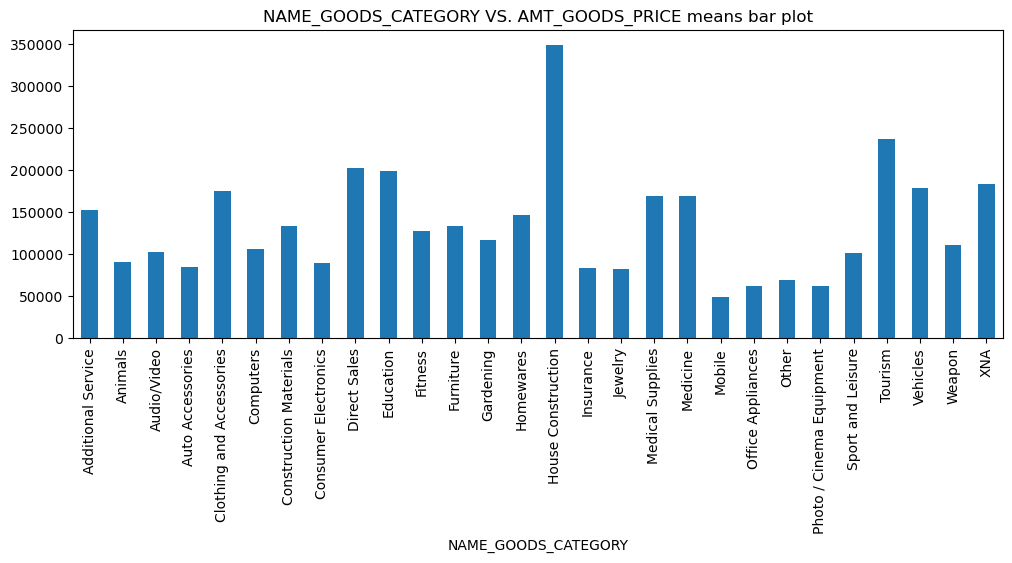

In [582]:
# Plotting the bar plot and boxplot of NAME_GOODS_CATEGORY vs. AMT_GOODS_PRICE values 
plt.figure(figsize=(12,4))
df1.groupby('NAME_GOODS_CATEGORY')['AMT_GOODS_PRICE'].mean().plot.bar()
plt.title("NAME_GOODS_CATEGORY VS. AMT_GOODS_PRICE means bar plot")
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The highest priced good for which the clients were seeking loans was for the purpose of House construction.
 - The second highest price good for which the clients were applying for loans was Tourism.
 - Among the lowest priced goods clients wanted to purchase were mobile, other appliances and photo/ cinema equipment. 

</div>

#### 2. AMT_ANNUITY

In [585]:
# Count of non-null values 
df1.AMT_ANNUITY.describe().round(2)

count    1297979.00
mean       15955.12
std        14782.14
min            0.00
25%         6321.78
50%        11250.00
75%        20658.42
max       418058.14
Name: AMT_ANNUITY, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AMT_ANNUITY column is a numerical variable with 'float64' dtype.
 - It refers to the annuity of the previous application.
 - It has 1297979 non-null values.
 - Its mean and median are very far from each other indicating presence of outliers. There is a big jump from 75th percentile to the max value as well. 

</div>

In [587]:
# Count of null values
df1.AMT_ANNUITY.isnull().sum()

372235

In [588]:
# % of Null values
(df1.AMT_ANNUITY.isnull().sum()/len(df1)*100).round(2)

22.29

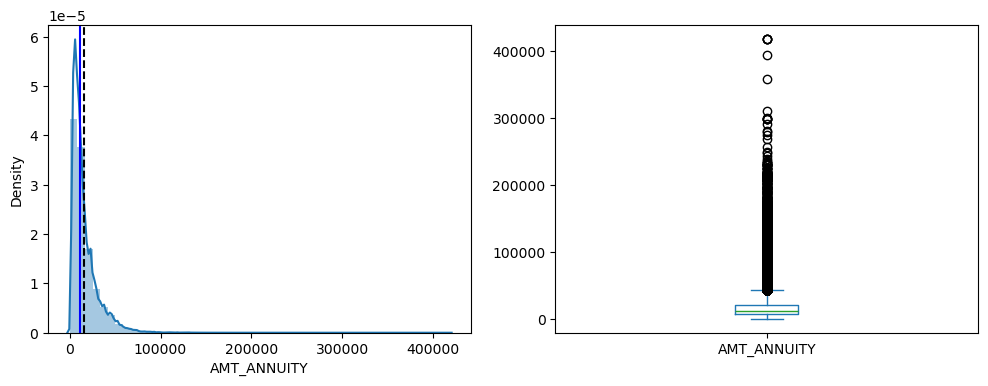

In [589]:
# Variable distribution through histogram and boxplot for AMT_ANNUITY
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df1.AMT_ANNUITY)
plt.axvline(df1.AMT_ANNUITY.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df1.AMT_ANNUITY.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df1.AMT_ANNUITY.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AMT_ANNUITY distribution is left skewed with a long tail on the right.
 - From the boxplot we can see that there are many outliers.
 - We can handle them by capping but first lets handle the null values by imputing them with column median.

</div>

In [591]:
# Replacing null values in the column with column median
df1['AMT_ANNUITY'].fillna(df1['AMT_ANNUITY'].median(),inplace=True)

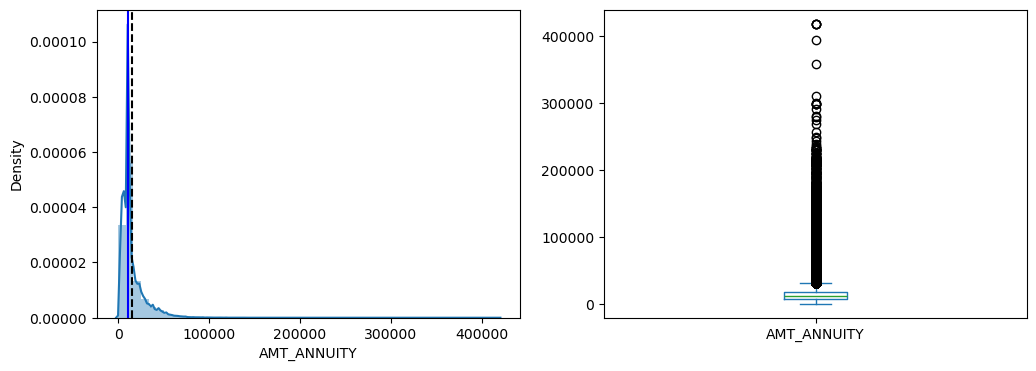

In [592]:
# Variable distribution through histogram and boxplot for AMT_ANNUITY
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df1.AMT_ANNUITY)
plt.axvline(df1.AMT_ANNUITY.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df1.AMT_ANNUITY.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df1.AMT_ANNUITY.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Now lets cap the outliers. 

</div>

In [594]:
# Calculating the upper limit for capping
q1 = df1['AMT_ANNUITY'].describe()['25%']
q3 = df1['AMT_ANNUITY'].describe()['75%']
upper_bound_annuity = q3 + 1.5*(q3-q1)
upper_bound_annuity

30739.421250000007

In [595]:
# Capping the outliers at upper_bound_annuity
df1['AMT_ANNUITY'] = np.where(df1['AMT_ANNUITY']>upper_bound_annuity,upper_bound_annuity,df1['AMT_ANNUITY'])

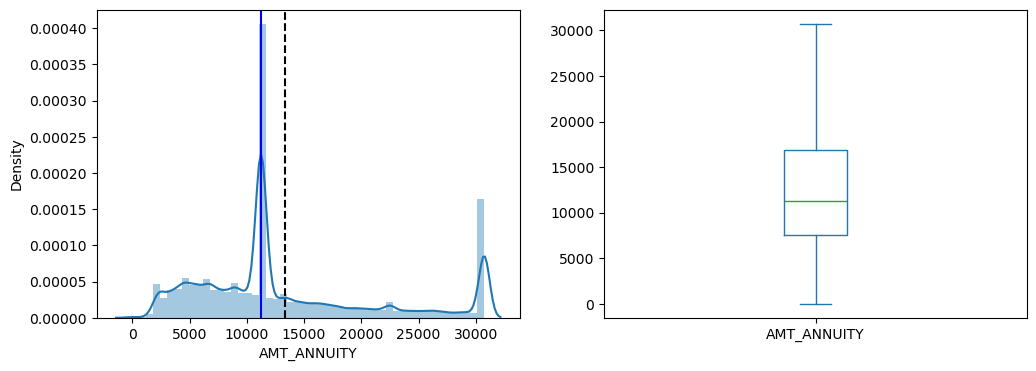

In [596]:
# Variable distribution through histogram and boxplot for AMT_ANNUITY
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df1.AMT_ANNUITY)
plt.axvline(df1.AMT_ANNUITY.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df1.AMT_ANNUITY.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df1.AMT_ANNUITY.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Though the distribution is not normal, the outliers have been removed. 

</div>

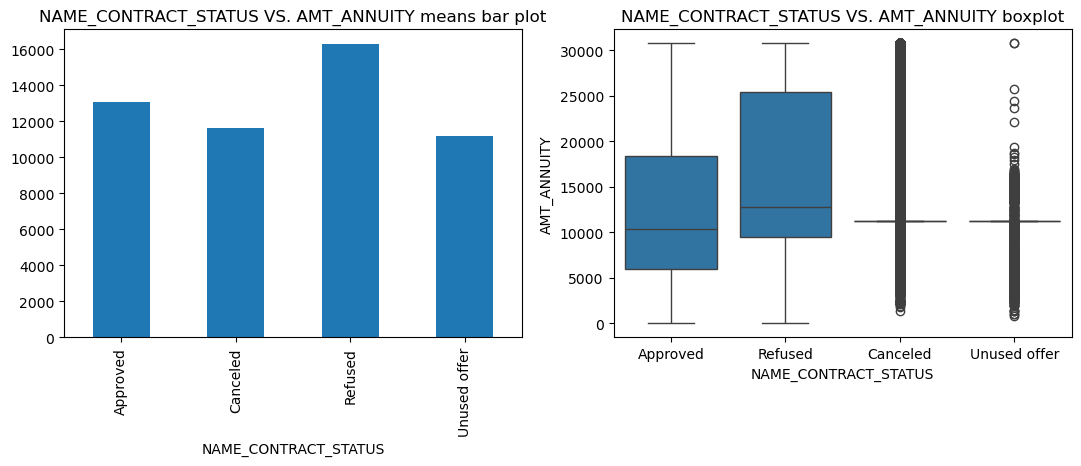

In [598]:
# Plotting the bar plot and boxplot of NAME_CONTRACT_STATUS vs. AMT_ANNUITY values 
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
df1.groupby('NAME_CONTRACT_STATUS')['AMT_ANNUITY'].mean().plot.bar()
plt.title("NAME_CONTRACT_STATUS VS. AMT_ANNUITY means bar plot")
plt.subplot(1,2,2)
sns.boxplot(x=df1.NAME_CONTRACT_STATUS, y=df1.AMT_ANNUITY)
plt.title("NAME_CONTRACT_STATUS VS. AMT_ANNUITY boxplot")
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - We can see here clients seeking mean loan annuity of 13075.51 were approved were those seeking a higher mean loan annuity of 16298.79 were refused.
 - Clients seeking mean loan annuity of 11657.25 cancelled their loan appication during approval.
 - Some clients who were approved loans with annuity of 11211.65 chose not to use their offers. 

</div>

#### 3. CNT_PAYMENT

In [601]:
# Count of non-null values 
df1.CNT_PAYMENT.describe().round(2)

count    1297984.00
mean          16.05
std           14.57
min            0.00
25%            6.00
50%           12.00
75%           24.00
max           84.00
Name: CNT_PAYMENT, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - CNT_PAYMENT column is a numerical variable with 'float64' dtype.
 - It refers to the term of previous credit at application of the previous application.
 - It has 1297984 non-null values.
 - Its mean and median are far from each other. There is a big jump from 75th percentile to the max value as well indicating presence of outliers. 

</div>

In [603]:
# Count of null values
df1.CNT_PAYMENT.isnull().sum()

372230

In [604]:
# % of Null values
(df1.CNT_PAYMENT.isnull().sum()/len(df1)*100).round(2)

22.29

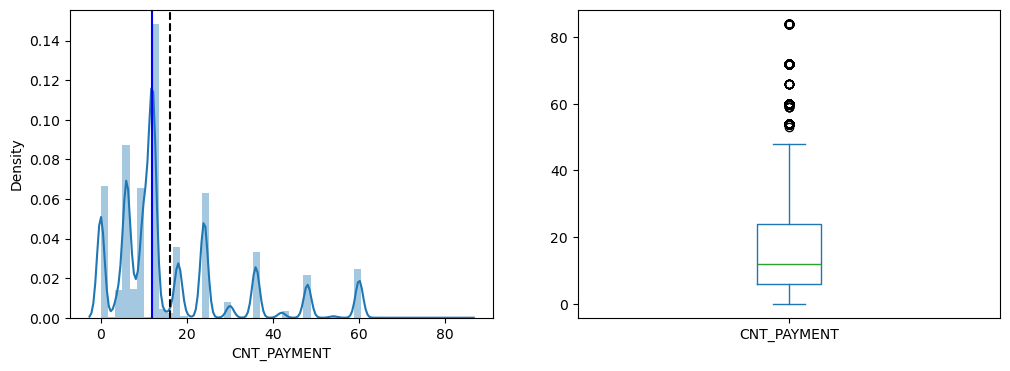

In [605]:
# Variable distribution through histogram and boxplot for CNT_PAYMENT
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df1.CNT_PAYMENT)
plt.axvline(df1.CNT_PAYMENT.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df1.CNT_PAYMENT.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df1.CNT_PAYMENT.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - CNT_PAYMENT distribution is left skewed.
 - From the boxplot we can see that there are some outliers.
 - We can handle them by capping but first lets handle the null values by imputing them with column mode as this column has discrete numerical values.

</div>

In [607]:
# Replacing null values in the column with column median
df1['CNT_PAYMENT'].fillna(df1['CNT_PAYMENT'].mode()[0],inplace=True)

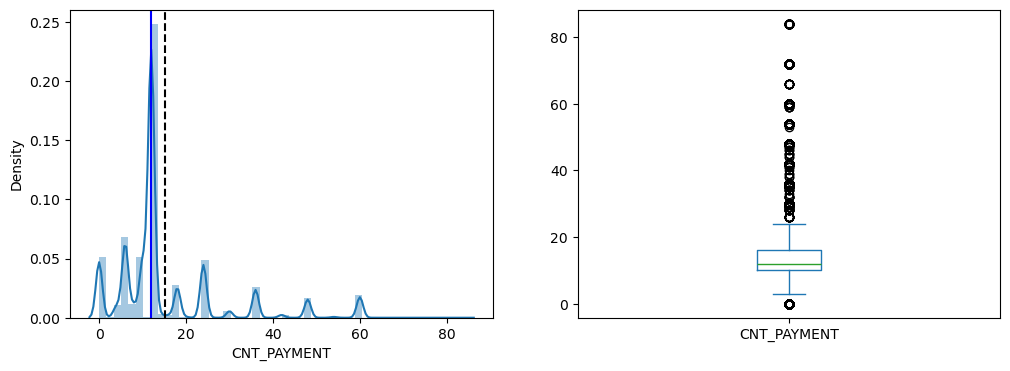

In [608]:
# Variable distribution through histogram and boxplot for CNT_PAYMENT
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df1.CNT_PAYMENT)
plt.axvline(df1.CNT_PAYMENT.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df1.CNT_PAYMENT.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df1.CNT_PAYMENT.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Now lets cap the outliers. 

</div>

In [610]:
# Calculating the upper limit for capping
q1 = df1['CNT_PAYMENT'].describe()['25%']
q3 = df1['CNT_PAYMENT'].describe()['75%']
upper_bound_payment = q3 + 1.5*(q3-q1)
lower_bound_payment = q1 - 1.5*(q3-q1)
upper_bound_payment, lower_bound_payment

(25.0, 1.0)

In [611]:
# Capping the outliers at upper_bound_payment and lower_bound_payment
df1['CNT_PAYMENT'] = np.where(df1['CNT_PAYMENT']>upper_bound_payment,upper_bound_payment,df1['CNT_PAYMENT'])
df1['CNT_PAYMENT'] = np.where(df1['CNT_PAYMENT']<lower_bound_payment,lower_bound_payment,df1['CNT_PAYMENT'])

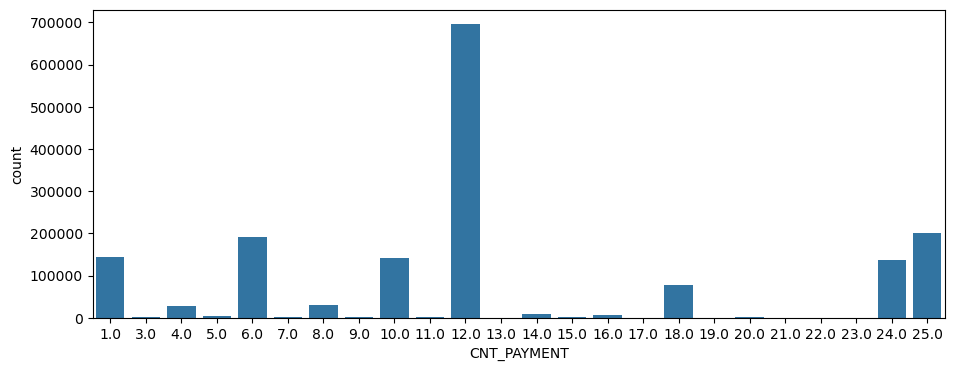

In [612]:
# Variable distribution through histogram and boxplot for CNT_PAYMENT
plt.figure(figsize=(11,4))
sns.barplot(df1.CNT_PAYMENT.value_counts())
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - Most of the clients seem to prefer a 12 month term for loan payment for the previous application, with 6 months and 25 months being the next popular term plans.
 - Many of them also choose 0 term plans.
 - Least number of clients have chosen 21 month or 19 month plan.

</div>

#### 4. PRODUCT_COMBINATION

In [615]:
# Count of non-null values 
df1.PRODUCT_COMBINATION.describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - PRODUCT_COMBINATION column is a categorical variable with 'object' dtype.
 - It refers to the detailed product combination of the previous application.
 - It has 1669868 non-null values.
 - It has 17 unique values.

</div>

In [617]:
# Count of null values
df1.PRODUCT_COMBINATION.isnull().sum()

346

In [618]:
# % of Null values
(df1.PRODUCT_COMBINATION.isnull().sum()/len(df1)*100).round(4)

0.0207

In [619]:
# Calculating value counts and the % of value counts of the column
pd.concat([df1.PRODUCT_COMBINATION.value_counts(), df1.PRODUCT_COMBINATION.value_counts(normalize=True)*100], keys=['counts', 'normalized_counts'], axis=1)

counts  normalized_counts
PRODUCT_COMBINATION                                      
Cash                            285990          17.126503
POS household with interest     263622          15.786996
POS mobile with interest        220670          13.214817
Cash X-Sell: middle             143883           8.616430
Cash X-Sell: low                130248           7.799898
Card Street                     112582           6.741970
POS industry with interest       98833           5.918612
POS household without interest   82908           4.964943
Card X-Sell                      80582           4.825651
Cash Street: high                59639           3.571480
Cash X-Sell: high                59301           3.551239
Cash Street: middle              34658           2.075493
Cash Street: low                 33834           2.026148
POS mobile without interest      24082           1.442150
POS other with interest          23879           1.429993
POS industry without interest    12602           0.754670
POS others without interest       2555           0.153006

In [620]:
# Replacing null values in the column with column mode
df1['PRODUCT_COMBINATION'].fillna(df1['PRODUCT_COMBINATION'].mode()[0],inplace=True)

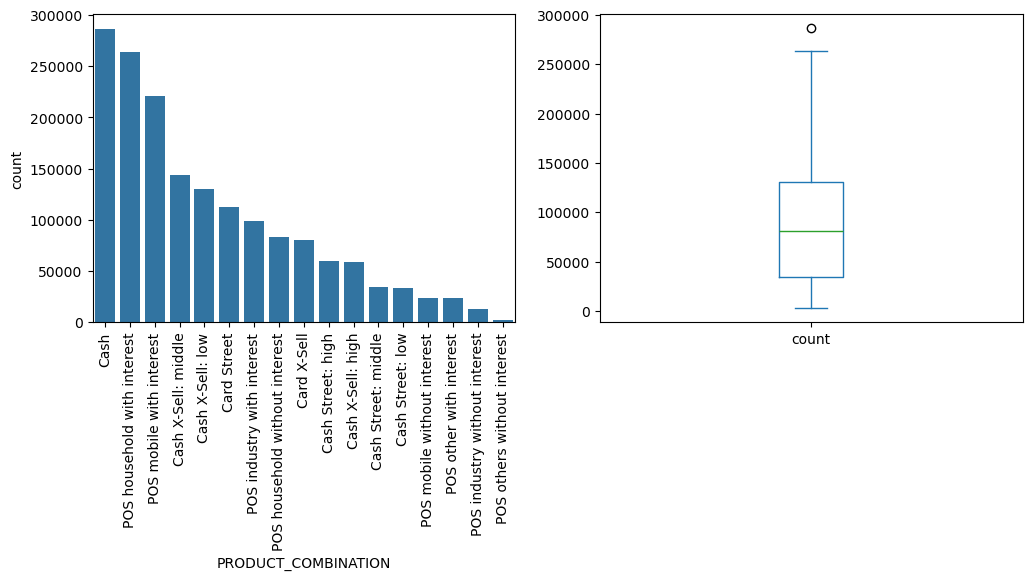

In [621]:
# Variable distribution through histogram and boxplot for PRODUCT_COMBINATION
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(df1.PRODUCT_COMBINATION.value_counts())
plt.xticks(rotation=90)
plt.subplot(1,2,2)
df1.PRODUCT_COMBINATION.value_counts().plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - 17.14% of clients seem to prefer Cash category while 15.78% prefer POS household with interest product combination.
 - Least number of clients prefer POS industry without interest	(0.75%) and POS others without interest (0.15%).

</div>

#### 5. AMT_CREDIT

In [624]:
# Count of non-null values 
df1.AMT_CREDIT.describe().round(2)

count    1670213.00
mean      196114.02
std       318574.62
min            0.00
25%        24160.50
50%        80541.00
75%       216418.50
max      6905160.00
Name: AMT_CREDIT, dtype: float64

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - AMT_CREDIT column is a numerical variable with 'float64' dtype.
 - It refers to final credit amount on the previous application.
 - It has 1670213.00 non-null values.
 - Its mean and median are quite far from each other. Also, there is a big jump from 75th percentile to the max value indicating presence of outliers.

</div>

In [626]:
# Count of null values
df1.AMT_CREDIT.isnull().sum()

1

In [627]:
# % of Null values
(df1.AMT_CREDIT.isnull().sum()/len(df1)*100).round(4)

0.0001

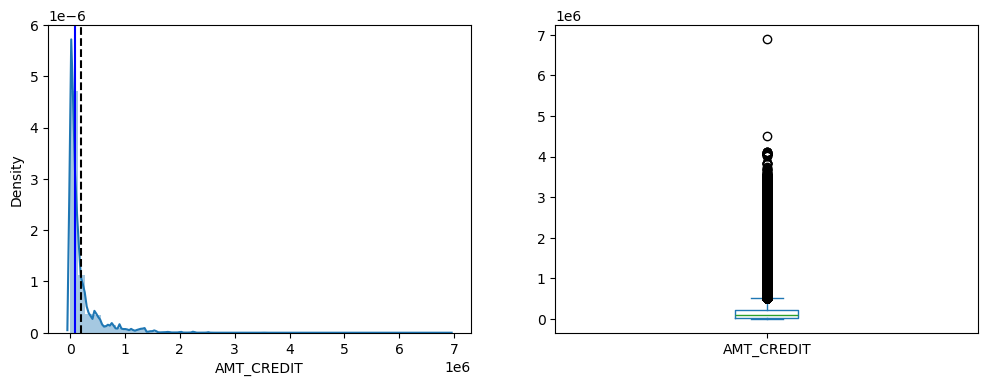

In [628]:
# Variable distribution through histogram and boxplot for AMT_CREDIT
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df1.AMT_CREDIT)
plt.axvline(df1.AMT_CREDIT.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df1.AMT_CREDIT.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df1.AMT_CREDIT.plot.box()
plt.show()

<div class="alert alert-block alert-info">
<b>Insight</b>
    
 - The column has left skewed distribution while the box plot graph shows many outliers

</div>

In [630]:
# Replacing null values in the column with column median
df1['AMT_CREDIT'].fillna(df1['AMT_CREDIT'].median(),inplace=True)

In [631]:
# Calculating the upper limit for capping
q1 = df1['AMT_CREDIT'].describe()['25%']
q3 = df1['AMT_CREDIT'].describe()['75%']
upper_bound_credit = q3 + 1.5*(q3-q1)
lower_bound_credit = q1 - 1.5*(q3-q1)
upper_bound_credit

504805.5

In [632]:
# Capping the outliers at upper_bound_credit
df1['AMT_CREDIT'] = np.where(df1['AMT_CREDIT']>upper_bound_credit,upper_bound_credit,df1['AMT_CREDIT'])

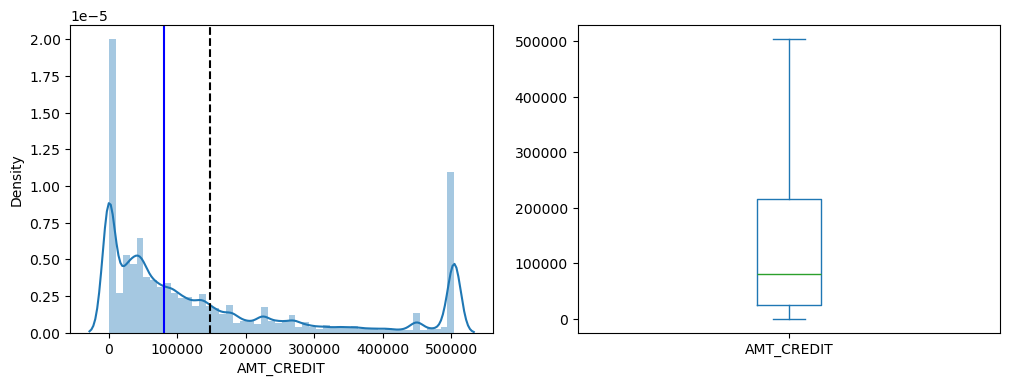

In [633]:
# Variable distribution through histogram and boxplot for AMT_CREDIT
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df1.AMT_CREDIT)
plt.axvline(df1.AMT_CREDIT.mean(), c='k', ls='--', lw=1.5)
plt.axvline(x=df1.AMT_CREDIT.median(), color='Blue', ls='-', lw=1.5)
plt.subplot(1,2,2)
df1.AMT_CREDIT.plot.box()
plt.show()

## Replacing XNA and XAP values with 'NotAvailable' and 'NotApplicable'

In [635]:
df1.NAME_CONTRACT_TYPE=df1.NAME_CONTRACT_TYPE.replace('XNA','NotAvailable')

In [636]:
df1.NAME_CASH_LOAN_PURPOSE=df1.NAME_CASH_LOAN_PURPOSE.replace('XNA','NotAvailable')
df1.NAME_CASH_LOAN_PURPOSE=df1.NAME_CASH_LOAN_PURPOSE.replace('XAP','NotApplicable')

In [637]:
df1.NAME_PAYMENT_TYPE=df1.NAME_PAYMENT_TYPE.replace('XNA','NotAvailable')

In [638]:
df1.CODE_REJECT_REASON=df1.CODE_REJECT_REASON.replace('XNA','NotAvailable')
df1.CODE_REJECT_REASON=df1.CODE_REJECT_REASON.replace('XAP','NotApplicable')

In [639]:
df1.NAME_CLIENT_TYPE=df1.NAME_CLIENT_TYPE.replace('XNA','NotAvailable')

In [640]:
df1.NAME_GOODS_CATEGORY=df1.NAME_GOODS_CATEGORY.replace('XNA','NotAvailable')

In [641]:
df1.NAME_PORTFOLIO=df1.NAME_PORTFOLIO.replace('XNA','NotAvailable')

In [642]:
df1.NAME_PRODUCT_TYPE=df1.NAME_PRODUCT_TYPE.replace('XNA','NotAvailable')

In [643]:
df1.NAME_SELLER_INDUSTRY=df1.NAME_SELLER_INDUSTRY.replace('XNA','NotAvailable')

In [644]:
df1.NAME_YIELD_GROUP=df1.NAME_YIELD_GROUP.replace('XNA','NotAvailable')

## Merging current and previous application datasets

In [646]:
merge_df = df2.merge(df1, on='SK_ID_CURR', how='inner')
merge_df.shape

(1413687, 66)

In [647]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413687 entries, 0 to 1413686
Data columns (total 66 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413687 non-null  int64   
 1   TARGET                       1413687 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413687 non-null  object  
 3   CODE_GENDER                  1413687 non-null  object  
 4   FLAG_OWN_CAR                 1413687 non-null  object  
 5   FLAG_OWN_REALTY              1413687 non-null  object  
 6   CNT_CHILDREN                 1413687 non-null  int64   
 7   AMT_INCOME_TOTAL             1413687 non-null  float64 
 8   AMT_CREDIT_x                 1413687 non-null  float64 
 9   AMT_ANNUITY_x                1413687 non-null  float64 
 10  AMT_GOODS_PRICE_x            1413687 non-null  float64 
 11  NAME_TYPE_SUITE              1413687 non-null  object  
 12  NAME_INCOME_TYPE            

In [648]:
Analysis1 = pd.pivot_table(data = merge_df, index = 'NAME_CASH_LOAN_PURPOSE', columns = 'NAME_CONTRACT_STATUS', values = 'AMT_CREDIT_y') 
Analysis1

NAME_CONTRACT_STATUS                   Approved       Canceled        Refused  \
NAME_CASH_LOAN_PURPOSE                                                          
Building a house or an annex      390823.757576  475385.284884  456077.074219   
Business development              379155.633028  448213.500000  428897.516949   
Buying a garage                   350932.645161  501026.785714  457945.500000   
Buying a holiday home / land      405339.495652  504805.500000  478272.486486   
Buying a home                     452747.792169  484936.403226  484577.196429   
Buying a new car                  442234.384615  498952.534091  485726.033541   
Buying a used car                 384339.859732  461764.207317  441602.133129   
Car repairs                       210796.793046  229742.400000  255002.197861   
Education                         194363.130603  355674.789474  242481.047511   
Everyday expenses                 170351.518466  278293.153846  207775.275701   
Furniture                         251594.146552  341428.263158  323868.346154   
Gasification / water supply       270831.105000  496301.625000  350420.938776   
Hobby                             293038.593750            NaN  285305.741379   
Journey                           256508.648734  360922.500000  322228.092153   
Medicine                          198566.044382  268629.500000  257769.999474   
Money for a third person          223617.681818            NaN  230118.375000   
NotApplicable                     102935.744598    3025.081212  143782.010956   
NotAvailable                      307452.403752   13508.339035  299023.224433   
Other                             242397.555449  386879.743902  314460.808948   
Payments on other loans           331826.306773  455828.976562  427872.158964   
Purchase of electronic equipment  169863.710832  306769.500000  196607.660099   
Refusal to name the goal          300442.500000            NaN  203483.250000   
Repairs                           301143.998912  415840.175522  370687.927234   
Urgent needs                      209158.136232  321032.269565  269242.482819   
Wedding / gift / holiday          239426.799703  351955.500000  307650.934978   

NAME_CONTRACT_STATUS              Unused offer  
NAME_CASH_LOAN_PURPOSE                          
Building a house or an annex               NaN  
Business development                       NaN  
Buying a garage                            NaN  
Buying a holiday home / land               NaN  
Buying a home                              NaN  
Buying a new car                      0.000000  
Buying a used car                     0.000000  
Car repairs                                NaN  
Education                             0.000000  
Everyday expenses                     0.000000  
Furniture                                  NaN  
Gasification / water supply                NaN  
Hobby                                      NaN  
Journey                               0.000000  
Medicine                              0.000000  
Money for a third person                   NaN  
NotApplicable                     70170.620856  
NotAvailable                       3072.289157  
Other                              5113.636364  
Payments on other loans               0.000000  
Purchase of electronic equipment      0.000000  
Refusal to name the goal                   NaN  
Repairs                               0.000000  
Urgent needs                               NaN  
Wedding / gift / holiday                   NaN

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='NAME_CASH_LOAN_PURPOSE'>

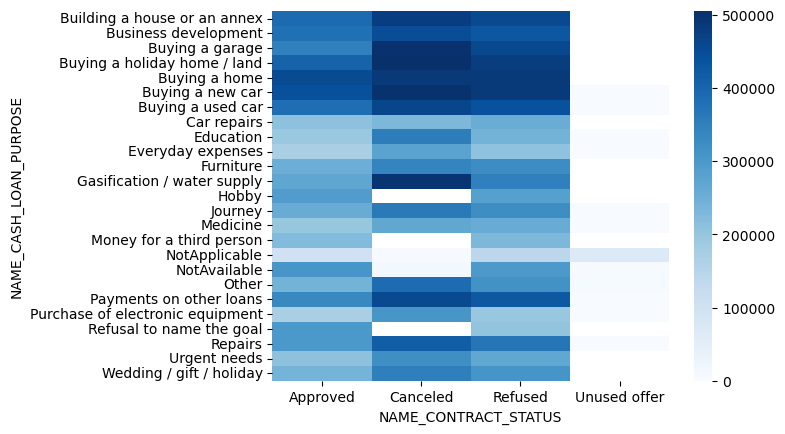

In [649]:
sns.heatmap(Analysis1, cmap='Blues')

In [650]:
Analysis1 = pd.pivot_table(data = merge_df, index = 'NAME_CASH_LOAN_PURPOSE', columns = 'NAME_CONTRACT_STATUS', values = 'TARGET') 
Analysis1

NAME_CONTRACT_STATUS              Approved  Canceled   Refused  Unused offer
NAME_CASH_LOAN_PURPOSE                                                      
Building a house or an annex      0.122896  0.081395  0.146635           NaN
Business development              0.082569  0.142857  0.148305           NaN
Buying a garage                   0.096774  0.142857  0.038462           NaN
Buying a holiday home / land      0.095652  0.066667  0.129129           NaN
Buying a home                     0.096386  0.096774  0.128968           NaN
Buying a new car                  0.082051  0.113636  0.090484      0.166667
Buying a used car                 0.106040  0.109756  0.140491      0.083333
Car repairs                       0.165563  0.200000  0.197861           NaN
Education                         0.092736  0.052632  0.117647      0.200000
Everyday expenses                 0.078598  0.076923  0.134995      0.100000
Furniture                         0.075862  0.210526  0.168091           NaN
Gasification / water supply       0.130000  0.000000  0.217687           NaN
Hobby                             0.187500       NaN  0.206897           NaN
Journey                           0.088608  0.062500  0.124088      0.000000
Medicine                          0.126966  0.185185  0.138947      0.250000
Money for a third person          0.000000       NaN  0.333333           NaN
NotApplicable                     0.076044  0.110556  0.112255      0.082285
NotAvailable                      0.072058  0.088287  0.119973      0.076305
Other                             0.104979  0.138211  0.139244      0.136364
Payments on other loans           0.151394  0.109375  0.164143      0.333333
Purchase of electronic equipment  0.100580  0.285714  0.155172      0.000000
Refusal to name the goal          0.333333       NaN  0.200000           NaN
Repairs                           0.113325  0.094877  0.141919      0.054054
Urgent needs                      0.135266  0.078261  0.162600           NaN
Wedding / gift / holiday          0.121662  0.055556  0.116592           NaN

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='NAME_CASH_LOAN_PURPOSE'>

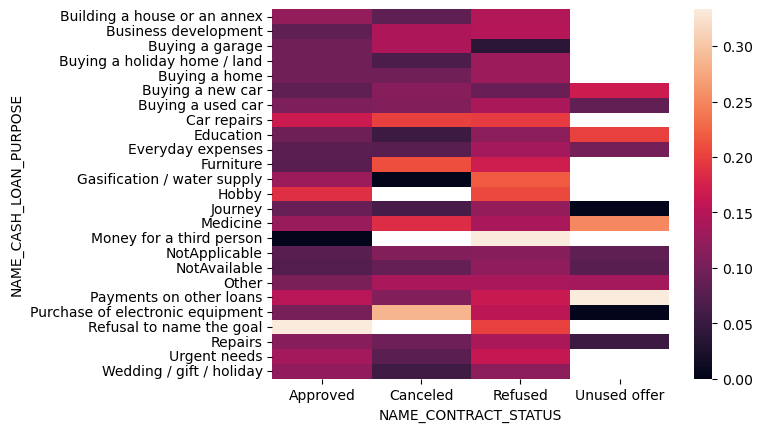

In [651]:
sns.heatmap(Analysis1)

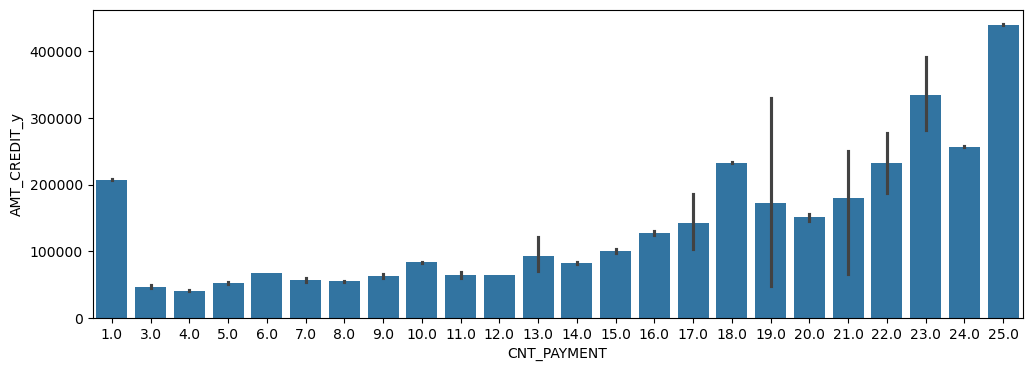

In [653]:
plt.figure(figsize=(12,4))
sns.barplot(data=merge_df, y='AMT_CREDIT_y', x='CNT_PAYMENT')
plt.show()

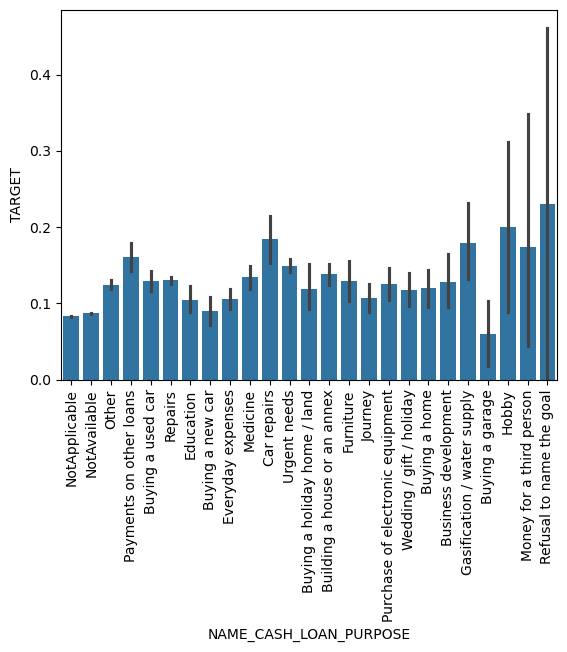

In [655]:
sns.barplot(data=merge_df, x='NAME_CASH_LOAN_PURPOSE', y='TARGET')
plt.xticks(rotation=90)
plt.show()

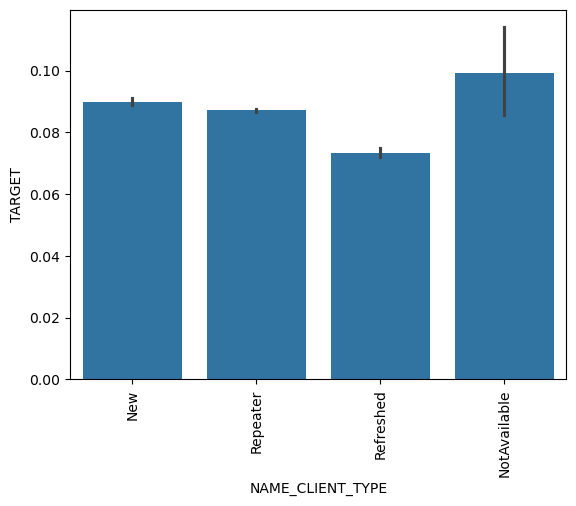

In [657]:
sns.barplot(data=merge_df, x='NAME_CLIENT_TYPE', y='TARGET')
plt.xticks(rotation=90)
plt.show()